# Basic info

Statistics: a branch of science that analyses data that was collected from a sample. 

**The Central Dogma of Statistics**: analysis of a small random sample enables drawing inferences about the entire population.
 
<img src="Media/Central_dogma_of_statistics.png" width="400"/>

Moments of distribution:
1. First moment: location (central tendency): evaluated by metrics
2. Second moment: variability (dispersion): evaluated by metrics
3. Third moment: skewness (inclination of the data towards smaller or larger values): evaluated visually; right-skewed - median is to the left of the mean (tail is on the right side, so the peak is to the left)
4. Fourth moment: kurtosis (tendency of a dataset to have extreme values): evaluated visually

Metrics can be:
- Univariate (univariate analysis) - look at one variable: mean, variance
- Bivariate: correlation
- Multivariate: contingency table, hexagonal binning, contour plot, violin plot

Some basic terms:
| Term | Notation | Definition | Notes |
| - | - | - | - |
| Sample mean | $\overline{x}$ | Mean of a sample | Also called x-bar |
| Population mean | $\mu$ | Mean of the population | |
| Standard Deviation | | | the standard deviation will not tend to change as we increase the size of our sample. |
| Standard Error | $S_{\overline{x}} = SE = \cfrac{S}{\sqrt{n}}$ | SE of the sample mean indicates the uncertainty around the estimated mean from sampling distribution. | The standard error falls as the sample size increases, as the extent of chance variation is reduced. |



## Scaling the data

**Scaling** - forcing the data into a specified range. 

Can be of different types:

<p style="text-align: center;">Simple Feature Scaling:</p>

$$ x_{\text{scaled}} = \frac{ x }{ x_{\text{max}} } $$

<p style="text-align:center;">Min-Max Scaling (Normalization): scaling the data to fall in the range 0-1</p>

$$ x_{\text{normalized}} = \frac{ x - x_{\text{min}} }{ x_{\text{max}} - x_{\text{min}} } $$

<p style="text-align:center;">Normalization / Scaling over the custom interval, where the interval is [a,b]</p>

$$ x_{\text{scaled}} = a + \frac{ (x-x_{\text{min}})(b-a) }{ x_{\text{max}} - x_{\text{min}} } $$

<p style="text-align:center;">Standardization:  tells how far from the mean each value is in terms of SD. Standardized values = z-scores.</p>

$$ Z = \frac{x - \overline{x}}{\sigma} $$

In [ ]:
import numpy as np

In [48]:
""" The standard MinMax normalization over 0-1 range """

a = [10,20,30,40,5,15,0,10]

def normalize(list1:list):
	x_max = max(list1)
	x_min = min(list1)
	return [ (i - x_min)/(x_max - x_min) for i in list1 ]

print(normalize(a))

[0.25, 0.5, 0.75, 1.0, 0.125, 0.375, 0.0, 0.25]


In [11]:
""" MinMax normalization (0-1), standard, in Pandas """

import pandas as pd
df = pd.DataFrame({
	'a': [10,20,30,40,5,15,0,10],
	'b': ['a','b','c','d','e','f','g','h']
})


df['c'] = df['a'].apply( lambda x: (x - min(df['a']))/(max(df['a']) - min(df['a'])) )

df



,a,b,c
0,10,a,0.250
1,20,b,0.500
2,30,c,0.750
3,40,d,1.000
4,5,e,0.125
5,15,f,0.375
6,0,g,0.000
7,10,h,0.250


In [49]:
""" Normalization over custom range """
list1 = [15,1,3,5,6,7,8,10,15]

x_min = min(list1)
x_max = max(list1)
a, b = 5, 10

[ a + ( (i-x_min)*(b-a) )/( x_max - x_min ) for i in list1 ]

[10.0,
 5.0,
 5.714285714285714,
 6.428571428571429,
 6.785714285714286,
 7.142857142857142,
 7.5,
 8.214285714285715,
 10.0]

In [8]:
""" Normalization over custom range """
list1 = [15,1,3,5,6,7,8,10,15]

x_min = min(list1)
x_max = max(list1)
a, b = -1, 1

[ a + ( (i-x_min)*(b-a) )/( x_max - x_min ) for i in list1 ]

[1.0,
 -1.0,
 -0.7142857142857143,
 -0.4285714285714286,
 -0.2857142857142857,
 -0.1428571428571429,
 0.0,
 0.2857142857142858,
 1.0]

In [50]:
""" NumPy """
import numpy as np

a = [10,20,30,40,5,15,0,10]

normalizedData = a / np.linalg.norm(a)
print(normalizedData)

[0.17277369 0.34554737 0.51832106 0.69109474 0.08638684 0.25916053
 0.         0.17277369]


In [51]:
""" Simple Feature Scaling """
a = [15,1,3,5,6,7,8,10,15]
print([i/max(a) for i in a])

[1.0, 0.06666666666666667, 0.2, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6666666666666666, 1.0]


In [52]:
a = [15,1,3,5,6,7,8,10,15]

### 2. sklearn
from sklearn import preprocessing
normalized_arr = preprocessing.normalize([a])
print(normalized_arr)

b = preprocessing.MinMaxScaler(feature_range=(0,1))
b.fit([a])
print( b.transform([a]) )


[[0.5536601  0.03691067 0.11073202 0.18455337 0.22146404 0.25837471
  0.29528539 0.36910674 0.5536601 ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [54]:
""" Z-score """

import numpy as np

a = [15,1,3,5,6,7,8,10,15]

def standardize(list1:list):
	mean = sum(list1) / len(list1)
	### Manually calculating SD
	# SD = ( ( sum([ (i-mean)**2 for i in list1 ]) )/len(list1) )**(0.5)
	# ### Getting SD with NumPy:
	SD = np.std(list1, ddof=0)
	return [ (i - mean)/(SD) for i in list1 ]

print("Standardized values:")
print(standardize(a))


Standardized values:
[1.573706879043517, -1.476863378794685, -1.0410676276749418, -0.6052718765551988, -0.3873740009953272, -0.16947612543545562, 0.04842175012441592, 0.484217501244159, 1.573706879043517]


# Probability and combinatorics

> "... probability tells us how often something is likely to occur when an experiment is repeated..." (Sarah Boslaugh, Statistics in a Nutshell)

Probability theory describes what properties our sample should have, given the properties of the underlying population.

**Probability** is the proportion of times an event would occur in infinite repetitions. 

Some important terms:
| Term | Definition | Example |
| - | - | - |
| **Trial** (experiment) | An event whose outcome is unknown. | |
| **Event (E)** | An outcome of a trial.| An event that the sum of the two die is 11, $E = \{(5,6), (6,5)\}$ |
| **Sample space** (S, set) | A set of all possible outcomes of a trial. | For a roll of a six-sided die, $S = \{1,2,3,4,5,6 \}$ |

Probability of an event is the number of desirable events divided by the total number of events in the sample space:
$$ P(E) = \frac{n(E)}{n(S)} $$


Odds that a team will win are 3 to 1 -> probability of winning = 3/(3+1) = 3/4

**Theoretical probability** is like what we expect to see in flipping a coin. E.g. probability of landing a coin on Heads is $P(H) = 0.5$; if we have a 6-sided die, the probability of landing a score that equals to 3 or more is $P(\ge3) = 4/6 = 2/3$

**Experimental probability** is an estimate we make based on previous experience. E.g. if we played 16 games in the past, and we make a histogram with number of points and count for each bin, we can later make a prediction for the 17th game based on past data, for example, the probability of obtaining a score that is more than a certain number.

In probability, **The Law of Large Numbers** states that experimental probability gets closer to the theoretical probability with a large number of experiments. 

Example problems:

---

There is a promotion that states that each box of cereal in their line has 1 of 6 toys to collect. Estimate how many boxes, on average, it would take to get all 6 prizes. 
- A) Randomly generate digits 1-6 and calculate how many boxes it would take to collect all unique toys; 
- B) Repeat step A many times. 
- C) Mean of the distribution of boxes that it takes to collect the toys is an approximation that we need;  

## Sets

**Venn Diagram** visualises sets and their relationships

<img src="Media/Venn.png">

Datasets:
- $A = \{1,5,7,18,19\}$
- $B = \{1,7,18\}$
- $C = \{19,20\}$
- Intersection ("and"): $A \cap B = \{1,7,18\}$
- Union ("or"): $A \cup B = \{1,5,7,18,19\}$
- Difference: $A \setminus B = A - B = \{5,19\}$. *Subtract B from A; relative complement of B in A; not in B but in A*
- $A \setminus A = A - A = {}$. *Empty / null set , with no objects in it*
- Mermbership: $1 \in A$ (1 is a member of A)
- $2 \notin A$
- Subset - every member of your set also belongs to another set: $B \subseteq A$
- Every set is its own subset: $A \subseteq A$;
- Strict subset - all objects in B belong to A, but not vice versa - so they do not equal: $B \subsetneq A$
- Every set is NEVER its own strict subset. 
- Superset - the opposite of subset: $A \supseteq B$
- Strict superset. 
- U - universal set: the set containing all objects or elements and of which all other sets are subsets. E.g. $U = A+B+C$
- Absolute complement: a set of all things in U (universal set) that aren't in C (a set called "C"). $C' = U - C = U \setminus C = \{1,5,7,18\} $
- 

## Rules of probability

**Addition rule for probability**: the probability of two events occurring (in an OR manner) equals to the sum of probability of each event minus the probability of both events occurring at the same time. IOW, P(A or B) = P(A) + P(B) - P(A and B):

$$ P(A \cup B) = P(A) + P(B) - p(A \cap B) $$

| Exclusivity of events | Explanation | Venn diagram | AND | OR (the addition rule) |
| - | - | - | - | - |
| Not Mutually Exclusive | A and B are **not mutually exclusive** if they intersect - have some degree of overlap. On a d6 die, P(>1 OR odd). | <img src="Media/not-mutually-exclusive-events.png"> | An intersection does exist. | $$ P(A \cup B) = P(A) + P(B) - p(A \cap B) $$ |
| Mutually Exclusive | A and B are **mutually exclusive** (two events cannot occur at the same time). E.g. on a d6 die, P (even OR odd) $ = P(even) + P(odd) = 0.5 + 0.5 = 1 $ | <img src="Media/mutually-exclusive-events.png"> | No intersection: $P(A \cap B) = \{\}$ | $$ P(A \cup B) = P(A) + P(B) $$ |

**Multiplication / product rule**: the probability of event 1 AND event 2 occurring is the probability of event 1 and probability of event 2 given the event 1:

$$ P(A\cap B) = P(A) * P(B | A) $$

| Independence of events | Explanation | Example | The Multiplication / Product Rule | 
| - | - | - | - |
| Independent events | Events are independent if P of one event is not affected by the occurrence of the other event. | E.g. flipping a coin and getting H/T every trial. P of getting T on the first trial doesn't affect the subsequent probabilities. | In independent events, $P(B\|A)=P(B)$, therefore, *Product rule of independent events*: $$P(A\cap B) = P(A)*P(B)$$ | 
| Dependent (conditional) events | Events are conditional (Bayes) when the two events are correlated | e.g. consequently taking out a particular colour of marble out of a bag full of different coloured marbles. | *Product rule of dependent events*: $$p(A\cap B) = P(A) * p(B\| A)$$ |



## Conditional Probability

*Conditional probability* - the probability of an event A given another event B:

$$ p(A|B) = \frac{p(A\cap B)}{p(B)} $$

In independent events, $ p(A|B) = \frac{p(A\cap B)}{p(B)} = \frac{p(A)p(B)}{p(B)} = p(A) $

**The Bayes theorem** reverses the direction of the dependencies:
$$ p(A|B) = \frac{p(B|A) p(A)}{p(B)} = \frac{p(B|A) p(A)}{ p(B|A)p(A) + p(B|A_{c})p(A_{c}) } $$

In the formula above, 
- $p(A)$ - the *prior probability* of $A$ (probability of an event before introduction of the new data);
- $p(A|B)$, $p(B|A)$ - conditinal probabilities;
- $P(A|B)$ - the *posterior probability* of $A$ given $B$ (the updated probability based on new information). 



*Rule of complementary probabilities* - for an event E, its complement ($E_{c}$) has the probability of 1 minus p of E: $p(E_{c}) = 1 - p(E)$


<img src="Media/Bayes.png" width="400px">

$ p(B\cap A) = p(B|A) * p(A) = 0.3*0.2 = 0.06 $

$ p(B|A) = 0.3 $

s

$ p(A|B) = \frac{p(B|A)p(A)}{p(B)} = \frac{p(B|A) p(A)}{p(B|A) p(A) + p(B|A_{c}) + p(B|A_{c}) + p(A_{c})} = \frac{0.3*0.2}{0.3*0.2 + 0.05*0.8} = 0.6$

---

<u>Example problems for conditional probability</u>:

There are 8 coins in a bag, 3 of which are unfair (60% chance of H) and the rest are fair. If you randomly choose one coin from the bag and flip it 2 times, what is the probability of getting 2H?
- Upon drawing a coin, we have $p=5/8$ of drawing a fair coin and $p=3/8$ of drawing an unfair coin. 
- $P(Fair \cap HH) = P(Fair) * P(HH | Fair) = 5/8 * 0.5^{2} = 5/8 * 0.25 = 0.15625$
- $P(Unfair \cap HH) = P(Unfair) * P(HH | Unfair) = 3/8 * 0.6^{2} = 3/8 * 0.36 = 0.135$
- $P(HH) = 0.15625 + 0.135 = 0.29125 = 29.125$%

## Expected value

In essence, expected value means "after a very large number of turns, the average outcome per one action will be Expected value".

Expected value of a discrete random variable.

---

$X$ - number of workouts in a week. Below is the probability distribution of this variable:

| $X$ | $P(X)$ |
| - | - |
| 0 | 0.1 |
| 1 | 0.15 |
| 2 | 0.4 |
| 3 | 0.25 |
| 4 | 0.1 |

In this case (discrete random variable), it's also equal to the weighted mean (weighted sum):

$E(X) = 0*0.1 + 1*0.15 + 2*0.4 + 3*0.25 + 4*0.1 = 2.1 $

---

Another example - betting:

| | Win | Lose |
| - | - | - |
| X (net gain) | $35 | -$1 |
| P(X) | 1/38 | 37/38 |

Expected value of a player's net gain on a $1 bet on a single slot: $E(X) = 35 * \frac{1}{38} + (-1) * \frac{37}{38} = -0.053$ dollars. 

We could also interpret it as the following: if we look at many bets, the average return would be about -$0.053 dollars per ticket. 

---

Example: lottery ticket expected payoff.

There is a lottery with 10,000 possible selections. The lottery pays $4500 on a $1 bet that all 4 digits of a selection match the lottery result. Calculate the expected net gain $E(X)$ on an X (a player's net gain on a $1 straight bet).
- If he wins (probability 1/10000), he net gains $4499;
- If he loses (probability 9999/10000), he net gains -$1;
- $E(X) = 4499 * \frac{1}{10000} + (-1) * \frac{9999}{10000} = -0.55$
- So if we play 10000 times, we pay $10000 and expect to win $4500 - net gain of -$5500

---

Example: insurance expected payoff.

An electronics store gives customers the option of purchasing a protection plan when customers buy a new refrigerator. The customer pays $125 for the plan, and if their refrigerator is damaged or stops working, the store will replace it for no additional charge. The store knows that 3% of customers who buy this plan end up needing a replacement that costs the store $1500 each. Calculate the expected net gain E(X) from one of these plans. 
- Replacement, probability = 0.03, net gain = -$1375; 
- No replacement, probability = 0.97, net gain = $125;
- $E(X) = 0.03*(-1375) + 0.97*(125) = 80$ dollars

## Combinatorics

Permutations: order matters.

Combinations: order doesn't matter. 

| Type | Repetitions | Formula | Explanation | Example | 
| - | - | - | - | - |
| Permutations | With repetitions | $$n^{r}$$, where $n$ is the number of things to choose from, and we choose $r$ of them | | how many permutations are there to make 4-digit code, where in each allele there can be a digit from 0-9? |
| Permutations | No repetitions | $$ _{n} P _{r} = \frac{n!}{(n-r)!}$$ | Let's consider the following problem: In how many ways can 6 students sit in 3 chairs, order matters? Here, on the first chair we can sit one of the 6 students, therefore, on the second chair we will be able to sit only one of the 5 students (as the first one is occupied) and the third chair - by one of the 4 students. Therefore, there are $P=6*5*4=120$ permutations available. | In how many ways can 5 people sit in 3 chairs? (=60); how many ways can 5 people sit on 5 chairs? (=5!) How many order-wary sequences of 4 people can be chosen from a team of 6 people (=360); How many unique ways are there to arrange 5 runners in 5 lanes? (=5!=120). |
| Combinations | With repetitions | $$\frac{(r + n - 1)!}{r! (n-1)!} \Leftrightarrow {r + n - 1 \choose r}$$, where n is the number of things to choose from, and we choose r of them, repetition allowed, order doesn't matter | ... | ... |
| Combinations | No repetitions | $$  _{n} C _{r} = \frac{n!}{r!(n-r)!} \Leftrightarrow {n \choose r} $$ | <u>(n choose r)</u> Same example, but now we do NOT care about the order. This means that we take the total number of permutations - 120 - and divide it by the number of ways our subgroup can be arranged (as we only care about one of all possible ways to arrange the subgroup), which is 6: $C=120/6=20$ | In how many different ways could 23 children sit on 23 chairs in a match class? (=23!); How many different sets of 3 color bottles can be arranged from an available set of 8 paint color bottles? (56); How many groups of 4-flower bouquets can be combined from 7 available flowers? (=35); |

---

*Some examples*:

In how many ways can you arrange 4 reindeers in a line?
- 4 choose 4, order matters - combinations, no repetitions, so $C = \frac{4!}{(4-4)!} = 4! $

You need to put your reindeer, Lancer, Gloopin, Rudy, and Bloopin, in a single-file line to pull your sleigh. However, Gloopin and Rudy are best friends, so you have to put them next to each other, or they won't fly.
- We can count the number of arrangements where Gloopin and Rudy are together by treating them as one double-reindeer. Now we can use the same idea as before to come up with $C = 3*2*1 = 6$ different arrangements, times 2 to account for the two ways to arrange the "double-reindeer": $C=6*2=12$

You need to put your reindeer, Quentin, Jebediah, Lancer, and Gloopin, in a single-file line to pull your sleigh. However, Gloopin and Lancer are fighting, so you have to keep them apart, or they won't fly.
- Total number of permutations, no repetition: $P_{total} = \frac{4!}{(4-4)!} = 4! = 24$
- Total number of permutations where the two reindeers are together - we calculate this by counting them as one "double-reindeer": $P_{double} = 3*2*1*2 = 12$
- Therefore, final answer = $24-12 = 12$

---

How many numbers between 1-100 (inclusive) are divisible by 3 or 10?
- Amount of numbers divisible by 3: $\frac{100}{3} \approx 33$; 
- Amount of numbers divisible by 10: $\frac{100}{10} = 10$;
- Number that is divisible by both 3 and 10 is $30$, therefore, amount of numbers divisible by 30: $\frac{100}{30} \approx 3$
- Subsequently, from the total number of divisible numbers (33+10) we need to subtract this number:
- $Answer = 33+10-3 = 40$

How many numbers between 1-100 (inclusive) are divisible by 3 or 2?
- Divisible by 3: $\frac{100}{3} \approx 33$
- Divisible by 2: $\frac{100}{2} = 50$
- Divisible by both is 6: $\frac{100}{6} \approx 16$
- Answer = $33+50-16 = 67$

How many numbers between 1 and 100 (inclusive) are divisible by 5 or 8?
- Divisible by 5: $100/5 = 20$
- Divisible by 8: $100/8 \approx 12$
- Common factor of both is $5*8=40$; subsequently, divisible by 40: $100/40 \approx 2$
- Answer = $20 + 12 - 2 = 30$

How many numbers between 1-100 (inclusive) are divisible by 10 or 7?
- Answer = $10+14 - 1 = 23$

---

How many unique ways are there to arrange the letters in the word PRETTY?
- Total number of permutations without repetition: $P = \frac{6!}{(6-6)!} = 6! = 720$
- Nevertheless, there are repeting sequences within this space of 720 sequences, as two letters in our word are the same;
- Therefore, we divide our answer by $2!$
- Answer = $\frac{6!}{2!} = \frac{720}{2} = 360$

How many unique ways are there to arrange the letters in the word ERROR?
- Answer = $5!/3! = 120/6 = 20$


## Probability with permutations and combinations

We have 8 coin flips. What's the probability of having exactly 3 coins land as Heads?
- $p(\frac{3}{8} H) = ?$
- Total number of events = $2^8 = 256$
- Combinations 8 choose 3 = $\frac{8!}{3! (8-3)!} = 56$
- $p(\frac{3}{8} H) = \frac{56}{256} = 0.219$

Probability of making exactly 3 out of 5 freethrows? $p(FT) = 80%$
- Total number of combinations in which we have 3 out of 5 freethrows: $C = \frac{5!}{3! *2!} = 10$
- Probability of one sequences with 3 out of 5 freethrows: $p = 0.8^{3} 0.2^{2}$
- Probability of all possible sequences with 3/5 freethrows: $p(3/5) = 10 * 0.8^3 * 0.2^2 = 20.48%$

Probability of making at least 3 out of 5 freethrows (3/5 or more)? $p(FT) = 80%$
- 5 choose 3 = 10;
- 5 choose 4 = $\frac{5!}{4!*1!} = 5$
- $p(>= 3/5) = 10*0.8^{3}*0.2^{2} + 5*0.8^{4}*0.2^{1} + 1*0.8^{5} = 0.942 $

---

Each card in a standard deck of 52 playing cards is unique and belongs to 1 of 4 suits: 13 cards are clubs, 13 are diamonds, 13 are hearts, and 13 are spades. Suppose that Luisa randomly draws 4 cards without replacement. What is the probability that Luisa gets 2 diamonds and 2 hearts (in any order)?
- Any order - combinations; 
- Combinations (2 diamonds) = $_{13}C_{2}$
- Combinations (2 hearts) = $_{13}C_{2}$
- Total number of 4-card combinations = $_{52}C_{4}$
- Probability: $p = \frac{(_{13}C_{2}) (_{13}C_{2})}{_{52}C_{4}}$

Declan's friend Luka claims that he can read minds. To test Luka's abilities, Declan draws 5 cards without replacement from a standard deck of 52 playing cards. Declan then asks Luka to identify in any order which 5 cards he drew without looking. Assume that Luka has no special abilities and is randomly guessing the cards.
What is the probability that Luka correctly identifies all 5 cards in any order?
- There is only 1 correct set available to make from the 52 cards;
- Any order, so combinations; 
- Total number of combinations of cards = $_{52}C_{5}$
- Therefore, $p = \frac{1}{_{52}C_{5}}$

---

A club of 9 people wants to choose a board of three officers: President, VP, and Secretary. Assuming the officers are chosen at random, what is the probability that the people chosen for the roles are Marsha for President, Sabita for VP, and Robert for Secretary?
- $p = 1/9 * 1/8 * 1/7 = 1/504$

Nia is 1 of 24 students in a class. Every month, the teacher randomly selects 4 students from their class to act as president, vp, secretary, and treasurer. Students cannot hold different positions at once. What's the probability that Nia is chosen as president in a given month?
- Order matters - permutations; 
- Total number of 4-student arrangements: $_{24} P _{4}$
- All the arrangements that include Nia as the president, which is equivalent to how many arrangements of 3 students are possible from Nia's 23 classmates: $_{23} P _{3}$ 
- Answer = $\frac{_{23} P_{3}}{_{24} P_{4}}$

---

What is the probability of guessing a 4-digit passcode consisting of non-repeating digits (0-9)?
- Answer = $\frac{1}{10*9*8*7} = \frac{1}{_{10} P _{4}}$


## Random variable

Random variable is a variable whose value is unknown; a function that assigns values to each of the experiment's outcomes. 

Random variables are different from standard variables in that, while the former can take on a many numbers, the latter is clearly-defined.  

E.g. a random variable X representing an outcome of a coin flip:

$$ X = \begin{cases} 1,&Heads \\ 0,&Tails \end{cases} $$

Random variables' varieties:
- Discrete: can take on a distinct set of values; e.g. outcomes of a coin flip; 
- Continuous: can take on any value in an interval; e.g. the mass of a random animal; 

Example: let's define a discrete random variable $X$ - number of heads after 3 flips of a fair coin. We can plot a probability distribution for this random variable. 

E.g.:

| $X$ | $P(X)$ |
| - | - |
| 0 | 0.1 |
| 1 | 0.15 |
| 2 | 0.4 |
| 3 | 0.25 |
| 4 | 0.1 |

Expected value: $E(X) = 0*0.1 + 1*0.15 + 2*0.4 + 3*0.25 + 4*0.1 = 2.1$

Variance of the random variable X: $Var(X) = 0.1*(0-2.1)^{2} + 0.15*(1-2.1)^{2} + 0.4*(2-2.1)^{2} + 0.25*(3-2.1)^{2} + 0.1*(4-2.1)^{2} = 1.19 $

Standard deviation of X: $ \sigma(X) = \sqrt{Var(X)} = 1.09 $

Transforming random variable: let's say we have a normally-distributed random variable $X$, and $Y$ is also a random variable produced from $X$:
- Shift: $Y = X + k$
- $\mu_{Y} = \mu_{X} + k$
- $\sigma_{Y} = \sigma_{X}$
- Scale: $Y = X*k$
- $\mu_{Y} = k * \mu_{X}$
- $\sigma_{Y} = k* \sigma_{X}$


### Bernoulli random variable

$Y = \begin{cases} 1, & \text{pick a yellow ball} \\ 0, & \text{pick a ball that is not yellow} \end{cases}$ 

Expected value or mean: $E(Y) = \mu_{Y} = p = 0.6$

Standard deviation: $\sigma_{Y} = \sqrt{p(1-p)}$

### Binomial random variable

*How many successes in a SPECIFIED number of trials?* A sequence of Bernoulli random variables, in a sense. 

E.g. if <u>Bernoulli random variable</u> $Y = \begin{cases} 1, & \text{pick a yellow ball} \\ 0, & \text{pick a ball that is not yellow} \end{cases}$ , then a <u>binomial random variable</u> is $X$ - sum of 10 independent trials of $Y$.

Conditions for a binomial variable:
- Made up of independent trials; 
- Each trial can be classified as either success or a failure; 
- Fixed number of trials; 
- Probability of success on each trial is constant - trials are independent in their probability; 
- all the trials in your sample constitute less than 10% of the population;

> Examples of binomial random variables:
> - $X$ - number of heads after 10 flip of a coin. 
> - $L$ - the number of house tours that result in a sale in a sample of 30 tours. 
> - $T$ - the number of plants that live; we transplant plants from a bigger garden, and each plant has a 60% chance to survive upon transplantation; 

Expected value or mean ($n$ = number of trials, $p$ - probability of success):

$$ E(X) = \mu_{X} = np $$

Standard deviation:

$$ \sigma_{X} = \sqrt{ n p (1-p) } $$

> Example:
> - If $X$ - number of successes after $n=10$ trials, where for each trial $P(success) = 0.3$; then, $E(X=10) = 10 * 0.3 = 3$ 
> - If $X$ - number of correctly guessed questions (randomly) of 20 questions with 5 options (1 correct option), then $E(X) = 20*0.2 = 4$ and $\sigma_{X} = \sqrt{ 20 * 0.2 * 0.8} = 1.8 $
> - If $X$ - number the blue candies that a random customer gets in a purchase ($P(blue) = 0.3$, $n=15$ candies), then $E(X) = 15*0.3 = 4.5$ and $\sigma_{X} = \sqrt{ 15*0.3*0.7 } = 1.775 $



### Geometric random variable

*How many trials until success?*

Conditions:
- Binary trial outcome - success or failure;
- Trial results independent;
- Same probability on each trial; 
- The conditions are above are the same as for the binomial variable, however, <u>number of trials is unlimited</u>

> Examples:
>
> A person makes 25% of his freethrows. $M$ - the number of shots it takes him to successfully make his first three-point shot. 
> Probability that Jeremiah's first successful shot occurs on his 3rd attempt: $P(M=3) = 0.75 * 0.75 * 0.25 = 0.14$

> Example - cumulative geometric probability (greater than)
>
> 10% of the shoes sold at a store are defective. $C$ - the number of shoes sold until a defective pair is sold. Find the probability that it takes more than 4 pairs to sell a defective pair. 
>
> $ P(C>4)$ = P(first 4 pairs sold are not defective) = $0.9^{4} = 0.66$

> Example - cumulative geometric probability (less than)
>
> 10% of the shoes sold at a store are defective. $C$ - the number of shoes sold until a defective pair is sold. Find the probability that it takes fewer than 5 orders to get the first defective pair. 
>
> $ P(C<5) = P(C=1) + P(C=2) + P(C=3) + P(C=4) = 0.1 + 0.9*0.1 + 0.9^{2}*0.1 + 0.9^{3}*0.1 = 0.34 $

# Data Types

**Numerical (quantitative)** - numeric-scale data (/variables): 
- **Continuous**:  data that can take on any number within a range: height, weight; 
- **Discrete**: only integer values are possible: tablets in a bottle, rounded age; 

**Categorical (qualitative, factor)** - data (/variables) represented as specific values in categories. 
- **Nominal (unordered)**: categories with no meaningful order: sex, occupation; 
- **Ordinal (ordered)**: categories with a meaningful order: scale in a questionnaire, grades; 




# Measures of center

aka estimates of location, central tendency measures. 
 

| Measure | Description | Formula |
| - | - | - |
| **Arithmetic mean** | Very susceptible to outliers. Used in unipeak normally distributed data. $\mu$ (mu) - population mean, $\overline{x}$ (x hat) - sample mean | $$ \text{mean} = \frac{ \sum_{i=1}^{n}x_{i} }{n}$$ |
| **Trimmed mean** | Dropping a fixed number $(p)$ of extreme values at both ends and then calculating mean. | $$\text{trimmed mean} = \frac{ \sum_{i=p+1}^{n-p}x_{i} }{n-2p}$$ |
| **Geometric mean** | $n-th$ root of the product of n values | $$x = \sqrt[n]{a_{1}a_{2}...a_{n}}$$ | 
| **Weighted mean** | the sum of all values times their weights divided by the sum of weights. | $$ \text{weighted mean} = \frac{ \sum_{i=1}^{n}w_{i}x_{i} }{ \sum_{i=1}^{n}w_{i} }$$ |
| **Harmonic mean** | Harmonic mean gives greater weightage to smaller observations and as such is not very much affected by one or two big observations. However, it cannot be calculated if one of the values is zero. | $$ \text{harmonic mean} = \frac{ n }{ \sum(\frac{1}{x_{i}}) } $$ |
| **Median** | Middle score (number at the center) for the sorted dataset. Used in data with outliers or skewed data, as it is considered a robust estimate of location |  |
| **Mode** | The most frequent score in a dataset. Used in categorical data or in data with clusters. |  |


robust: not sensitive to extreme values. 

Outlier: a data value that is very different from most of the data. 

Expected value: mean value based on probabilities of occurrence of each category. 
- Calculated by multiplying each category (outcome) by its probability, and then sum the resulting values. 





In [12]:
import numpy as np

In [9]:
a = [5,4,6,39]

np.mean(a)
np.median(a)

5.5

In [ ]:
import pandas as pd
from scipy import stats

df = pd.DataFrame({
	'Name': ['John', 'Jake', 'Lea', 'Eugene', 'Dan', 'John', 'Jake', 'Lea', 'Eugene', 'Dan'], 
	'Population': [100, 200, 300, 400, 500, 100, 200, 300, 400, 800]
})


df['Population'].mean()
df['Population'].median()
stats.trim_mean(df['Population'], 0.1) # Removes top and bottom 10%

# Measures of dispersion

Measures of spread / variability. 

| Measure | Description | Formula |
| - | - | - |
| **Range** | Max - min value in a dataset. | $$range = max - min$$ |
| **Midrange** | Range divided by two. | $$midrange = \frac{max+min}{2}$$ |
| **Quantile** | Quantiles cut points dividing the range of probability distribution into continuous interval with equal probabilities. Can be *quartiles* (4 groups), *deciles* (10 groups), *percentiles* (100 groups). |  |
| **Quartile** | Value cutting data into quarters. | <img src="Media/Quartile.png" width="300"/> |
| **IQR (interquartile range)** | The difference between the 75th and the 25th percentiles; the range btw the lower (Q1) and upper (Q3) quartiles. **Q1 (lower quartile)** - median of the left half of the dataset; **Q3 (upper quartile)** - median of the right half of the dataset. Q1-Q3 = 50% of the data. Outliers are data points that exceed the boundaries set by $Q1 - 1.5*IQR$ (lower whisker) and $Q3 + 1.5*IQR$ (upper whisker). Therefore, since the boundaries for outliers are set by whiskers, any data point outside of the whiskers is considered an outlier. Boxplot can be notched and include a 95%CI in the middle. | <img src="Media/IQR_2.png" width="400"/> |
| **Percentile** | Percentile P is a value such that P percent of the data lies below. E.g. score of 50 is in the 90th percentile, which means that this score is better than 90% of people. | $$rank = \frac{\# of values below x}{n} * 100$$ E.g. if there are $n=25$ observations and $24$ lie below your one, then the percentile rank is $rank = \frac{24}{25}*100$ |
| **Mean deviation from the mean** | BAD METRIC! The average difference of each value from the mean. Not good because positive and negative values cancel each other out, therefore we lose the measure of dispersion in this dataset. | $$ x = \frac{ \sum_{i=1}^{n} (x_{i}-\overline{x}) }{n} $$ |
| **Mean absolute deviation (MAD)** | The mean of the absolute (module) deviation from the mean. | $$MAD = \frac{ \sum_{i=1}^{n} \|x_{i} - \overline{x}\| }{ n }$$ |
| **Median absolute deviation from the median** | More robust. | $$MADM = median( \|x_{1}-m\|, \|x_{2}-m\|, ..., \|x_{N}-m\| )$$, where m - median |
| **Variance** | Mean of squared deviations. Measures how far a set of numbers is spread out from the mean. Units = squared units, so not super intuitive. | $$variance = s^{2} = \frac{ \sum_{i=1}^{n} (x_{i} - \overline{x})^{2} }{ n-1 }$$ <img src="Media/Variance.png" width="400"/> |
| **SD (standard deviation)** | Square root of the variance. Shows how much, on average, the values differ from the mean. Measures sum of squared differences between each value and the mean. | $$s = \sqrt{variance}$$ <img src="Media/SD.png" width="400"/> |
| **Coefficient of variation** | Used to compare multiple datasets. You can compare CV of two datasets. | $$CV = \frac{SD}{\overline{x}}$$ |
| **Covariance** | Tells us if 2 values move in the same direction. 0 - independent, >0 - move together, <0 - move opposite | $$COV = \frac{ \sum( (x_{i}-\overline{x})(y_{i}-\overline{y}) ) }{ (n-1) }$$ |

Variance, SD are sensitive to outliers. More robust metrics - mean absolute deviation, median absolute deviation from the median, and quantiles. 

.

> Example
> 
> dataset = [2, 2, 3, 4, 5, 6, 7]
> 
> Percentile rank of 4 = $3/7 * 100 = 43\%$
> 
> What's the index of X-th percentile? 
> 
> $index = \frac{percentile}{100} * (n+1)$, then you take that index (rounded to the closest int) of the dataset
> 
> E.g. at 25th percentile, the value is $= \frac{25}{100} * (7+1) = 2$ -> 2nd value (which is 2)
> 

In [10]:
""" Calculate variance """
import pandas as pd, numpy as np

a = [5,4,6,39]
np.var(a) # by default - population SD
np.var(a, ddof=1) # sample SD

289.6666666666667

In [3]:
""" Calculate SD """
import pandas as pd, numpy as np

df = pd.DataFrame({
	'Population': [8,11,17,7,19]
})
a = [8,11,17,7,19]

### Manually

print("Manually")
mean = sum(a)/len(a)
SD_sample_manually = ( ( sum([ (i-mean)**2 for i in a ]) )/ (len(a)-1) )**(0.5)
SD_pop_manually = ( ( sum([ (i-mean)**2 for i in a ]) )/len(a) )**(0.5)
print(f"  Sample SD:     {SD_sample_manually}")
print(f"  Population SD: {SD_pop_manually}")

### Pandas
print("Pandas")
print(f"  Sample SD:     {df['Population'].std()}") # By default - sample SD
print(f"  Population SD: {df['Population'].std(ddof=0)}") # Population SD

### Numpy
print("Numpy")
print(f"  Sample SD:     {np.std(a, ddof=1)}")
print(f"  Population SD: {np.std(a)}") # by default - population SD
# or if it's a Numpy object:
a = np.array([8,11,17,7,19])
a.std()

Manually
  Sample SD:     5.366563145999495
  Population SD: 4.800000000000001
Pandas
  Sample SD:     5.366563145999495
  Population SD: 4.800000000000001
Numpy
  Sample SD:     5.366563145999495
  Population SD: 4.800000000000001


4.800000000000001

In [4]:
""" Quantiles """
import pandas as pd
df = pd.DataFrame({
	'Name': ['John', 'Jake', 'Lea', 'Eugene', 'Dan', 'John', 'Jake', 'Lea', 'Eugene', 'Dan'], 
	'Population': [100, 200, 300, 400, 500, 100, 200, 300, 400, 800]
})
df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    100.0
0.25    200.0
0.50    300.0
0.75    400.0
0.95    665.0
Name: Population, dtype: float64

In [9]:
""" Calculate IQR by different methods """

""" Method 1: Pandas """
import pandas as pd, numpy as np
df = pd.DataFrame({
	'Name': ['John', 'Jake', 'Lea', 'Eugene', 'Dan', 'John', 'Jake', 'Lea', 'Eugene', 'Dan'], 
	'Population': [100, 200, 300, 400, 500, 100, 200, 300, 400, 800]
})
## 1.1
IQR1_1 = df['Population'].quantile(0.75) - df['Population'].quantile(0.25)
print(f"Method 1.1: IQR = {IQR1_1}")

## 1.2
q25, q75 = np.percentile( df['Population'], [25,75] )
IQR1_2 = q75 - q25
print(f"Method 1.2: IQR = {IQR1_2}")

""" Method 2: pure Numpy """
data = np.array([100, 200, 300, 400, 500, 100, 200, 300, 400, 800])
q3, q1 = np.percentile(data, [75 ,25])
IQR2_1 = q3 - q1
print(f"Method 2.1: IQR = {IQR2_1}")

Method 1.1: IQR = 200.0
Method 1.2: IQR = 200.0
Method 2.1: IQR = 200.0


In [41]:
a = [0,0,0,1,2,2,2,2,2,3,4]

import scipy

scipy.stats.iqr(a)

1.5

In [41]:
""" Remove outliers by IQR method 
outliers: exceed the boundaries set by top bound (Q3 + 1.5*IQR) 
and lower bound (Q1 - 1.5*IQR)"""

# Only one group
df = pd.DataFrame({
	'Length': [100,110,105,102,107,1,2,500,700],
	'Width': list(range(9))
})

Q1 = df['Length'].quantile(0.25)
Q3 = df['Length'].quantile(0.75)
IQR = Q3 - Q1
print(f"Extreme values pre-processing:  min = {df['Length'].min()} | max = {df['Length'].max()}")
print(f"Outliers are less than {Q1 - 1.5*IQR} or more than {Q3 + 1.5*IQR}")

# Remove outliers that exceed the outlier limits
df1 = df.copy()
df1 = df1[df1['Length'].between( left=(Q1-1.5*IQR), right=(Q3+1.5*IQR) )]
print(f"Extreme values post-processing: min = {df1['Length'].min()} | max = {df1['Length'].max()}")
df1



Extreme values pre-processing:  min = 1 | max = 700
Outliers are less than 85.0 or more than 125.0
Extreme values post-processing: min = 100 | max = 110


,Length,Width
0,100,0
1,110,1
2,105,2
3,102,3
4,107,4


In [83]:
# Two groups
df = pd.DataFrame({
	'Type': ['A' for i in range(9)] + ['B' for i in range(9)],
	'Length': [100,110,105,102,107,1,2,500,700,   500,501,502,503,505,510,100,5,850]
})
df

df1 = df.copy()

def check_outliers(dataframe):
	for i in list(dataframe['Type'].unique()):
		df_slice = dataframe[dataframe['Type'] == i]
		Q1 = df_slice.quantile(0.25)
		Q3 = df_slice.quantile(0.75)
		IQR = Q3 - Q1
		print(f"Extreme values, group {i}:  min = {df_slice.min()[1]} | max = {df_slice.max()[1]}")
		print(f"Outliers are less than {(Q1 - 1.5*IQR)[0]} or more than {(Q3 + 1.5*IQR)[0]}")

print('PRE-PROCESSING:')
check_outliers(df1)
print('-'*50)

def is_outlier(s):
	# lower_limit = s.mean() - (s.std() * 3)
	# upper_limit = s.mean() + (s.std() * 3)
	IQR = s.quantile(0.75) - s.quantile(0.25)
	lower_limit = s.quantile(0.25) - 1.5*IQR
	upper_limit = s.quantile(0.75) + 1.5*IQR
	return s.between(lower_limit, upper_limit)

df2 = df1[df1.groupby('Type')['Length'].apply( is_outlier )]
print('POST-PROCESSING:')
check_outliers(df2)

df2


PRE-PROCESSING:
Extreme values, group A:  min = 1 | max = 700
Outliers are less than 85.0 or more than 125.0
Extreme values, group B:  min = 5 | max = 850
Outliers are less than 492.5 or more than 512.5
--------------------------------------------------
POST-PROCESSING:
Extreme values, group A:  min = 100 | max = 110
Outliers are less than 94.5 or more than 114.5
Extreme values, group B:  min = 500 | max = 510
Outliers are less than 496.375 or more than 509.375


In [96]:
""" Substitute outliers """

# Only one group
df = pd.DataFrame({
	'Length': [100,110,105,102,107,1,2,500,700],
	'Width': list(range(9))
})

Q1 = df['Length'].quantile(0.25)
Q3 = df['Length'].quantile(0.75)
IQR = Q3 - Q1
print(f"Extreme values pre-processing:  min = {df['Length'].min()} | max = {df['Length'].max()}")
print(f"Outliers are less than {Q1 - 1.5*IQR} or more than {Q3 + 1.5*IQR}")

df1 = df.copy()
lower_limit, upper_limit = Q1-1.5*IQR, Q3+1.5*IQR
df1['Length_proc'] = df1['Length'].apply( lambda x: lower_limit if x < lower_limit else x )
df1['Length_proc'] = df1['Length'].apply( lambda x: upper_limit if x > upper_limit else x )

print(f"Extreme values post-processing: min = {df1['Length'].min()} | max = {df1['Length'].max()}")
df1


Extreme values pre-processing:  min = 1 | max = 700
Outliers are less than 85.0 or more than 125.0
Extreme values post-processing: min = 1 | max = 700


,Length,Width,Length_proc
0,100,0,100.0
1,110,1,110.0
2,105,2,105.0
3,102,3,102.0
4,107,4,107.0
5,1,5,1.0
6,2,6,2.0
7,500,7,125.0
8,700,8,125.0


# Research design

Some important terms below:
| Term | Description |
| - | - | 
| Reliability | Repeating experiment with different people will lead to exactly the same result. |
| Confounding | When the association between two variables can be explained by a confounding third variable exerting this association. |
| Validity | How close your findings are to truly represent the phenomenon you are claiming to measure |
| Internal validity | Extend to which the observed effect is caused by experimental treatment conditions, and not by the confounders. |
| External validity | Generalisability. Experiments are high IV, low EV; observations are low IV, high EV |
| Accuracy | How close the obtained value is to the real one. |
| Precision | How close the repeated measures' values are to each other. |
| Heterogeneity | Level of variation in studies due to systematic differences. |
| Sensitivity analysis | Explores whether effect appears to be different in particular subgroups. |
| External control | Known positive or negative samples that are used to validate the reliability of the system. |
| Internal control | Inside, like housekeeping gene. |
| Systematic error (bias) | Trend in data processing and collection that can lead to conclusions that are systematically different from the truth. These errors have poor accuracy and are usually reproducible. |
| Random error (chance) | Poor precision, not reproducible; the bigger the sample size, the less chance there is of random error. |

.

| Type | Description | Example |
| - | - | - |
| Sample Study | Estimating a population parameter from a sample | Mean daily time on computer from a sample |
| Observational Study | Trying to understand the relationship between two variables / parameters. Can establish correlation, however, this study design type is prone to confounding variables; | Relationship between computer time and blood pressure |
| Experiment | Trying to establish causality | E.g. take 100 people, randomly assign people into two groups (control and treatment) |

Types of observational studies:
- Cohort;
- Case-control;
- Cross-sectional;

Types of experimental studies:
- RCT
- Non-randomized controlled trials;

Experiment design:
- Variables can be **explanatory** (e.g. treatment) and **response** (some kind of outcome, e.g. blood pressure). 
- *Completely randomized* - each subject is randomly assigned to one of the treatment groups without extra consideration to other variables.
- *Matched pairs* - The subjects were first put into pairs with another similar student, and it was randomly determined which member of each pair used the new study tool and which one didn't. 
- *Randomized block design*: In a randomized block design, random assignment is carried out within each block. E.g., pets can be first divided by type (cats vs dogs) and then random assignment occurred within each type, so the types are the blocks. IOW, subjects are divided into groups based on a variable before random assignment.




## Bias and fallacies

Two major routes of irrational and suboptimal cognition: 
- Fallacy: mistakes of reasoning; 
- Biases: persistent and widespread psychological tendencies that can be detrimental to objectivity and rationality; 

| Term | Description | Example | Type | 
| - | - | - | - |
| Acquiescence bias | When a respondent agrees with everything researcher presents, often due to fatigue | People agree to everything just for the interview to be complete | Bias |
| Attrition bias | Unequal loss of participants from the RCT |
| Confirmation bias | Researcher forms a hypothesis and then uses information to confirm their hypothesis, dismissing the evidence that doesn't support their hypothesis | | Bias |
| Dogmatism | The unwillingness to even consider the opponent's argument | | Bias |
| Halo effect | Tendency to see something in a certain light because of a single attribute (positive or not) | | Bias | 
| Hawthorne effect | Alteration of behaviour by study subjects due to their awareness of being observed. | | Bias |
| Interviewer bias | Partiality towards a preconceived response based on the structure, phrasing, tenor of questions asked in the interview. | | Bias |
| Mud-slinging | Use of unjust accusations, aiming at damaging the opponent's reputation. | | Bias |
| Publication bias | Outcome of an experiment influences decision to publish or not; funnel plot asymmetry, Egger's, Begg's, Maxumdar rank correlation tests | | Bias |
| Selection bias | Patients selected for one group are fundamentally different from the other, thus lacking randomisation and representation. | | Bias |
| Tu quoque (who are you to talk) | Intent to discredit the opponent by showing his failure to act consistently in accordance with his conclusions. | | Bias |
| Allocation bias | Bias that arises from a systematic difference in how participants are assigned to treatment and comparison groups in a clinical trial. | | Bias |
| Non-response bias | The people who are most likely to complete a survey are systematically different from those who don't | E.g. during the day on Monday, stay at home people or unemployed are more likely to answer a phone call for a survey | Bias |
| Ad hominem | Attacking the person rather than the argument | | Fallacy | 
| Appeal to authority | A is an authority on a given topic, therefore, whatever he says on this topic is right. Being an expert in one field does not automatically make that expert an authority in another, unrelated field. | | Fallacy |
| Appeal to ignorance | Conclusion based on lack of evidence to the contrary. | You cannot prove it false, therefore it is true | Fallacy |
| Appeal to nature | Thing A is good because it is natural or thing B is bad because it is unnatural. | | Fallacy |
| Appeal to tradition | X must be right because people have been doing X for thousands of years. | | Fallacy | 
| Argumentum ad populum | Arguing that something is valid because a lot of people believe in it. || Fallacy | 
| Burden of proof | The burden of proof always lies on the person making the claim! | Person making a claim says it's your responsibility to prove it wrong rather than for him to provide evidence. | Fallacy | 
| Circular argument (begging the question) | Repeating the same argument over and over again and not providing support for the claim (claim X assumes X is true, therefore X is true). | Everyone buys the new toys because it is the hottest toy of the season. | Fallacy |
| Correlation proves causation | Correlation does not imply causation | Someone thinks that he got rid of acne by starting using soap, but is it really due to use of soap or, perhaps, due to some other change that he implemented in his lifestyle? | Fallacy |
| Fallacy of composition | It it's true of parts, then it's true of the whole. | | Fallacy |
| Fallacy of division | If it's true of the whole, then it's true of the parts. | | Fallacy | 
| False dichotomy | Black or white, nothing in between . | | Fallacy |
| Genetic fallacy | Assuming that the argument is wrong only based on its source. | | Fallacy |
| Hasty generalisations (anecdotal evidence) | Conclusion is not logically justified by sufficient or unbiased evidence, or not enough of it. | | Fallacy | 
| Loaded question | Asking a question containing a presumption, so that it's impossible to answer without accepting the presumption and appearing guilty | Why does China make such junk? Do dogs still run away from you on the streets? | Fallacy |
| Moving the goalposts | | You say you can read minds, you fail the test, so you say you can only read minds that are on the right wavelength. | Fallacy | 
| Occam's razor | Given several possible explanations, the simplest one is probably right; least complicated explanation is probably right; choose explanations that have observed factors, rather than lots of unknown or unobserved variables | | Fallacy |
| Red herring | Presented argument is not relevant to the issue being discussed and serves as a distraction | when your mom gets your phone bill and you have gone over the limit, you begin talking to her about how hard your math class is and how well you did on a test today | Fallacy |
| Reverse appeal to authority | | Bad person did thing A, therefore, this thing A is bad. | Fallacy |
| Slippery slope | Assumption that one step will inevitably lead to another, and so on. | | Fallacy |
| Strawman fallacy | Opponent is attacking a twisted version of the original argument to make it easier to critique. | We need to cut down on fossil fuel - oh, so you want to ban all cars? | Fallacy |
| Survivorship bias | Logical error of not taking into account the failed cases (usually due to their lack of publicity), focusing only on those that have succeeded in achieving a certain goal. | | Fallacy | 
| The bias fallacy | | They are biased, so they are wrong. | Fallacy |
| The Kafka trap | If someone is denying being X, then this denial is proof that the person is X, because all X's would deny being X's. | | Fallacy |



# Distributions

**Sample** - a small subset of size $n$ from a larger dataset (**population**) of size $N$. 


**Random sampling** - a process where each datapoint in the population dataset has the same probability of being chosen; to reduce sample bias. 


Errors could be due to random chance (random, no tendency) and due to bias (when there is a tendency). 

Stratified sampling - splitting the population by group (e.g. age) and randomly obtaining samples from a certain stratum. 

**Bias** - (in statistics) a systematic error in measurement or sampling.

| Bias | Explanation | Example |
| - | - | - |
| Sample bias | The sample is meaningfully and non-randomly different from the underlying population from which it was drawn. | > 1936, *Literary Digest* poll vs George Gallup for predicting Alf Landon vs Franklin Roosevelt. |
| Selection bias | The sample is selectively chosen, which results in a misleading conclusion. | **Data snooping** - sorting through the data until some interesting pattern is found. "If you tortute the data long enough, sooner or later it will confess." **Vast Search Effect** - if different models and hypotheses are repeatedly run on a large dataset, sooner or later something will be found. **Regression to the Mean** - extreme observations, which very often are due to luck, tend to be followed by more central ones; example - "rookie of the year, sophomore slump" phenomenon in sports. |



**Data (population) distribution** - the frequency distribution of individual data points in the population (original) dataset. 

After we sample, we get **sampling distribution** - the frequency distribution of sample's statistic (e.g. mean) over many samples. 



## Confidence Intervals

**Confidence intervals**: a more accurate alternative to point estimates. CI are used to show variation in the sample distribution. As per the CLT, the more data you have the narrower the distribution and (presumably) the narrower the CI. A *correct interpretation* of the CI is that if we repeat the sampling process and for each one construct intervals, about 90% (or 95%, or whatever level you choose) will contain the true proportion / mean. 

Conditions for constructing confidence intervals:
- **The data is randomly sampled** (Random Sample) from the population of interest;
- **The Normal condition** - data is approximately normally distributed:
  - For *Proportions*, the observed counts of successes and failures <u>within the sample</U> are both sufficiently large, where there are at least 10 of each group. IOW, $n\hat{p} \ge 10 \text{ and } n(1-\hat{p}) \ge 10$;
  - For *Means*, data is approximately normally distributed, meaning that either $n \ge 30$ or distribution of one sample is approximately normal;
- **Individual observations can be considered independent** (Independence Condition). This condition can be met if 1) the sample size is less than 10% of the population or 2) can also consider independent if we sample with replacement. 


CI = proportion (or mean) plus/minus margin of error.

Formulae:

| Action | Formula | Notes |
| - | - | - |
| Estimating population proportion (z-interval) | $$CI = \hat{p} \pm Z^{*}S$$ $$CI = \hat{p} \pm Z^{*} \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$, $S$ - standard error | Check critical value in the **Z-table** |
| Estimating population mean (t-interval) | $$CI = \overline{x} \pm t^{*} \sigma_{\text{statistic}}$$ $$CI = \overline{x} \pm t^{*} \frac{S}{\sqrt{n}}$$, $S$ - standard error | Check critical value in the **t-table**. Conditions for valid t-interval: random sample from population of interest, individual observations are independent (sample < 10% of population), normal sampling distribution (distribution of 1 sample that we take can be not normal, however, t-interval presumes taking samples over and over again, so if n >= 30, then CLT applies; or original distribution is normal). Another thing is that we are using *t-table* because we don't know population SD and we work with sample SD; however, if we do know population SD, then we can use *z-statistic* instead.|

90% CI: 9/10 of intervals contain mean. 

For different confidence interval levels, we use the correspondent critical $Z^{*}$ or $t^{*}$ values. For example, for a 80% confidence interval, we use a $Z^{*}=1.282$. 

*Margin of Error* - the number that we can subtract or add to the sample mean to be within the indicated $Z^{*}$ confidence level from the sample mean. 

We can calculate confidence intervals without the Z-table or t-table. 

For example, if we have a bootstrap sampling distribution, for an $x%$ CI you can trim $\frac{(100-x)}{2}$ from each end of the distribution, and the trim points define the bounds of the CI. 

---

**Examples for CI for population proportion**:

<u>Example</u>: 

You have 500 songs on your phone, and you want to estimate proportion of songs that are rock. You take a random sample of 50 songs, and 20 songs in this sample are rock. Construct 90% confidence interval for the proportion of songs. 

First, check that conditions are, indeed, met: random, normal, independent. 

$$CI = 0.4 \pm 1.645 \sqrt{\frac{0.4*0.6}{50}}$$

<u>Example - margin of error for population proportion</u>:

We want to make a one-sample z interval to estimate proprtion of community that does X. What is the small sample size needed to obtain a margin of error no more than 2% at 95% confidence level.

Margin of error is $\pm 95%$

95% confidence level, $Z^{*} = 1.96$, proportions unknown, therefore, we take the proportion maximizing the SE - 0.5 and 0.5. Subsequently, we have an equation: $1.96* \sqrt{\cfrac{0.5*0.5}{n}} \le 0.02$ 

Solving for $n$, we get $n \ge 2401$. Therefore, for a margin of error of 2% at 95% confidence level, we have to sample at least 2401 people.

<u>Example</u>:

From a population of 6250 teachers, 250 were randomly selected. Of those, 142 answered "Yes" to a question and the rest - "No". What is the 99% CI for the proportion of teachers who answered "Yes"?

First, let's start off, judging from the z-table, that there is a 99% chance that a random $\overline{x}$ is within 2.58*sigma (of sample) of the mean of sampling distribution.

$p_{yes} = \cfrac{142}{250} = 0.568; \text{ } p_{no} = 0.432$

$SE = \sqrt{\cfrac{p(1-p)}{n}} = \sqrt{\cfrac{0.432*0.568}{250}} = 0.03133$

$CI = \overline{x} \pm 2.58*0.03133 = \overline{x} \pm 0.08$

Therefore, we can say that we are 99% confident that $P$ (population proportion) is within $0.08$ of the $0.568$ estimate ($0.568 \pm 0.08$), or within the range of $(0.488, 0.648)$

---

**Examples for CI for population mean**:

<u>Example</u>:

> Rex wanted to estimate the mean finishing time for the approximately 50,000 finishers at the New York City Marathon. 
> 
> He took a random sample of 10 finishers' times, which were skewed to the right with a sample mean of 271.5 minutes. He's considering using his data to make a confidence interval for the mean finishing time. 
> 
> Which conditions for constructing a t-interval have been met?

- Data is a random sample - met;
- Sampling distribution is **not** approximately normal, since sample size is less than 10 and the population distributions appears to be skewed right;
- Individual observations can be considered independent, since sample is less than 10% of population.

<u>Example</u>:

> Zachary wondered how many text messages he sent on a daily basis over the past four years. 
> 
> He took an SRS (simple random sample) of 50 days from that time period and found that he sent a daily average of 22.5 text messages. The daily number of texts in the sample were strongly skewed to the right with many outliers. He's considering using his data to make a confidence interval for his mean number of daily texts over that entire time period.
> 
> Which conditions for constructing a t-interval have been met?

- Data is a random sample - met;
- Sampling distribution is approximately normal, as sample size is greater than 30. Therefore, even though distribution of this one sample is not normal, the sampling distribution of many samples will be roughly normal;
- Individual observations can be considered independent, as sampled is less than 10% of population.

<u>Example</u>:

> A nutritionist wants to estimate the average caloric content of the burritos at a popular restaurant. 
> 
> They obtain a random sample of 14 burritos and measure their caloric content. The sample data are roughly symmetric with a mean of 700 calories and a standard deviation of 50 calories. 
> 
> Construct a 95% confidence interval for the mean caloric content of these burritos.

First, check that conditions are, indeed, met:
- Random sample;
- Independent - the sample is less than 10% of all burritos served in the restaurant;
- Normal distribution - n < 30, however, the distribution of 1 sample is roughly normal.

$CI = 700 \pm 2.160*\frac{50}{\sqrt{14}} = 700 \pm 28.9$

Therefore, the final CI interval is $(728.9, 671.1)$

<u>Example - smallest sample size for a given margin of error</u>

> Nadia wants to create a CI to estimate the mean driving range for her company's new electric vehicle. 
>
> She wants margin of error to be no more than 10 kilometers at 90% level of confidence. A pilot study suggests that the driving ranges for this type of vehicle have a SD of 15 kilometers. 
>
> What is the smallest approximate sample size to obtain the required margin of error? 

We can use z-statistic, because we know the population SD. 

$Z^{*}_{90\%} = 1.645$. 

$\cfrac{1.645*15}{\sqrt{n}} \le 10$, which after simplification looks like this: $n \ge 6.09$. 

Therefore, the minimum sample size for a margin of error of 10 at 90% confidence level is **6** people.

---

**Examples for CI for difference of two means**

<u>Example</u>:

Two groups of 100 people. Group 1 $\mu = 9.31$  ($S = 4.67$), group 2 $\mu = 7.40$ ($S = 4.04$). 

$\overline{x}_{1} - \overline{x}_{2} = 9.31 - 7.40 = 1.91$

$\alpha = 0.05$, two-tail, so $0.025$ from each end. Look up in the Z-table -> $Z = 1.96$. Interpretation - there is a 95% chance that the true mean of the difference of the sample lies within 1.96 SD within the x1 - x2. 

Calculate SD for the difference of sample means:

$ \sigma_{\overline{x}_{1} - \overline{x}_{2}}^{2} = \sigma_{\overline{x}_{1}}^{2} + \sigma_{\overline{x}_{2}}^{2} = \sigma_{x_{1}}^{2}/100 + \sigma_{x_{2}}^{2}/100 $

$ \sigma_{\overline{x}_{1} - \overline{x}_{2}} = \sqrt{ S_{1}^{2}/100 + S_{2}^{2}/100 } = 0.617$

$CI = 1.91 \pm 1.21$ - We are confident that there is a 95% chance that the true difference of the two samples lies between 0.7 and 3.12.  

---




In [3]:
"""Confidence Intervals"""

import numpy as np, scipy.stats as st, pandas as pd

player_data_import = pd.read_csv('example_datasets/players.csv')
player_data_import
print(player_data_import)

# Data cleaning
## Convert inches and feet to inches only
player_data_import['height_inches'] = player_data_import['height'].apply(
	lambda x: int(x.split('-')[0]) *12 + int(x.split('-')[1]) if len(x.split('-')) ==2 
	else int(x) )
player_data_import


# create 95% CI for population mean weight
# sample_size < 30 -> t-distribution
data = player_data_import['height_inches'].sample(20)
a = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
print(a)
# the same but > 30 observations -> normal distribution
data = player_data_import['height_inches'].sample(1000)
b = st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
print(b)


      nflId height  weight   birthDate          collegeName Position  \
0     42901    6-1     208  1992-07-25        James Madison       SS   
1     43501    6-0     220  1994-08-11     Central Michigan       FS   
2     43534    6-0     205  1993-06-02             Illinois       SS   
3     43535    6-1     235  1992-12-22               Temple      MLB   
4     44174    6-1     236  1993-02-22           Texas Tech      ILB   
...     ...    ...     ...         ...                  ...      ...   
2727  33216    6-3     320  06/16/1986      Central Florida        G   
2728  33184    6-3     265  05/02/1985  Winston-Salem State       DE   
2729  45651    5-9     198  06/16/1993                 Iowa       WR   
2730  41284     73     230  1992-10-20                  LSU       RB   
2731  42849   5-10     205  12/14/1992           Texas Tech       WR   

            displayName  
0          Dean Marlowe  
1         Kavon Frazier  
2     Clayton Fejedelem  
3      Tyler Matakevich  
4    

C:\Users\evgen\AppData\Local\Temp\ipykernel_23356\3668113417.py:20: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  a = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
C:\Users\evgen\AppData\Local\Temp\ipykernel_23356\3668113417.py:24: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  b = st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))


## Transforming data

In [33]:
""" Effects of changing data (shifting and scaling the data) on the statistical parameters """

data = [7,7,5,8,10,13,5,3,2,3,5,6]

def parameters(data):
	"""
	Returns the following dictionary:
	{'mean':0, 'std':0, 'median':0, 'iqr':0}
	"""
	IQR = np.percentile(np.array(data), 75) - np.percentile(np.array(data), 25)
	output = {
		'mean': np.mean(data),
		'median': np.median(data),
		'std': np.std(data),
		'iqr': IQR
	}
	return output

print("Parameters:")
print( f" - Original dataset:             {parameters(data)}" )
# Adding a number (shifting): mean +5, median +5, SD and IQR stay the same
print( f" - Added '5' to each value:      {parameters([i+5 for i in data])}")
# Multiply (scaling) by a number: mean *5, median *5, SD *5, IQR *5
print( f" - Multiplied by '5' each value: {parameters([i*5 for i in data])}")
# In conclusion, mean and median change in shifting and scaling the data, while SD and IQR change only in scaling the data.

Parameters:
 - Original dataset:             {'mean': 6.166666666666667, 'median': 5.5, 'std': 2.9953667926019047, 'iqr': 2.75}
 - Added '5' to each value:      {'mean': 11.166666666666666, 'median': 10.5, 'std': 2.9953667926019047, 'iqr': 2.75}
 - Multiplied by '5' each value: {'mean': 30.833333333333332, 'median': 27.5, 'std': 14.976833963009524, 'iqr': 13.75}


## Probability distribution

Some example of probability distributions include density curves. 

Probability model is valid if:
- All options add up to 100%; 

Text(0.5, 1.0, 'Relative frequency histogram (percentage for each x-axis value')

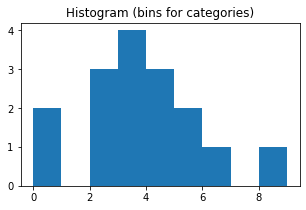

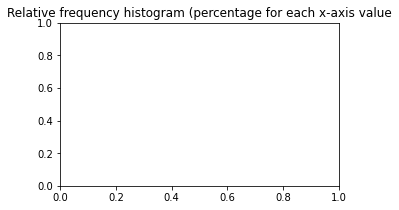

In [1]:
## Density curves
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

a = [0.5, 0.7, 2.1, 2.2, 2.9, 3.2, 3.2, 3.3, 3.7, 4.5, 4.6, 4.8, 5.2, 5.3, 6.7, 8.1]

plt.figure(figsize=(5,3))
plt.title('Histogram (bins for categories)')
plt.hist(
	a, 
	# bins=10,
	bins=np.arange(0, 10, 1) 
	# bins=[1, 3, 4, 4.5]
);

plt.figure(figsize=(5,3))
plt.title('Relative frequency histogram (percentage for each x-axis value')


## Sampling distributions

**10% rule** - if a sample taken is less than 10% of the population, then each item in that sample is independent. 

Sampling distribution - distribution of means of samples that are continuously taken from a population. 

*Sampling distributions formulae:*

| Sampling distribution of... | Mean | Variance | Standard Deviation of sample mean |
| - | - | - | - |
| ... sample proportion | $$\mu_{\hat{p}} = \frac{\mu_{x}}{n} = \frac{np}{n} = p$$ | | $$\sigma_{\hat{p}} = \frac{\sigma_{x}}{n} = \sqrt{ \frac{p(1-p)}{n} } $$ |
| ... sample mean | Sample mean is just the mean of sample datapoints: $$\overline{x} = \frac{ \sum_{i=1}^{n} x_{i} }{ n }$$ | $$ \sigma^{2}_{\overline{x}} = \frac{\sigma^{2}}{n} $$ | $$ \sigma_{\overline{x}} = \frac{\sigma}{\sqrt{n}} $$ |



**Central Limit Theorem** - <u>the sampling distribution (distributions of means from multiple samples) tends to adopt bell-shaped / normal curve with increasing the size of a sample, 
even if the underlying population distribution is non-normal </u>; additionally, with increasing sample size we get closer to the mean. <u>Sample sizes equal to or greater than 30</u> are often considered sufficient for the CLT to hold. However, when the sample size is small ($n < 30$), the sampling distribution is not normal and instead will have a similar shape to the population.

Additionally, the sample distribution is approximately normal if the original (population) distribution is normal.

Galton board (bean machine): machines by Sir Francis Galton that demonstrates the CLT. 

**De Moivre-Laplace theorem** - a special case of the CLT. With big sample size, the binomial distribution approximates a normal distribution.

**The Law of Large Numbers** - as sample size grows, its mean gets closer to the population mean. 


**SE (standard error)**: the same as standard deviation of sample mean. Represents variability in the sampling distribution, hence accuracy of the estimate. 

$$StandardError = SE = \frac{s}{\sqrt{n}}$$
, where $s$ - standard deviation of the samples, $n$ - sample size. 

With increasing sample size, SE decreases. 

**Bootstrap** - method to estimate sampling distribution. This is a way to get sample statistics from your data. First, we have a sample from a population (e.g. n=100). Then, from this sample, :
1. From the original sample, perform sampling with replacement: draw a subsample of size m (where after drawing each individual observation it is returned to the pool, so the same value / observation can be subsampled multiple times), record the mean, then return the subsample to the original sample ; here, m can be 100% of the original sample (e.g. m = n = 100), but if the sample is enormous, it can be 80% or 50%;  
2. Repeat step 1 R times; 
3. From the results from step 2, you can calculate SD / SE, find confidence interval. 

**Confidence intervals**:
- 90% CI is the interval within the central 90% of the boostrap sampling distribution; iow, an x% CI around a sample estimation should contain similar estimates x% of the time, on average; 
- Can be generated with bootstrapping. 



In [ ]:
"""
Data (population) distribution - right-skewed
"""

import seaborn as sns
# Generate Right-Skewed data set
from scipy.stats import skewnorm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

num_data_points = 10000
max_value = 100
skewness = 15   # Positive values are right-skewed

skewed_random_data = skewnorm.rvs(a = skewness,loc=max_value, size=num_data_points, random_state=1)  
skewed_data_scaled = MinMaxScaler().fit_transform(skewed_random_data.reshape(-1, 1))

# Plot the data (population) distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Data Distribution", fontsize=24, fontweight="bold")

sns.histplot(skewed_data_scaled, bins=30, stat="density", kde=True, legend=False, ax=ax)
print(skewed_data_scaled)

In [1]:
"""
SAMPLING DISTRIBUTION

the underlying population distribution is right-skewed, however, the sampling distribution is more normally distributed and bell-shaped. 

As per the Central Limit Theorem, the sampling distribution is bell-shaped. 
"""

import random
import statistics

# SAMPLING DISTRIBUTION

N = 100000

samples_mean = []
for i in range(2000): # 100 samples
	# pick k random items from a list
	sample = random.sample(skewed_data_scaled.tolist(), k=100)
	samples_mean.append(np.mean(sample))

# Plot the data (population) distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Sampling Distribution", fontsize=24, fontweight="bold")
num_bins = 20
sns.histplot(samples_mean, bins=30, stat="density", kde=True, legend=False, ax=ax)



NameError: name 'skewed_data_scaled' is not defined

In [ ]:
import pandas as pd, matplotlib.pyplot as plt
import random

player_data_import = pd.read_csv('example_datasets/players.csv')
player_data_import
print(player_data_import)

"""Central Limit Theorem"""
# Data cleaning
## Convert inches and feet to inches only
player_data_import['height_inches'] = player_data_import['height'].apply(
	lambda x: int(x.split('-')[0]) *12 + int(x.split('-')[1]) if len(x.split('-')) ==2 
	else int(x) )
player_data_import

# Different sample sizes - 10, 30, 50, etc.
sample_amounts = range(10, 100, 20)
#
for x in sample_amounts:
	samples = []
	# For each sample size, resample 1000 times and plot a distribution
	for i in range(1000):
		samples.append( player_data_import['height_inches'].sample(x).mean() )
		# samples.append(player_data_import['height_inches'].sample(x).mean()[0])
	plt.hist(samples)
plt.legend([str(z) + ' samples' for z in sample_amounts])
plt.title('Central Limit Theorem')

In [ ]:
# Bootstrapping

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
	# In this case, we resample 100% of the dataset = the same size as the original, but with possible repetitions
	sample = resample(player_data_import['height_inches'])
	if nrepeat == 1: print(sample) # Just to show one of the samples
	results.append(sample.mean())
results = pd.Series(results)
print("Bootstrap statistics:")
print(f" - original: {player_data_import['height_inches'].mean()}")
print(f" - bias: {results.mean() - player_data_import['height_inches'].mean()}")
print(f" - std. error: {results.std()}")

## Normal distribution

**Normal (Gaussian) distribution**: 
- A continuous, unimodal, symmetrically-distributed bell-shaped distribution, with mean = median = mode; 
- It is completely parameterised by its mean (mu, $\mu$) and SD (sigma, $\sigma$); 
- <u>The empirical rule (68-95-99.7)</u>: normal distribution implies tight bounds on the probability lying far from the mean; 68% of the values must lie within 1SD of the mean, 95% within 2SD, 99.7% within 3SD. Mu and sigma can be any as long as the 68-95-99.7 rule holds; 
- **Standard normal distribution** (Z-distribution): special case of normal distribution where $\mu$ = 0, $\sigma$ = 1. 




| Normal distribution | Standard normal (Z-distribution) |
| - | - |
| <img src="Media/normal-distribution.png" width="430"/> | <img src="Media/z-distribution.png" width="430"> |


Six sigma - term used to connote quality standards so high that defects are incredibly rare events (e.g. plane crashes). Probability of 6σ event on the normal distribution is 2 parts per billion. 

Normality assessment: 
- Visual: 
  - QQ-Plot: plot that visualises closeness of sample distribution to a specified one. 
  - Histograms; 
- Statistical ($H_{0}$ (null): (in case of p > 0.05) the values are sampled from a population that follows a normal distribution; $H_{A}$: (in case of p <= 0.05) reject null hypothesis - assume non-normal distribution):
  - D'Agostino-Pearson
  - Kolmogorov-Smirnov
  - Anderson-Darling
  - Shapiro-Wilk


**Z-score** measures how many SD away from the mean a given score is. Z-table - standard normal table; what proportion is less than that amount (that SD) in a normal distribution. 
- Below, $x$ - score, $\mu$ - mean, $\sigma$ - SD. If we are figuring out Z-score of a sample, <u>use SE (standard error) instead of SD</u>

$$ Population: Z = \frac{x - \mu}{\sigma}; $$
$$ Sample: Z = \frac{x- \overline{x}}{SE} $$

array([2.06056402e-07, 3.59447087e-07, 6.19943647e-07, 1.05715301e-06,
       1.78234543e-06, 2.97107966e-06, 4.89671812e-06, 7.97929101e-06,
       1.28555865e-05, 2.04780159e-05, 3.22516730e-05, 5.02209599e-05,
       7.73189883e-05, 1.17694375e-04, 1.77130619e-04, 2.63572421e-04,
       3.87770425e-04, 5.64050241e-04, 8.11202511e-04, 1.15347762e-03,
       1.62165122e-03, 2.25410490e-03, 3.09784142e-03, 4.20932669e-03,
       5.65502430e-03, 7.51146603e-03, 9.86468747e-03, 1.28088560e-02,
       1.64439349e-02, 2.08722633e-02, 2.61939944e-02, 3.25014178e-02,
       3.98722986e-02, 4.83624876e-02, 5.79981819e-02, 6.87683366e-02,
       8.06178199e-02, 9.34419666e-02, 1.07083185e-01, 1.21330220e-01,
       1.35920535e-01, 1.50546118e-01, 1.64862710e-01, 1.78502252e-01,
       1.91087974e-01, 2.02251337e-01, 2.11649789e-01, 2.18984143e-01,
       2.24014374e-01, 2.26572656e-01, 2.26572656e-01, 2.24014374e-01,
       2.18984143e-01, 2.11649789e-01, 2.02251337e-01, 1.91087974e-01,
      

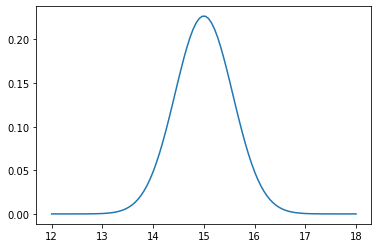

In [1]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

a = np.linspace(12, 18, 100)
# print(a)

def equation(x: list):
	# Mean
	mean = np.mean(a)
	# SD
	sum = 0
	for i in a:
		sum += (i - mean)**2
	SD = ( sum / (len(a)-1) )**0.5
	# return SD
	leftPart = 1 / ( SD * (2*np.pi)**0.5 )
	rightPart = np.e**( -((x-mean)**2) / 2*(SD**2) )
	return leftPart*rightPart

sns.lineplot( x=a, y=equation(a) )

equation(a)



Text(0.5, 1.0, 'Probability (QQ) plot for normally-distributed data')

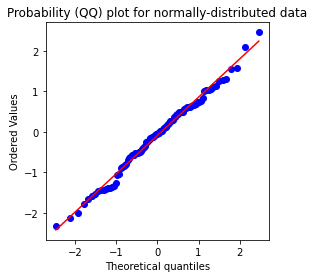

In [11]:
from scipy import stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)
plt.title('Probability (QQ) plot for normally-distributed data')


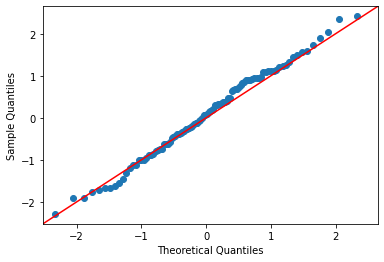

In [7]:

import numpy as np
import statsmodels.api as sm
import pylab as py
  
# np.random generates different random numbers
# whenever the code is executed
# Note: When you execute the same code 
# the graph look different than shown below.
  
# Random data points generated
data_points = np.random.normal(0, 1, 100)    
  
sm.qqplot(data_points, line ='45')
py.show()

NameError: name 'player_data_import' is not defined

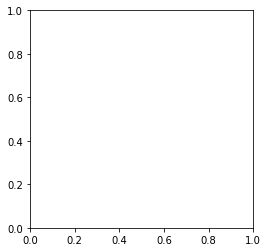

In [3]:
# still roughly normal

from scipy import stats

fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = player_data_import['height_inches'].sample(1000)
stats.probplot(norm_sample, plot=ax)

<AxesSubplot:ylabel='Density'>

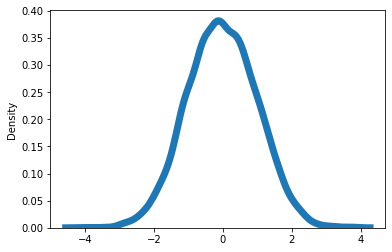

In [1]:
# Standard normal distribution

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

mu, sigma = 0, 1 # Mean and SD
s = np.random.normal(mu, sigma, size=10000)
s

sns.kdeplot(
	x=s, 
	lw=7, 
)

### Kolmogorov-Smirnov



In [25]:
import scipy as sp
import numpy as np


In [23]:
# By default, Kolmogorov-Smirnov tests against 
# !!! standard normal distribution !!! (mean=0, SD=1)

sample = sp.stats.norm.rvs(size=100)
ks_statistic, p_value = sp.stats.kstest(sample, 'norm')
print(ks_statistic, p_value)

0.09678074748539989 0.28725395592709113


In [36]:
# therefore, any normal distribution that is not standard 
# (i.e. normal distribution but with a mean and SD different from 0 and 1, respectively) 
# will produce p-value small enough to reject H0 of normal distribution
sample = np.random.normal(150,10,100)
ks_statistic, p_value = sp.stats.kstest(sample, 'norm')
print(p_value)

# However, you want to test the shape of your distribution
# Solution 1: standardise my data (convert to Z-score)
sample_standardized = [ (i-np.mean(sample))/np.std(sample) for i in sample ]
ks_statistic, p_value = sp.stats.kstest(sample_standardized, 'norm')
print(p_value)

# Solution 2: add arguments in the call to KS test
mean, SD = np.mean(sample), np.std(sample)
ks_statistic, p_value = sp.stats.kstest( sample, 'norm', args=(mean, SD) )
print(p_value)


0.0
0.9791279019017987
0.9791279019017987


In [ ]:
from scipy.stats import kstest, norm
import scipy
import numpy as np

# my_data = norm.rvs(size=100)
my_data = np.random.normal(150,10,100)
# my_data = np.random.normal(size=100)
ks_statistic, p_value = kstest(
	my_data, 
	# 'norm'
	scipy.stats.norm.cdf
	)
print(ks_statistic, p_value)

## Long-tailed

E.g. distribution of household incomes = right-skewed graph, as the tail is on the right. 



## Student's t-distribution 

A normally shaped distribution that is thicker and has longer tails.  

We can use t-distribution if our sample size <u>is less than 30</u>, otherwise we can assume normal distribution as per the CLT. 

Also called Student's t distribution (1908, *Biometrica*, W.S.Gosset aka Student).

<img src="Media/z-t-distributions.png" width="430"/>

90% CI around the sample mean: 

$ \overline{x} \pm t_{n-1}(0.05) \frac{s}{\sqrt{n}} $

, where $n$ - sample size, $t_{n-1}(0.05)$ is the t-statistic value with n-1 degrees of freedom, "excluding" 5% distribution at the two ends. 

## Bernoulli distribution

- Bernoulli event (trial, experiment): even with only two outcomes - success (X=1) and failure (X=0). 
- Bernoulli distribution is the simplest case of binomial distribution.
- The Bernoulli distribution represents the success or failure of a single Bernoulli trial. 
- A discrete distribution.

$P(X=1) = p$

$P(X=0) = q = 1-p$

<img src="Media/Bernoulli_distribution.png" width="300"/>

*Example*

<img src="Media/Bernoulli_distribution_2.png" width="300"/>

> For this distribution, :
> - Mean (expected value) = 0.4*0 + 0.6*1 = 0.6
> 
> no individual will take on a value of 0.6, but over many trials, on average you would get a 0.6
> - Variance:
> $$ \sigma^{2} = 0.4 (0-0.6)^{2} + 0.6 (1-0.6)^{2} = 0.24 $$
> - Standard Deviation:
> $$ \sigma = \sqrt{\sigma^{2}} = 0.49 $$


Text(0.5, 1.0, 'Bernoulli distribution')

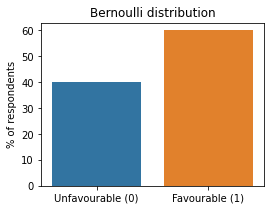

In [9]:
# Bernoulli distribution

import matplotlib.pyplot as plt, seaborn as sns

values = {
	'x': ['Unfavourable (0)', 'Favourable (1)'],
	'y': [40, 60]
}

plt.figure(figsize=(4,3))
sns.barplot( x=values['x'], y=values['y'] )
plt.ylabel('% of respondents')
plt.title('Bernoulli distribution')


## Binomial distribution

Distribution of a binomial random variable.

- Two independent trials with outcomes P1 and P2, with probabilities p and q=(1-p)
- Binomial distribution reports the probability of getting exactly $x$ P1 events in the course of $n$ independent (probability of event does does not depend on how many times it has previously been used) Bernoulli trials. Binomial experiment = repeat Bernoulli event N times. Distribution of successes in n trials. 
- The binomial distribution is defined by only two parameters - p and n. Binomial distribution for coin flip - bell-shaped; but this is not necessarily always the case. 

Formula for probability:

$$ P(x) = {n \choose x} * p^{x} * q^{n-x} = \frac{n!}{(n-x)!x!} p^{x} q^{n-x} $$
, where $p$ - probability of success, $q=1-p$ - probability of failure, $n$ - total number of trials, $x$ - number of successes, $n-x$ - number of failures. 

For example:
- $p(score)=0.7$, $p(miss)=0.3$, p(exactly 2 scores in 6 attempts) = $p(2/6) = {6\choose 2} * 0.7^{2} * 0.3^{4}$

A random variable is binomial if:
- The outcome of each trial has only two options (e.g. success or failure)
- Each trial is identical and independent of the others (result of one trial doesn’t affect the results of the other subsequent trials)
- There is a fixed, clearly-defined number of trials
- The probability p of success on each trial remains constant


<img src="Media/Binomial-distribution.png" width="800"/>

x-axis, number of heads in 200 coin flips. 


> Example:
>  
> 1) 80% of business startups generate a profit in their first year. Find the probability that in a sample of 10 startups, 7 will generate a profit in their first year. 
> $$P(x=7) = {10 \choose 7} * 0.8^{7} * 0.2^{10-7} = 0.2013$$ 
> 2) A cereal company states that 1 in 4 boxes has a prize. $X$ - number of prizes in 6 randomly-selected cereal boxes. What's the probability of getting exactly 2 prizes from 6 boxes?
> $$ P(X-4) = {6 \choose 2} * (0.25)^{2} * (0.75)^{4} = 0.2966 $$
> 3) I plan to guess 6 questions, with each having 4 possible choices and only 1 correct choice. $X$ - the number of correct guesses in 6 questions. What is the probability of correctly guessing fewer than 2 questions correctly in those 6 guestions?
> $$ P(X < 2) = P(X=0) + P(X=1) = {6 \choose 0} * (0.25)^{0} * (0.75)^{6} = 0.53$$

In [ ]:
# The Probability Mass Function (PMF) - probability that an event will happen a certain number of times, given a certain number of samples and probability for success; 
# Cumulative Density Function  - probability that an event will happen a certain number or fewer times
stats.binom.pmf(2, n=5, p=0.1) 
stats.binom.cdf(2, n=5, p=0.1)
# 2 = number of successes
# 5 = number of trials
# probability of clicking once (in each trial) = 0.1


## Chi-square

If you take a standard normal distribution, you sample from it a value, square it, and then repeat N times. What results is the chi-square distribution:

$$ \chi^2_k = Z^2_1 + Z^2_2 + ... + Z^2_k $$
, where $k$ - number of degrees of freedom.

For example, 

- if $k=1$, we sample from one variable that adopts a standard normal distribution: $ \chi^2_1 = Z^2_1$.
- if $k=2$, we sample from two independent variables that adopt standard normal distribution, then summing the squares of those values: $ \chi^2_2 = Z^2_1 + Z^2_2 $
- so forth...

<img src="Media/chi_square_distributions.png" width="500px">

(0.0, 8.0)

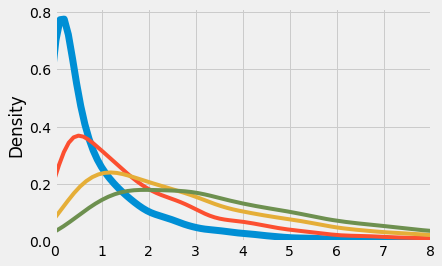

In [66]:
import random, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

mu, sigma = 0, 1 # Mean and SD
s1, s2, s3, s4, s5 = np.random.normal(mu, sigma, 10000), np.random.normal(mu, sigma, 10000), np.random.normal(mu, sigma, 10000), np.random.normal(mu, sigma, 10000), np.random.normal(mu, sigma, 10000)

results = {
	'k=1': [],
	'k=2': [],
	'k=3': [], 
	'k=4': [],
	'k=5': []
}

for i in range(10000):
	choice1 = random.choice(s1)
	choice2 = random.choice(s2)
	choice3 = random.choice(s3)
	choice4 = random.choice(s4)
	choice5 = random.choice(s5)
	results['k=1'].append( choice1**2  )
	results['k=2'].append( choice1**2 + choice2**2 )
	results['k=3'].append( choice1**2 + choice2**2 + choice3**2 )
	results['k=4'].append( choice1**2 + choice2**2 + choice3**2 + choice4**2 )

results

sns.kdeplot(
	x=results['k=1'], 
	lw=7, 
)

sns.kdeplot(x=results['k=2'])
sns.kdeplot(x=results['k=3'])
sns.kdeplot(x=results['k=4'])

# plt.xticks([0,2,4,6,8])
plt.xlim([0, 8])

## Poisson

Poisson process - a random variable. 

Assumptions:
- All hours are possible;
- Occurrences happening in one hour don't affect the occurrences in the other; 

## Other distributions

- Chi-Square distribution
- Poisson
- Power law: $y = x^{constant}$
- Exponential distribution: $y = (constant)^{x}$
- F-distribution
- Weibull distribution

<img src="Media/Exponential-vs-powerlaw.jpg" width="500"/>


# Hypothesis testing

- Null hypothesis: no difference, and any difference between the groups is random; 
- Alternative hypothesis. 

In many parametric tests, we need to get a p-value - probability of obtaining the Z-score for a specific result from your sample, assuming that sampling distribution of H0 (t-distribution, z-distribution, whatever) is true. IOW, given that H0 is true, what's the probability of obtaining the observed result? 

Statistical significance of an experiment (or of a difference between two groups) is assessed with a p-value. P-value, in turn, can be obtained, by two methods: 
1. t-test etc.; check the theoretical distribution to find out how extreme your obtained value is; 
2. randomization inference: take the results from the two groups, re-randomize (mix them and randomly distribute) into two groups, measure the difference, repeat re-randomization many times, check how extreme your value is; 

Resampling (*to obtain p-values*): 
- **Bootstrap**: for estimating CI; estimates the variability of the sampling process. *Bootstrapping can also generate p-value*.
  - In a bootstrap permutation test, the draws outlined in steps 2 and 3 of the random permutation test are made with replacement instead of without replacement.
- **Permutation**: aims to quantiy the null distribution; iow, check if the observed difference can be explained by only a random sampling; *Permutation test can generate p-value*. 
  - Exhaustive permutation test: consider every possible permutation of the data;  
  - Random permutation (randomization): take a sample - perform randomisation R times; 
  - Bootstrap permutation test. 


Statistical significance:
- p-value: probability of obtaining results more or as extreme as the observed results by chance. E.g. in permutation test, it is the proportion of times permutation test produced a resulting difference that was equal or greater than the experimental difference. P value really is conditional probability: $\text{p-value} = p(\overline{x} \ge \text{ obtained result | H0 is true})$
- alpha: a threshold of the result being considered extreme. Significance level. Typically, 0.10, 0.05, 0.01. 
  - If p-value < alpha, reject H0 (suggests Ha; there is convincing evidence for Ha); 
  - if p-value >= alpha, do not reject (fail to reject) H0; 
- Type 1 error (false positive): rejecting H0 when it's true; saying effect is real (when really it's due to chance); P(rejecting H0 | H0 true)
- Type 2 error (false negative): not rejecting H0 when it's false; saying effect is due to chance (when really it's real); P(not rejecting H0 | H0 false)
- (statistical) power: $\text{power} = P(\text{rejecting }H_{0} | H_{0}\text{ is false}) = 1 - T2E$
- As we decrease $\alpha$, we increase $P(T2E)$, subsequently decreasing power. 
- Also, as we decrease $\alpha$, we decrease $P(T1E)$


<img src="Media/False_positive_etc.png" width="500">

Multiple testing:
- Alpha inflation: alpha (probability of commiting a type 1 error) increases with increasing number of tests. 
- Adjustment of p-values: adjustment for multiple tests. E.g. Bonferonni adjustment/correction, Tukey's HSD (honest significance test)
- **Bonferroni correction**: when testing n different hypotheses simultaneously, the resulting p-value must rise to a level of $\alpha/n$, in order to be considered as significant at the $\alpha$ level. Essentially, <u>divide the alpha by the number of comparisons</u>

ANOVA:
- Performs a single overall test showing whether there is a difference between multiple variables, with a single p-value; 
1. Combine all data; 
2. Shuffle, draw out resamples (the same amount of resamples as the original number of groups); 
3. Calculate mean of each of the resample and then calculate variance btw the groups, record the variance;  
4. Repeat steps 2-4 lots of times (1000x); 
5. p-value = proportion of times when the variance of resamples exceed or equals to the observed variance; 



## Statistical tests

**Independent samples** – subjects in one group do not provide info about subjects in the other group. They can’t be paired. E.g. medication trial has a control and a treatment group consisting of different individuals. **Dependent samples** – e.g. training program taking pretest and posttest scores from the same group of people. 


| Compare / measure what? | Example | Parametric test | Non-parametric test |
| - | - | - | - |
| Compare population proportion (%) with a sample proportion (%) | | z-test about a proportion | |
| Compare sample mean to a known population mean | Collected birth weights of people with SIDS, want to know whether the obtained average birth-weight of SIDS subjects is different from the national average of 3300g. | One-sample t-test | Wilcoxon test, sign test |
| Measure one group at two different times; dependent groups - 1 variable, 2 categories, within-subjects | Examine students' diagnostic test results before and after studying. E.g. insulin rate in 30 patients before and after the medical treatment. Every patient is associated with two measurements. | Paired t-test | Wilcoxon signed-rank test, Wilcoxon Rank sum test |
| Compare means between 2 independent groups (1 variable, 2 categories, between subjects) | Do male managers have higher average salaries than the female managers? | Unpaired t-test (independent samples t-test) | Mann-Whitney U test |
| Compare means between 3+ independent groups (1 variable, 3+ categories, between subjects) | Is there a difference in crop yield if a farmer uses fertiliser A, B, or C? | One-way ANOVA | Kruskal-Wallis test (Kruskal-Wallis H test) |
| 1 variable, 3+ categories, within-subjects || repeated measures ANOVA | Friedman test, ANOVA on ranked data |
| Estimate the degree of association between two variables | Does the number of hours a person spends on social media affects the number of hours they sleep at night? | Pearson correlation coefficient | Spearman's rank correlation |
| One categorical variable | You want to test a hypothesis about distribution of one categorical variable. E.g. we have an expected distribution of sales of food items; we then measure it one day, and want to check if the measured distribution coincides with the expected one. Another example - Decide if bags of candy have the same number of pieces of each flavor or not | ? | Chi-Square Goodness of fit test |
| Two categorical variables | We have hair color (blonde and brunette) variable - marginal distribution (overall) and the conditional distribution by sex. Is the difference between the conditional and marginal distribution of hair color significant, or can be expected by random chance? Another example - Decide if movie goers' decision to buy snacks is related to the type of movie they plan to watch | Poisson regression? | Pearson's $\chi^2$ test of independence |



## z-test (proportion)

Conditions for this test:
- Random sample condition;
- Normal: there are at least 10 counts in each sample group;
- Independence: testing less than 10% of the population size;

Formula: 

$$Z = \cfrac{\hat{p} - p_{0}}{\sqrt{\cfrac{p_{0}(1-p_{0})}{n}}}$$
, where $\hat{p}$ - proportion obtained from a sample, $n$ - sample size, $p_{0}$ - population proportion. 

---

**Example**

> There is a statistic saying that 26% of people speak more than one language. 
>
> We are curious if this statistic is higher in our town. We took a sample of people in my town, and we found that 40 of 120 sampled people (0.33, or roughly 33%) speak more than one language.
>
> Let's test it?

- First, the necessary conditions (random, normal, independent) are met;
- $H_{0}$, $p=0.26$ | $H_{a}$, $p > 0.26$;
- Let's calculate z-statistic: $Z = \cfrac{0.33-0.26}{\sqrt{\cfrac{0.26(1-0.26)}{120}}} = 1.83$
- Now let's find a probability value (p-value) for this z-statistic:
- $\text{P-value} = P(Z \ge 1.83) \approx 0.036$ ( we just take the value from the z-table, as this is one-tail test)
- $p < \alpha$, therefore, we can reject the null hypothesis and conclude that at the $\alpha = 0.05$ significance level, the percentage changed significantly. 



## Random permutation test

By re-randomising the results, you could tell the probability of obtaining the results you got just by random chance.

1. Combine the results from different groups into one dataset; 
2. Randomly draw resamples into groups of the same size as the original ones; 
3. Calculate statistic for the resamples; 
4. Repeat step 3 R times; 
5. Draw a permutation distribution of the test statistic.
6. If the observed difference lies within the set of permuted differences, then the observed difference is within the range that is produced by random chance. If it lies outside of the most of permutation distribution, -> conclude that the difference is not by random chance -> statistically significant. 

> **Example (from Khan academy)**:
> 
> Giovanna usually takes bus B to work, but she thinks but A can be faster. 
> 
> She randomized 50 workdays between two groups: treatment (bus A) and control (bus B)
> At the end of the 50 days, she recorded $median(A) - median(B) = -8$, meaning that the median travel duration for bus A is 8 minutes less than that for bus B, from this experiment.
>  
> To test whether the results could be explained by random chance, she performed 1000 re-randomizations of data (where she took the results from those 50 days, redistributed them into the two groups randomly, calculated the difference of medians, and then performed the whole procedure again 1000 times). 
> Below is the table of re-randomization results (rounded values):
> 
> According to the simulations, what is the probability of the treatment group's median being lower than the control group's median by 8 minutes or more? 
> 
> From the table below, we calculate that the frequency as extreme as the obtained result or more is $(8+85)/1000 = 0.093$, meaning that probability of obtaining the same or more extreme result by random is 9.3% - the result is not statistically significant. 

| $median(A) - median(B)$ | Frequency |
| - | - |
| -10 | 8 |
| -8 | 85 |
| -6 | 97 |
| -4 | 161 |
| -2 | 83 |
| 0 | 127 |
| 2 | 93 |
| 4 | 159 |
| 6 | 107 |
| 8 | 62 |
| 10 | 18 |




In [ ]:
# random Permutation test
import numpy as np, random
import matplotlib.pyplot as plt, seaborn as sns

# AB test
groupA = [15, 16, 17, 19, 16, 18]
groupB = [19, 21, 17, 22, 22, 21]
# Original difference
difference = np.mean(groupB) - np.mean(groupA); print(difference)

# combine results
combined_results = groupA + groupB; print(combined_results)
# Perform numerous tests
permutation_diffs = []
for i in range(10000):
	# shuffle
	random.shuffle(combined_results); 
	# Draw two resamples
	resampleA, resampleB = combined_results[:len(groupA)], combined_results[len(groupA):]
	# print(resampleA)
	# print(resampleB)
	permutation_diffs.append(np.mean(resampleB) - np.mean(resampleA))


# print(permutation_diffs)

sns.histplot( x=permutation_diffs, bins=30 )
plt.title('Distribution of permutation test results')
plt.xlabel('Resamples differences')
plt.ylabel('Frequency')

plt.axvline(difference, color='red', linewidth=2, ls='--')
plt.text(difference, 8, "observed\ndifference", bbox={'facecolor':'white'})

# How many times (what percentage of cases) do we observe the observed difference by chance?
difference_chance = np.mean( permutation_diffs >= (difference) )
print(f"Observed difference between group A and group B: {difference}")
print(f"We find the difference that is the same or better, but by random chance, in {difference_chance * 100}% cases")
p_value = difference_chance
print(f"Statistically significantly group B is higher than group A: {p_value < 0.05} (p = {p_value})") 
# If true, then the observed difference btw groups is outside range of variation by random chance and is statistically significant


## Student's t-test

> E.g. to determine if means of two sets of data are significantly different from each other. 

| Test | Description | Formula | Example |
| - | - | - | - |
| $\text{One-sample t-test}$ | **Compare sample mean to population mean**. $H_{0}$ - there is no difference between the sample mean and population mean, and the observed difference is likely due to random chance; $H_{a}$ - there is a significant difference between the sample mean and population mean.  | $$t = \cfrac{\overline{x}-\mu}{S_{\overline{x}}} = \frac{\overline{x}-\mu}{\frac{S}{\sqrt{n}}}$$, where $\mu$ - a population mean, $\overline{x}$ - sample mean to test, $S$ - standard deviation of the sample, $S_{\overline{x}}$ - standard error. | P-value >=0.05, we cannot conclude that the population mean differs from the sample mean. P-value < 0.05, then it is unlikely that the discrepancy you observed between sample mean and hypothetical mean is due to a coincidence arising from random sampling. You can reject the idea that the difference is a coincidence, and conclude instead that the population has a mean different than the hypothetical value you entered. |
| $\text{Independent two-sample t-test}$ | Compare means of two independent groups. | $$ t = \cfrac{ (\overline{x}_{1} - \overline{x}_{2}) }{ \sqrt{\cfrac{S_{1}^{2}}{n_{1}}+\cfrac{S_{2}^{2}}{n_{2}}} } $$, $S_{1}^{2}$ and $S_{2}^{2}$ - sample variance, $\overline{x}_{1}$ and $\overline{x}_{2}$ - means of samples. | $df = n_{1} + n_{2} -2$|
| $\text{Paired samples t-test}$ | Compare mean of a group before and after a treatment. | | |

<u>Assumptions of a t-test</u>:
- Data are continuous;
- Independent - sampling with replacement OR sample size is less than 10% of total population size. 
- Data are approximately normally distributed: either $n \ge 30$ (sample size) or, if $n < 30$, data is approximately normally-distributed. 
- Data is randomly sampled;
- Have a similar amount of variance within each group of comparison (variance in both sample groups is similar); 





---



_**Example of one sample t-test**_:
> Mean to test: 65000, 95% confidence
> 
> Sample: $\overline{x} = 62456.2$, $S = SD = 2418.4$, $n=30$, $\alpha = 0.05$

- First, let's write our hypotheses: $H_{0}$ - there is no difference between population and sample means; $H_{a}$ - sample mean is smaller than the population mean (left-tailed test);
- Let's calculate t-statistic: $t = \cfrac{\overline{x} - \mu}{\cfrac{SD}{\sqrt{n}}} = \cfrac{62456.2 - 65000}{\cfrac{2418.4}{\sqrt{30}}} = -5.761$ (it's negative because sample mean lies to the left of the population mean);
- For $\alpha = 0.05$, $df=29$, and right-tailed test, $t_{crit}=1.699$. $t > t_{crit}$, therefore, we can reject the null hypothesis. 


### Examples


x_hat = 130.05 | n = 20 | SD = 9.96
Normality test ( can we reject null hypothesis of normal distribution?): 0.989623686078989
t-statistic (manual) = 4.512
T-statistic (scipy) =  4.512403659336718
P-Value:  0.00023838063630967753


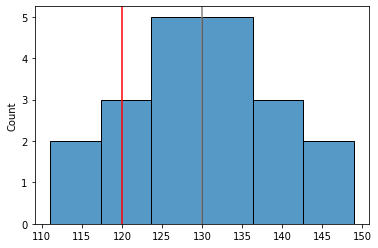

In [31]:
""" 
One-sample t-test

> scipy.stats.ttest_1samp

H_0: mu = 120
H_A: mu != 120
"""
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt, seaborn as sns

mu = 120
sample = [128,118,144,133,132,111,149,139,136,126,127,115,142,140,131,132,122,119,129,128]
x_hat = np.mean(sample)
sample_n = len(sample)
SD = np.std(sample, ddof=1)
print(f"x_hat = {x_hat} | n = {sample_n} | SD = {SD:.2f}")
sns.histplot(sample)
plt.axvline(x_hat, color='grey')
plt.axvline(mu, color='red')

# first, normality test, to check that the distribution is normal
# Kolmogorov-Smirnov
sample_standardized = [ (i-x_hat)/SD for i in sample ]
ks_statistic, p_value = sp.stats.kstest(sample_standardized, 'norm')
print(f"Normality test ( can we reject null hypothesis of normal distribution?): {p_value}")


# check critical t-value in the table
# for alpha=0.05, two-tail test, df=19, t_critical = 2.093

# calculate t-statistic
t = (x_hat - mu)/( SD/np.sqrt(sample_n) )
print(f"t-statistic (manual) = {t:.3f}")

# t-stat > t_crit for alpha=0.05, therefore it's in rejection region
# we can reject H_0 -> sample mean is different from population mean

# Let's use library
t_stat, p_value = sp.stats.ttest_1samp(sample, popmean=mu)
print("T-statistic (scipy) = ", t_stat)  
print("P-Value: ", p_value)


Sample 1: n = 16 mean = 15.381 | SD = 0.312
Sample 2: n = 16 mean = 15.681 | SD = 0.407
T-statistic: -2.339
-2.338821384818735 0.026198051170501974


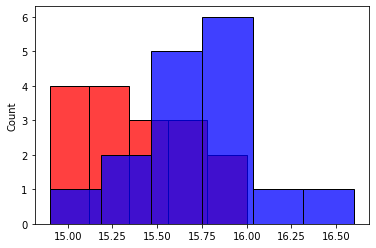

In [5]:
"""
Independent sample t-test

> scipy.stats.ttest_ind

H_0: no statistically significant difference between groups
H_a: there is a difference between the two groups
"""
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt, seaborn as sns

sample1 = [15.2,15.3,16.0,15.8,15.6,14.9,15.0,15.4,15.6,15.7,15.5,15.2,15.5,15.1,15.3,15]
sample2 = [15.9,15.9,15.2,16.6,15.2,15.8,15.8,16.2,15.6,15.6,15.8,15.5,15.5,15.5,14.9,15.9]
n1, n2 = len(sample1), len(sample2)
sample1_mean, sample2_mean = np.mean(sample1), np.mean(sample2)
SD_1, SD_2 = np.std(sample1, ddof=1), np.std(sample2, ddof=1)
print(f"Sample 1: n = {n1} mean = {sample1_mean:.3f} | SD = {SD_1:.3f}")
print(f"Sample 2: n = {n2} mean = {sample2_mean:.3f} | SD = {SD_2:.3f}")
sns.histplot(sample1, color='red')
sns.histplot(sample2, color='blue')

# Calculate t-statistic
t = (sample1_mean - sample2_mean)/(np.sqrt( (SD_1**2)/n1 + (SD_2**2)/n2 ))
print(f"T-statistic: {t:.3f}")
# check critical t-value
# df = n1+n2-2 = 16+16-2 = 30
# t-crit = 2.042
# our t-statistic is greater than crit value, therefore, reject H0

# Let's use a library
t_stat, p_value = sp.stats.ttest_ind(
	sample1, sample2,
	equal_var = True # are variance values the same? True by default
	)
print(t_stat, p_value)

In [ ]:
"""
Paired t-test
"""
# t_stat, p_value = ttest_rel(sample1, sample2)
# print("T-statistic value: ", t_stat)  
# print("P-Value: ", p_value)

## A/B testing

Check which of the two treatments (control or treatment) is better.

Test statistic (metric) - such as conversion / no conversion. 

## Chi-Square test

There are three different types of Chi-Square test:
| Type | Definition | Example |
| - | - | - |
| Goodness-of-Fit | Determines whether a categorical data came from a theoretical distribution, or whether a population distribution fits a theoretical distribution. | There is a distribution of scores on AP test from 2017, do the scores from this year follow a different distribution to that of 2017? |
| Homogeneity | The "test of homogeneity" is a way of determining whether two or more sub-groups of a population share the same distribution of a single categorical variable. Data is collected by randomly sampling <u>from each sub-group separately</u>. | Do people of different races have the same proportion of smokers to non-smokers? Do people in Canada and the US respond differently to the product (we sampled people from Canada and the US)? |
| Independence / Association | The "test of independence" is a way of determining whether two categorical variables are associated with one another in the population. In the test of independence, observational units are collected at random <u>from the same population and two categorical variables are observed for each unit</u> of that population. $H_0$: no association between variables X and Y (independent), $H_1$: there is an association. | E.g. is there an association between the lengths of foot and hand (variables = which hand is longer, which foot is longer? Is there a relationship between a student's gender and the superpower they'd like to have (from the random sample of students from the same population)? |

Homogeneity and Independence tests are calculated in the same way. In fact, the difference between them is very subtle and only lies in the data collection and hypothesis wording.

Limitations:
- Chi-square test CANNOT be used with percentages, only with numbers; 
- For chi-square test, the number of each expected observation needs to be at least 5. 



### Goodness of fit 

Goodness of fit assumptions / requirements:
1. You want to test a hypothesis about the distribution of one categorical variable;
2. The sample was randomly selected from the population; 
3. Large Counts: there are a minimum of 5 observations in each **expected** group. In the **observed** group, the numbers can be any, even less than 5.
4. The sample size should be less than 10% of the population size; 

Example goodness of fit:
- One categorical variable - dog food flavours and their sales; compare observed distribution with the theoretical one. 
- We have an advertised (expected) frequency of different types of chocolate in a box; we have measured (observed) a distribution in a randomly-chosen box; need to check if the observed distribution is the same as the theoretical (advertised, expected) one; 

---

**Example 1**  - Goodness of Fit:

E.g. the number of customers on each day of the week. We have a total of 200 customers measured, and a theoretical % distribution.

| Day observation | M | T | W | T | F | S | *Total* |
| - | - | - | - | - | - | - | - |
| Expected (%) | 10 | 10 | 15 | 20 | 30 | 15 | *100%* |
| Observed | 30 | 14 | 34 | 45 | 57 | 20 | *200* |

Are these two conditional distributions different?
- $H_0$: expected/theoretical distribution is correct;
- $H_1$: expected/theoreitcal distribution is not correct, based on the measured data.

Here, the smallest sample size is so that each expected value is at least 5. Therefore, $n_{min} = 50$.

$\alpha$ = 0.05

Steps:
1. Convert percentages (from expected) to numbers:

| Day observation | M | T | W | T | F | S | *Total* |
| - | - | - | - | - | - | - | - |
| Expected (numbers, from 200) | 20 | 20 | 30 | 40 | 60 | 30 | *200* |
| Observed | 30 | 14 | 34 | 45 | 57 | 20 | *200* |

2. Calculate the Chi-square statistic:

$ \chi^2 = \frac{(30-20)^2}{20} + \frac{(14-20)^2}{20} + \frac{(34-30)^2}{30} + \frac{(45-40)^2}{40} + \frac{(57-60)^2}{60} + \frac{(20-30)^2}{30} = 11.44 $

3. Look up the Chi-square statistic in the Chi-square table:

$df=5$, for $alpha=0.05$, the critical chi-square value (threshold) is $ \chi^2_c = 11.070$. Because $11.44 > 11.070$, our result getting by chance is less than 0.05, so we can reject the null hypothesis (distribution) - it's not a good fit.

---

**Example 2**

We want to check if the distribution of answers on a test - A, B, C and D - is equal. 

$H_0$: equal distribution of correct choices - 25% A, 25% B, 25% C, and 25% D;
$H_1$: not equal distribution. 

We first take a sample of n=100; 

| Correct choice | Expected # | Observed # |
| - | - | - |
| A | 25 | 20 |
| B | 25 | 20 |
| C | 25 | 25 |
| D | 25 | 35 |

Now, what's the probability of getting our observed result by random chance? I.e. how likely that what we observed is simply due to random fluctuations?

Smallest sample size = 20.

Assuming $\alpha = 0.05$, let's calculate the chi-square statistic:

$ \chi^2 = \frac{(20-25)^2}{25} + \frac{(20-25)^2}{25} + \frac{(25-25)^2}{25} + \frac{(35-25)^2}{25} = 6 $

For $df=3$, the threshold chi-square statistic is $7.81$. Our statistic is smaller, therefore, fail to reject the null hypothesis.

---

**Example 3**

In the game rock-paper-scissors, you can expect to win, lose, and tie with equal frequency. Here is a sample of outcomes of n=24 games:

| Outcome | Win | Loss | Tie |
| - | - | - | - |
| Games | 4 | 13 | 7 |

We can carry out a chi-square goodness-of-fit test to check whether the observed distribution disagrees with the theoretical (equal frequency) distribution.

Smallest sample size = 15; this is because the minimum value for each expected column is 5, therefore, 15/3 = 5.

First, let's fill in the expected values:

| Outcome | Win | Loss | Tie |
| - | - | - | - |
| Observed | 4 | 13 | 7 |
| Expected (for n=24) | 8 | 8 | 8 |

$ \chi^2 = \frac{(4-8)^2}{8} + \frac{(13-8)^2}{8} + \frac{(7-8)^2}{8} = 5.25 $

According to the chi-square table, for $df=2$ and $\alpha=0.05$, the critical value is $\chi^2_c = 5.991$. $\chi^2 < \chi^2_c$, therefore we cannot reject the $H_0$, $0.05 < p <0.1$.

### Independence and Homogeneity

The test to check if two categorical variables are independent; Independent events: $ P(A|B) = P(A) $.

The test of independence presumes that you have 2 random variables and you want to test their independence given the sample at hand. The goodness of fit test, on the other hand, works on 1 random variable at a time. In the case of goodness of fit, the expected counts are calculated under the assumption that the sample came from the hypothesized distribution. In the case of the test of independence, the expected counts are calculated under the assumption that the 2 random variables are independent, as follows.

---

**Example** - homogeneity test

Is there an association between hand and foot length? 
- $H_0$, no association between foot and hand length; 
- $H_1$, there is an association.

| | Right foot longer | Left foot longer | Both feet same | **Total** |
| - | - | - | - | - |
| Right hand longer | 11 | 3 | 8 | **22** |
| Left hand longer | 2 | 9 | 14 | **25** |
| Both hands same | 12 | 13 | 28 | **53** |
| **Total** | **25** | **25** | **50** | **100** |

Fill in the expected table:
| | Right foot longer | Left foot longer | Both feet same |
| - | - | - | - |
| Right hand longer | 5.5 | 5.5 | 11 |
| Left hand longer | 6.25 | 6.25 | 12.5 |
| Both hands same | 13.25 | 13.25 | 26.5 |

Check conditions:
- Took a random sample;
- Expected value for any data point at least equals to 5;
- 

Calculate the chi-square statistic:

$ \chi^2 = \frac{(11-5.5)^2}{5.5} + \frac{(3-5.5)^2}{5.5} + \frac{(8-11)^2}{11} + \frac{(2-6.25)^2}{6.25} + \frac{(9-6.25)^2}{6.25} + \frac{(14-12.5)^2}{12.5} + \frac{(12-13.25)^2}{13.25} + \frac{(13-13.25)^2}{13.25} + \frac{(28-26.5)^2}{26.5} = 11.942 $

For $df=4$ and $\alpha=0.05$, critical statistic is $9.488$; therefore, we can reject the null hypothesis.  

---

**Example**

Three treatments - treatment1, treatment2, and placebo. 

Contingency table:

| | Treatment 1 | Treatment 2 | Placebo | **Total** |
| - | - | - | - | - |
| Sick | 20 | 30 | 30 | **80** |
| Not sick | 100 | 110 | 90 | **300** |
| **Total** | **120** | **140** | **120** | **380** |

$H_0$: treatments do not have any effect on the sickness outcome; 
$H_1$: treatments do have some kind of effect on the sickness outcome; 

Significance level $\alpha=0.10$

First, let's calculate the expected values for each cell. For example, treatment1-sick expected value is calculated as $\frac{80*120}{380}=25.3$:

| | Treatment 1 (expected) | Treatment 2 (expected) | Placebo (expected) | **Total** |
| - | - | - | - | - |
| Sick (expected) | 25.3 | 29.4 | 25.3 | **80** |
| Not sick (expected) | 94.7 | 110.6 | 94.7 | **300** |
| **Total** | **120** | **140** | **120** | **380** |

Now we can calculate the chi-squared statistic:

$ \chi^2 = \frac{(20-25.3)^2}{25.3} + \frac{(30-29.4)^2}{29.4} + \frac{(30-25.3)^2}{25.3} + \frac{(100-94.7)^2}{94.7} + \frac{(110-110.6)^2}{110.6} + \frac{(90-94.7)^2}{94.7} = 2.53 $

We have $df = (r-1)(c-1) = 2$ degrees of freedom; let's check the critical chi-square statistic value in the chi-square table:

For 2 df and at alpha of 0.1, the critical value is $\chi^2_c = 4.605$. 

$\chi^2 < \chi^2_c$, therefore, we cannot reject the null hypothesis. 

---

**Example 1** - relationship (independence) test:

Experimental data:
| Action | Headline A | Headline B | Headline C | Total (row) |
| - | - | - | - | - |
| Click | 14 | 8 | 12 | **34** |
| No-click | 986 | 992 | 988 | **2966** |
| Total (column) | **1000** | **1000** | **1000** | **3000** |

Step 1. Rewrite contingency table with expected values for each group:

*The expected value for each cell is calculated by multiplying the row total to the column total and dividing by the total number of observations for a cell to get the expected count*

E.g., click-headlineA: $expected = \frac{34*1000}{3000} = 11.333$. In this particular case, because in each division of the variable we have the same counts, expected values for each variable category will also be the same.

| Action | Headline A | Headline B | Headline C | 
| - | - | - | - |
| Click | 11.33 | 11.33 | 11.33 |
| No-click | 988.67 | 988.67 | 988.67 |

Step 2. Calculate Pearson residual and the chi-square statistic: 

$r = \frac{observed-expected}{\sqrt{expected}}$

Pearson residuals:

| Action | Headline A | Headline B | Headline C | 
| - | - | - | - |
| Click | 0.792 | -0.990 | 0.198 |
| No-click | -0.085 | 0.106 | -0.021 |

Formula for Chi square:

$$ X^2 = \sum_{i}^{rows} \sum_{j}^{col-s} r^{2} = \sum (\frac{(observed-expected)^{2}}{expected}) $$ 
, r and c - numbers of rows and columns. 

$X^2 = 0.792^2 + (-0.990)^2 + 0.198^2 + (-0.085)^2 + 0.106^2 + (-0.021)^2 = 1.666$ 

Subsequently, the p-value can be generated by several methods:

**Using random permutation test**

Steps 1 and 2 we did once for our experimental data. Now for resampling: 

Step 3. Repeat steps 1 and 2 1000x times, each time record the X statistic. 

Step 4. Calculate p-value and check where the observed X statistic is on the sampling distribution of X resamplings; 

**Using the chi-square table**

$df = (r-1)(c-1)$ where r is the number of rows and c is the number of columns. If the observed chi-square test statistic is greater than the critical value, the null hypothesis can be rejected

In [1]:
# Implementation from some book

import random, numpy as np

box = [1] * 34
box.extend([0] * 2966)

random.shuffle(box)

def chi2(observed, expected):
	""" Returns X^2 for a given column """
	pearson_residuals = []
	for row, expect in zip(observed, expected):
		pearson_residuals.append([(observe - expect)**2 / expect for observe in row])
	# Return the sum of squares
	return np.sum( pearson_residuals )

# First, calculate X^2 for observed data
expected_clicks = 34/3
expected_noclicks = 1000 - expected_clicks

expected = [ 34/3, 1000 - 34/3 ]
chi2observed = chi2( [[14,8,12], [986,992,988]], expected )
print(f"X^2 observed: {chi2observed:.4f}")

def perm_fun(box):
	sample_clicks = [sum(random.sample(box,1000)), sum(random.sample(box,1000)), sum(random.sample(box,1000))]
	sample_noclicks = [1000-n for n in sample_clicks]
	return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for i in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f"resampled p-value: {resampled_p_value:.4f}")

X^2 observed: 1.6659
resampled p-value: 0.4845


Chi-square value of our sample: 1.666
----- Permutation test -----
Initialised an answer pool of size 3000 with 34 positive and 2966 negative values.
------------------------------
resampled p-value: 0.4810


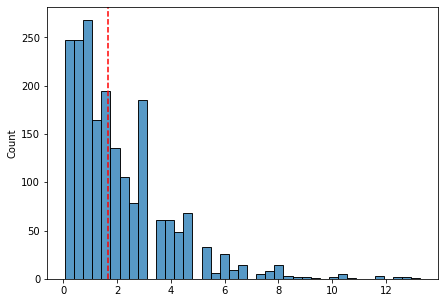

In [2]:
# My implementation of the chi-square test

import random
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

def chi2(observed:list) -> float:
	""" 
	Return X^2 for a given column.
	
	observed: [ event1[var1, var2, ... varn], event2[var1, var2, ... varn] ]
	expected: [ expected for event1, expected for event2 ]
	"""
	expected = [ np.mean(i) for i in observed ]
	pearson_residuals_squared = []
	for o_list, e in zip(observed, expected):
		pearson_residuals_squared.append( [ ((o-e)**2)/e for o in o_list] )
	# At this point, pearson_residuals_squared is a list of sublists, 
	# where each sublist contains squared pearson residual for each observation
	return np.sum(pearson_residuals_squared)


observed = [[14,8,12],[986,992,988]]
chiSquared_sample = chi2( observed )

print(f"Chi-square value of our sample: {chiSquared_sample:.3f}")

# Now let's perform random permutation test
def random_permutation_test( observed:list, N:int ):
	""" N - number of iterations """
	answer_pool = [1]*sum(observed[0]) + [0]*sum(observed[1])
	permutation_results = []
	print(f"----- Permutation test -----")
	print(f"Initialised an answer pool of size {len(answer_pool)} with {answer_pool.count(1)} positive and {answer_pool.count(0)} negative values.")
	for i in range(N):
		random.shuffle(answer_pool)
		n = len(observed[0])
		permute_positive = [ sum(answer_pool[j*1000:j*1000+1000]) for j in range(n) ]
		permute_negative = [ 1000-j for j in permute_positive ]
		# print(permute_positive)
		# print(permute_negative)
		permutation_results.append( chi2([permute_positive, permute_negative]) )
	print("-"*30)
	return permutation_results


chiSquared_permutationTest = random_permutation_test( observed, 2000 )
chiSquared_permutationTest

resampled_p_value = sum(chiSquared_permutationTest > chiSquared_sample) / len(chiSquared_permutationTest)
print(f"resampled p-value: {resampled_p_value:.4f}")

plt.figure(figsize=(7,5));
sns.histplot(chiSquared_permutationTest);
plt.axvline(chiSquared_sample, color='red', linestyle='dashed');

## Fisher's exact test

While chi-square applies an approximation, Fisher's exact test enumerates all possible permutations and gives an exact p-value. 

# Data Visualisations


In [ ]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt

## Main parameters

Text in labels can be written with latex:
```py
g.set_ylabels(r"Text here $\sigma^{2}$")
```

Names of colors: 

<img src="Media/named_colors_seaborn.webp" width="500"/>

```python

# in SEABORN, if a function for a specific plot has the parameter "palette", 
# you can specify palette colors in different ways:
flowers_df = sns.load_dataset('iris')
palette=['green','blue','orange'],
palette={'setosa':'black', 'versicolor':'green', 'virginica':'blue'},
palette='pastel',
palette=sns.color_palette('viridis', n_colors=3),


# Set axis limits
ax = plt.gca()
ax.set_xlim([xMin, xMax])

# Save the figure in high definition
plt.savefig(
	f'Figure name.png', format='png', 
	dpi=800, 
	bbox_inches='tight', # Prevents axis labels in saved image from getting cut off
	facecolor='white', edgecolor='none' # to make sure that in the saved image the background color is 'white' and not transparent (in case of saving as 'png')
)

# Change order of items in legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

# Print text on the graph
plt.text(
	x, y, # Coordinates
	s, # text
	horizontalalignment=['left', 'right'], verticalalignment=['bottom', 'top'] 
	)

# Pre-sets of data in seaborn:
sns.get_dataset_names() # print all pre-made datasets in seaborn
sns.load_dataset('iris')
sns.load_dataset('tips')
sns.load_dataset('flights')
sns.load_dataset('exercise')
sns.load_dataset('penguins')

###########################################################################################################################
#####   Style   ###########################################################################################################
###########################################################################################################################

# Change scale
sns.set_context('talk') # Increasing size: paper, notebook, talk, poster
sns.set_context('talk', font_scale=1.25)
# Change plot style
sns.set_style('whitegrid') # white, whitegrid, dark, darkgrid, ticks
sns.set_style('darkgrid', {'axes.facecolor': '0.9'}) # Get more details here: https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style
# different palettes
sns.set_palette('tab10') # brg, Set1, Set1_r, Set2, Set3, hls, viridis, Accent, Dark2, Dark2_r, Paired_r
# pastel, muted, deep, colorblind, bright, dark
# Change all above (with override of previous settings)
sns.set_theme(context='talk', style='ticks', palette='bright')

# Remove the top and right axes
sns.despine(trim=True) 

# COLORS

import seaborn as sns
# List of all available colours
sorted(sns.xkcd_rgb.keys())
# All red variants
[i for i in sns.xkcd_rgb if 'red' in i]

```


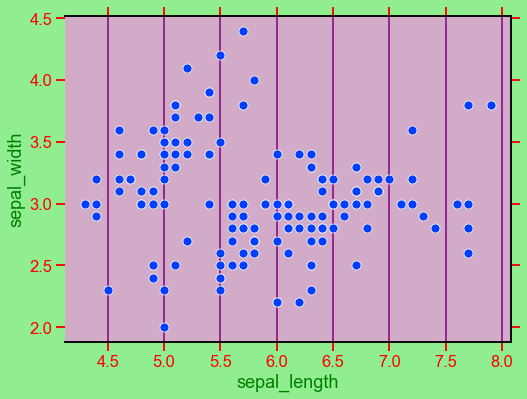

In [42]:
# for color can use HEX, e.g. #2c2cc7

df = sns.load_dataset('iris')
df

plt.figure(figsize=(8,6))
sns.set_context('talk')
graph = sns.scatterplot(
	x='sepal_length', y='sepal_width', data=df
)
sns.set_style('whitegrid', {
	# COLOURS
	'figure.facecolor': 'lightgreen', # outside figure background color
	'axes.labelcolor': 'green', # white intensity of axes labels ('0.5') OR input color name
	'axes.facecolor': '#d1abc7', # inside figure background color
	'xtick.color': 'red', # white intensity of x axes ticks ('0.5') OR input color name
	'ytick.color': 'red', # white intensity of y axes ticks ('0.5') OR input color name
	'axes.edgecolor': 'black', # colour of the axes outside square border
	'grid.color': 'purple',

	'axes.axisbelow': True, # Bool: position figure x and y axis below or above the actual data? 
	'grid.linestyle': '-', 
	'xtick.top': True, 'xtick.bottom': True, # Draw individual ticks for x axis
	'ytick.right': True, 'ytick.left': True, 
	'axes.grid': True, # Remove axes grid
	'axes.spines.left': False,
	# 'ytick.color': 'grey' # Only change color of ticks and their values, without axes spine
	# 'axes.edgecolor': 'grey' # Only change color of axes spine
})
graph.yaxis.grid() # Remove horisontal axis

## Global API

In matplotlib, we can use global API (invoking functions at the level of the module `pyplot`)

```py
# Set axis limits between 20-30
plt.xlim([20,30])

```

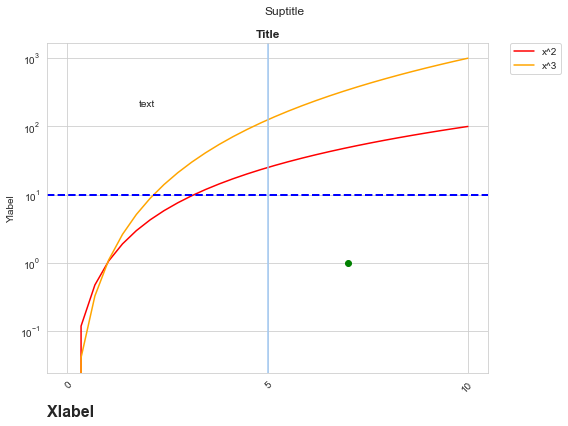

In [41]:
# OOP

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Change figure size
plt.figure(figsize=(8,6))
x = np.linspace(0, 10, 30)
plt.plot(x, x**2, color='red')
plt.plot(x, x**3, color='orange')
sns.set_style('whitegrid')

# Figure title
plt.title('Title', weight='bold')
plt.suptitle('Suptitle')

# Axes labels
plt.xlabel(
	'Xlabel',
	fontweight='bold', fontsize=16, 
	loc='left',
	labelpad=10
	)
plt.ylabel('Ylabel')

# Axes ticks
plt.xticks([0, 5, 10], rotation = 45, ha='right', rotation_mode='anchor')

# Log scale
plt.yscale('log')

# Create a legend outside of the figure box
plt.legend(['x^2', 'x^3'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Horisontal / vertical line
plt.axhline(
	10, 
	color='blue', 
	linewidth=2, 
	ls='--' # linestyle = 'solid', 'dotted'
) # Horisontal
plt.axvline(5)


plt.plot( 7, 1, color='green', marker='o') # Markers: .,ov^<>s
# Write text on the graph
plt.text(2,200, s='text', horizontalalignment='center')

# Use if headings overlap
plt.tight_layout()

<AxesSubplot:>

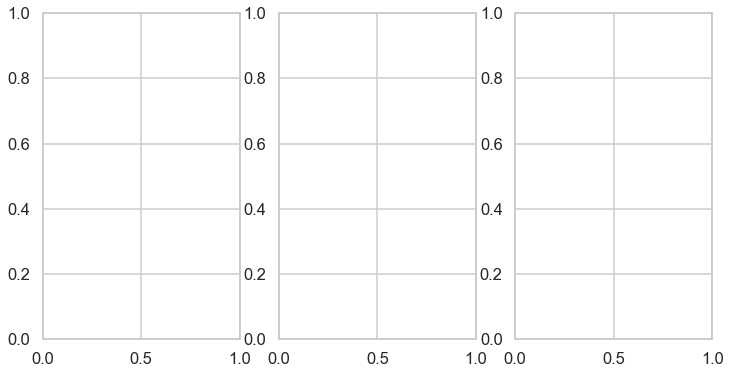

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1) # rows, columns, panel selected

plt.subplot(1, 3, 2)

plt.subplot(1,3,3)

## OOP

In matplotlib, we can use OOP interface by creating objects. 

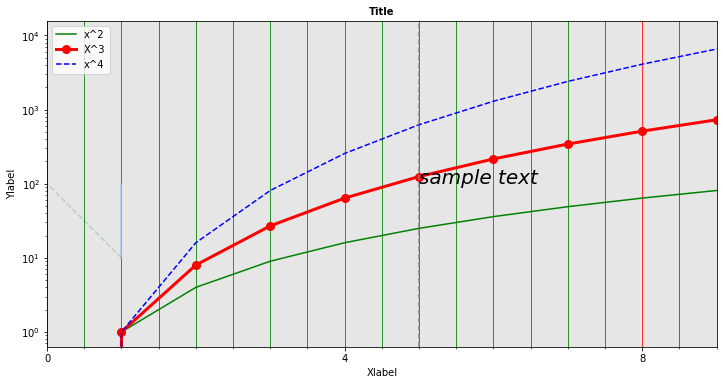

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(12,6))

x = np.arange(0, 11, 1)
graph1 = sns.lineplot(x=x, y=x**2, color='green', label='x^2')
ax.plot(x, x**3, color='red', linewidth=3, marker='o', markersize=8, label='X^3')
ax.plot(x, x**4, color='blue', label='x^4', linestyle='--')

# Change figure size
# fig.set_dpi(100)
# fig.set_size_inches(7,5)

# Figure title
ax.set_title(
	'Title', 
	fontweight='bold', # ultralight, light, normal, semibold, bold, heavy, extra heavy, black
	fontsize=10
	)

# ax labels
ax.set_xlabel('Xlabel')
ax.set_ylabel('Ylabel')

# ax ticks
# ax.set_xticks([0,5,10])

# Log scale
ax.set_yscale('log')

# Create a legend outside of the figure box
ax.legend()

# Horisontal / vertical line
ax.axvline(5, color='grey', linestyle='dashed')

# Write stuff on the plot
### TEXT
ax.text(
	5, 100, 'sample text', size=20,
	fontstyle='italic'
	)
### Line
ax.plot((1,1),(10,100))
ax.plot((1,0),(10,100), color='green', linestyle='dashed', alpha=0.2)

ax.set_xlim([0,9])

# set_xticks is overridden by MultipleLocator described below
# ax.set_xticks(list(range(0, 7, 1)))

ax.set_facecolor('0.9') # Change background color

# MinorTicks X
ax.grid(True, which="minor", axis='x', ls="-", color='green');
locmin = mticker.MultipleLocator(0.5);
ax.xaxis.set_minor_locator(locmin);

# Major ticks X
ax.grid(True, which="major", axis='x', ls="-", color='red');
locmin = mticker.MultipleLocator(4);
ax.xaxis.set_major_locator(locmin);

plt.show()

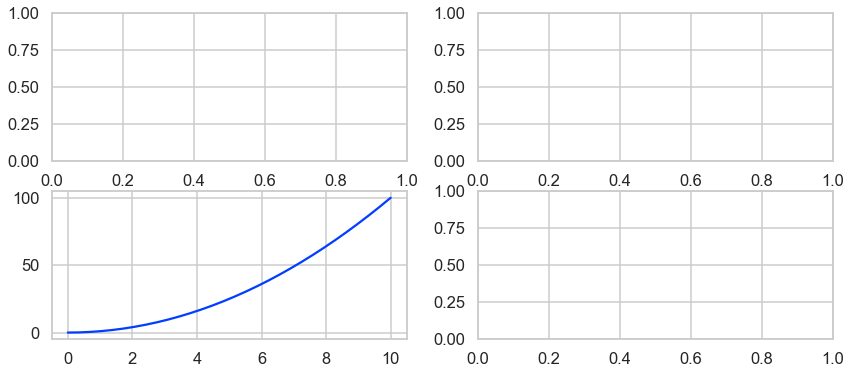

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

x = np.linspace(0, 10, 30)
axes[1,0].plot(x, x**2)

## Tabular representations of data

**Contingency table** (crosstabulation, cross table) - a useful way to summarise two categorical variables. 
- Top row = category 1, 
- left column = category 2, 
- cells = frequencies. 

<img src="Media/Crosstabulation.png" width="530"/>
 
<img src="Media/Contingency-table.png" width="400"/>

*Marginal distribution* - e.g. distribution of sex (52, 48), distribution of handedness (87, 13).

*Conditional distribution* - e.g. distribution of sex within right-handed people;

**Frequency distribution table**

Like a histogram in tabular form. 

<img src="Media/Frequency_distribution_table.png" width="250"/>

**Stem-and-leaf diagram**

<img src="Media/Stem_and_leaf.png" width="300"/>

**Two-way frequency table**
- Two-way relative frequency table if it’s expressed in percentage
you take two variables, one variable occupies column while another occupies rows, then calculate frequency

<img src="Media/Two-way_frequency_table.png" width="500"/>


## Dotplot

The number of dots in the plot equals to the number of observations. 

Variables: X - categorical, Y - numerical. 

<img src="Media/Dotplot.png" width="500"/>

<img src="Media/Dotplot_2.png" width="500"/>

## Scatterplot

Variables: X, Y - numeric continuous; 

```py
plt.plot(x,y)
plt.scatter(x,y)
```

Text(0.5, 1.0, 'Sepal dimensions')

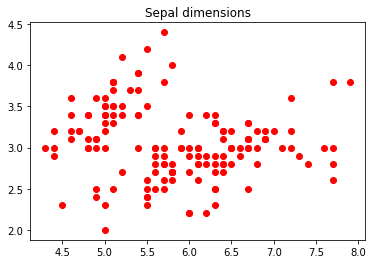

In [2]:
# MATPLOTLIB

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')
plt.plot(flowers_df['sepal_length'], flowers_df['sepal_width'], 'or')
# plt.plot('sepal_length', 'sepal_width', 'or', data=flowers_df) ## alternative way of writing
plt.title('Sepal dimensions')

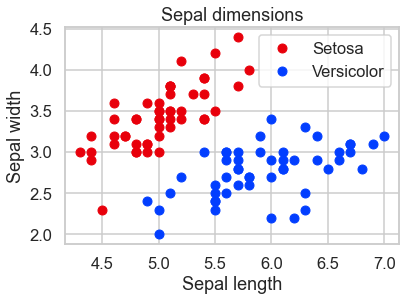

In [77]:
# MATPLOTLIB

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

flowers_df = sns.load_dataset('iris')
df2 = flowers_df[flowers_df['species'] == 'setosa']
df3 = flowers_df[flowers_df['species'] == 'versicolor']

plt.plot( df2['sepal_length'], df2['sepal_width'], 'or' )
plt.plot( df3['sepal_length'], df3['sepal_width'], 'ob' )

plt.title('Sepal dimensions')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Setosa', 'Versicolor'])

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sepal dimensions')

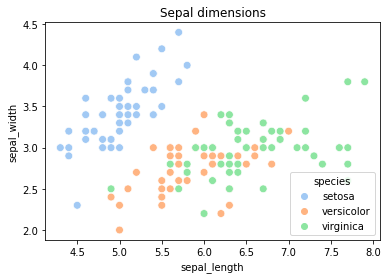

In [34]:
# SEABORN

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt


sns.set_palette('pastel')
sns.scatterplot(
	flowers_df['sepal_length'], flowers_df['sepal_width'], 
	hue=flowers_df['species'], 
	palette='pastel',
	s=60
)


# Alternative way to pass data:
# sns.scatterplot('sepal_length', 'sepal_width', data=flowers_df)

plt.title('Sepal dimensions')


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feature 1', ylabel='feature 2'>

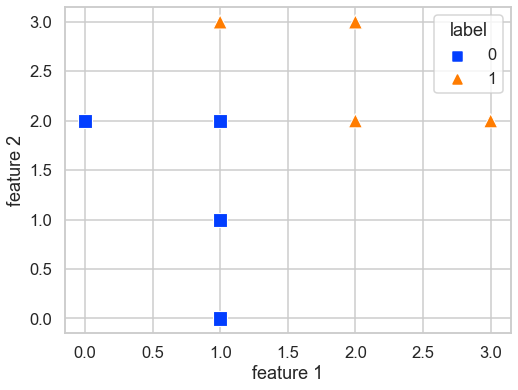

In [79]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

df = pd.DataFrame({
	'feature 1': features[:,0], 
	'feature 2': features[:,1],
	'label': labels
})

df

plt.figure(figsize=(8,6))
sns.scatterplot( 
	'feature 1', 'feature 2', 
	data=df,
	style='label', 
	s=200, 
	hue='label',
	markers = ['s', '^'] 
	# markers={'feature 1':'s', 'feature 2': 'X'} # o, circle; s, square; ^, triangle; 
)


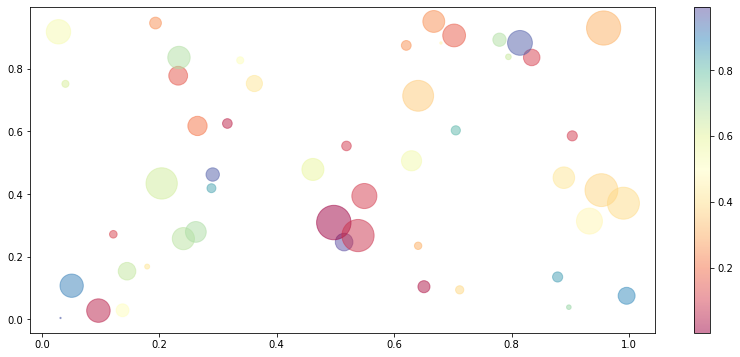

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Global API
N=50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 

plt.figure(figsize=(14, 6))
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

0 Group 1
1 Group 2
2 Group 3
3 Group 4
4 Group 5


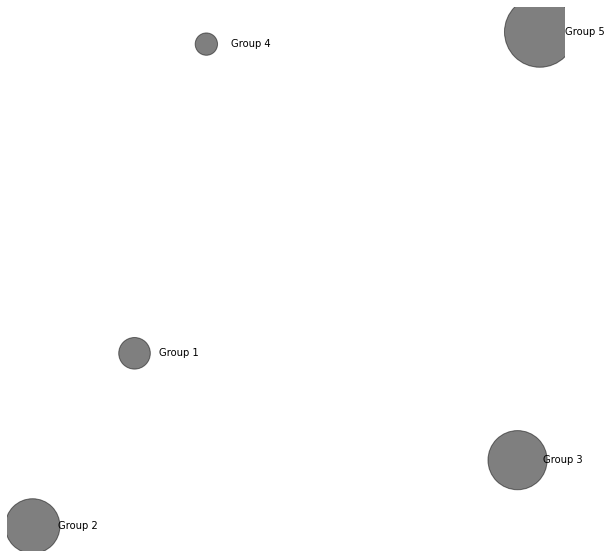

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Global API
N = 5
x = np.random.uniform(1, 2, N)
y = np.random.uniform(1, 2, N)

colors='black'

dataset = {
	'Title': ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5'],
	'Number': [10, 30, 35, 5, 50]
}

def process(dataset):
	return [i*100 for i in dataset]

plt.figure(figsize=(10, 10))
plt.scatter(x, y, s= process(dataset['Number']), c=colors, alpha=0.5, cmap='Spectral')

for i, j in enumerate(dataset['Title']):
	print(i, j)
	plt.text(
		x[i] +0.03, y[i],
		dataset['Title'][i],
		verticalalignment='center'
	)


plt.axis('off')

plt.show()

## Stripplot

Scatterplot where one variable is categorical. 

Good addition to violin / box plot if you want to map individual observations. 

In [ ]:
df = sns.load_dataset('iris')
df

sns.stripplot(
	x='species', y='sepal_length', data=df, 
	color='black', size=4
)

## Box (box-and-whiskers) plot

e.g. dataset {4, 4, 6, 7, 10, 11, 12, 14, 15}. Median (Q2) = 10; Q1 = 5, Q3 = 13, IQR = 13-5 = 8. 

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

df = pd.DataFrame({
	'variable': [1, 2, 3, 2, 2.5, 5, 10, 3, 4, 1, 3]
})
sns.set_theme(style='whitegrid')
sns.boxplot(x=df['variable'])

In [ ]:
df = sns.load_dataset('iris')
df

sns.boxplot(   x='species', y='sepal_length', data=df, showfliers=False )
sns.stripplot( x='species', y='sepal_length', data=df, color='black' )


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


items_df = pd.read_csv('example_datasets/CASP14_2020.csv', sep='\t');

plt.title('CASP14 results (2020)');
# sns.set_theme(style="ticks");
sns.boxplot(items_df['SUM Zscore (>0.0)'], 
			whis=[0, 100], width=.6);
sns.stripplot(items_df['SUM Zscore (>0.0)'], 
			size=4, color='black', linewidth=0);

plt.text(205, 0.05, 'AlphaFold -->', color='red'); 

### Violin plot

An enhancement to the boxplot. 

It can show the nuances in the data distributions that are hidden in the boxplot. 

However, the outliers are less visible. 

## Bar plot

Count of single categorical variable. 

<img src="Media/Bar_plots.png" width="500"/>

Text(0.5, 1.0, 'Yield of oranges')

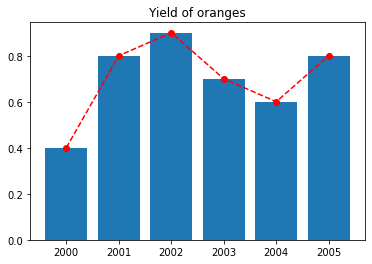

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart

years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

plt.bar(years, oranges);
plt.plot(years, oranges, 'o--r'); 
plt.title('Yield of oranges')

<BarContainer object of 6 artists>

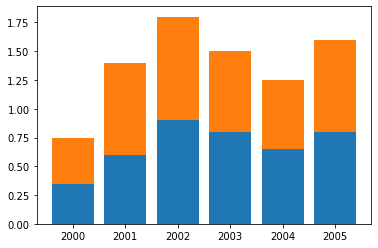

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stacked component bar graph

years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

plt.bar(years, apples)
plt.bar(years, oranges, bottom=apples)

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='total_bill'>

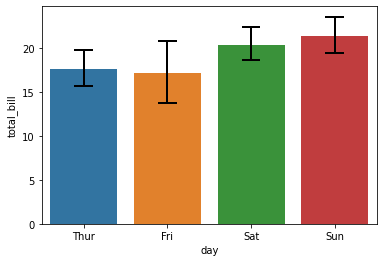

In [3]:
# Barplot
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

tips_df = sns.load_dataset('tips')
sns.barplot(
	tips_df.day, tips_df.total_bill, 
	errcolor='black', errwidth=2, capsize=0.2
)

# Alternative 

# bill_avg_df = tips_df.groupby('day')[['total_bill']].mean();
# plt.bar(bill_avg_df.index, bill_avg_df.total_bill);

In [ ]:
import Bio
from Bio.Seq import Seq



dna = Seq("ATGATCTCGTAA")
rna = Seq("AUGUUCUCGUAA")

#### Plot of frequency of nucleotides / base 

import matplotlib.pyplot as plt
from collections import Counter

dna_freq = Counter(dna)

plt.bar(dna_freq.keys(), dna_freq.values())

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='total_bill'>

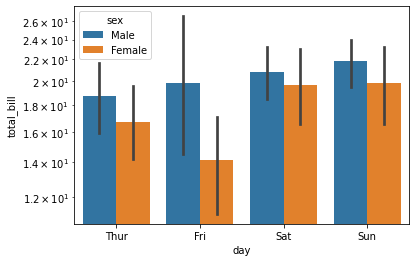

In [4]:
# Grouped bar plot
import seaborn as sns, matplotlib.pyplot as plt

sns.barplot(
	'day', 'total_bill', data=tips_df, 
	hue='sex', 
	log=True
)

# flip the graph
# sns.barplot('total_bill', 'day', hue='sex', data=tips_df); # here, the graph is flipped

In [ ]:
# ticks btw each log power are not equal

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib as plt

items_df = pd.read_csv('example_datasets/Hypercuboids_data.csv', sep = ',')
# print(items_df)
print(items_df.columns)
############################################################################################

fig, axes = plt.subplots(
	2, 1, 
	figsize = (8,10), 
	# sharex=True
)

plt.suptitle("Comparison of two algorithms", weight = 'bold') # Common title for all figures
plt.style.use('fivethirtyeight')

# axes[0].set_title('Comparison of runtimes of the two algorithms')
sns.barplot(
	x='sample_N', y='runtime', data=items_df, 
	hue='algorithm', 
	log=True, 
	ax = axes[0]
)
axes[0].set_xlabel("Genotypes, n")
axes[0].set_ylabel("Runtime, sec")
axes[0].get_legend().remove()
fig.legend(loc='lower center', frameon=False, ncol=3, bbox_to_anchor = (0.5, 0.9))

# axes[1].set_title('Comparison of hypercuboids found by the two algorithms')
plot1 = sns.barplot(
	x='sample_N', y='hypercubes_found', data=items_df, 
	hue='algorithm', 
	log=True, 
	# legend='Hide',
	# legend = False,
	ax = axes[1]
)
axes[1].set_xlabel("Genotypes, n")
axes[1].set_ylabel("Hypercubes found")
# axes[1].legend()
axes[1].get_legend().remove()

plt.tight_layout(pad=2)

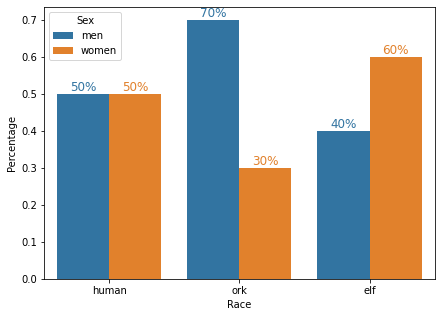

In [17]:
# Grouped bar chart

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
	'Percentage': [0.5,0.5, 0.7,0.3, 0.4,0.6],
	'Race': ['human','human','ork','ork','elf','elf'],
	'Sex': ['men','women','men','women','men','women']
})
df

plt, ax = plt.subplots(figsize=(7,5))

sns.barplot(x='Race', y='Percentage', data=df, hue='Sex')

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value*100:.0f}%'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

# alternative way to label grouped bar plots
# for container in ax.containers:
# 	ax.bar_label(container, fmt='%.0f%%')

## Histogram

Shows frequencies of intervals into which the data is subdivided, while losing identities of individual observations. Count of single numerical variable. 

A subset of histogram is a **pictograph** - quantity represented by quantity of pictures: 

<img src="Media/Pictograph.png" width="300"/>

Also, a histogram can be represented, instead of counts, in percentages for each bar / category, as *relative frequency histogram*.

### Univariate

Text(0.5, 1.0, 'Distribution of Sepal Width')

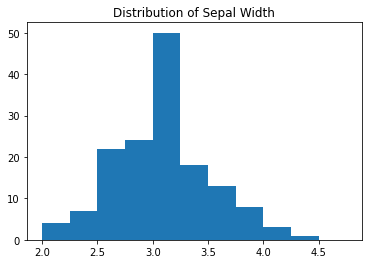

In [5]:
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt
flowers_df = sns.load_dataset('iris')

plt.hist(
	flowers_df['sepal_width'], 
	# bins=10,
	bins=np.arange(2, 5, 0.25) 
	# bins=[1, 3, 4, 4.5]
);

plt.title('Distribution of Sepal Width')


(array([ 3.,  6., 12., 13., 14.,  2.,  0.,  0.,  0.,  0.,  0.]),
 array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 ,
        4.75]),
 <BarContainer object of 11 artists>)

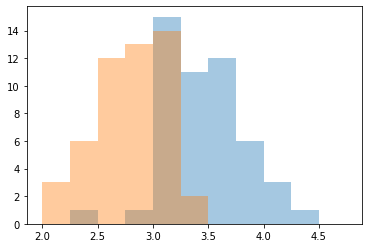

In [6]:
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt
flowers_df = sns.load_dataset('iris')

plt.hist(
	flowers_df[flowers_df['species'] == 'setosa']['sepal_width'], 
	alpha=0.4, bins=np.arange(2, 5, 0.25), 
)

plt.hist(
	flowers_df[flowers_df['species'] == 'versicolor']['sepal_width'], 
	alpha=0.4, bins=np.arange(2, 5, 0.25)
)

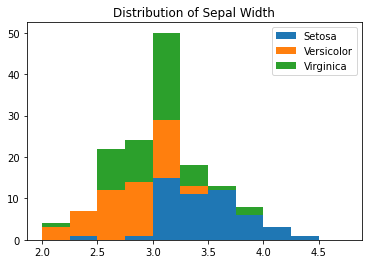

In [7]:
# stacked histogram
# MATPLOTLIB

import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd
flowers_df = sns.load_dataset('iris')

plt.hist(
	[
		flowers_df[flowers_df['species'] == 'setosa']['sepal_width'], 
		flowers_df[flowers_df['species'] == 'versicolor']['sepal_width'], 
		flowers_df[flowers_df['species'] == 'virginica']['sepal_width']
	], 
	stacked=True, 
	bins=np.arange(2, 5, 0.25)
)

plt.title('Distribution of Sepal Width'); 
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

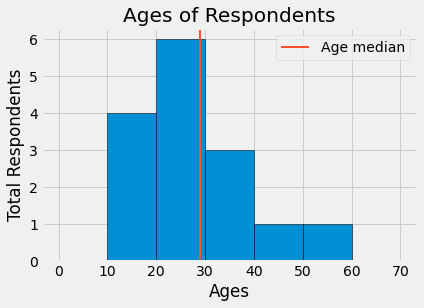

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

ages = [18, 18, 17, 20, 23, 19, 21, 25, 26, 26, 30, 32, 38, 45, 55,]
bins = [0, 10, 20, 30, 40, 50, 60, 70]
# data = pd.read_csv('data.csv')
# ids = data['Column_name1']
# ages = data['Column_name2']

plt.hist(
	ages, 
	# bins = 30, 
	bins = bins,
	edgecolor = 'black', 
	# log=True
)

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.axvline( # Plots a vertical line
	29, color='#fc4f30', label='Age median', 
	linewidth=2
) 

plt.legend()

# plt.tight_layout()

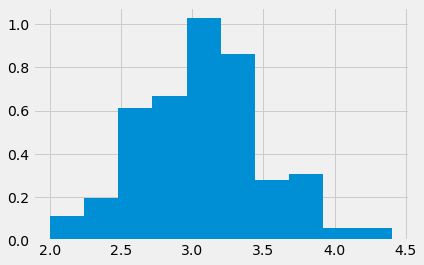

In [12]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt
flowers_df = sns.load_dataset('iris')

plt.hist(
	flowers_df['sepal_width'], 
	density=True
);


### Bivariate

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

sns.displot(
	data=df, x='bill_length_mm', y='bill_depth_mm',
	binwidth=0.6, 
	palette = 'crest', 
	
	# log_scale=(True, False)
)



In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

sns.displot(
	data=df, x='bill_length_mm', y='bill_depth_mm',
	binwidth=0.6, 
	palette = 'crest', 
	kind='kde'
	
	# log_scale=(True, False)
)



## Density plot (KDE)

Density plot (kernel density estimate) - smoothed histogram. 

Density curves show probability. The area under the curve equals to 100% of all possibilities. 
Like histogram but:
- Y axis is not frequency, but percentage of the total amount
- There are infinite number of infinitely-small bars

For a density curve, it is incorrect to get point estimation, e.g. *what percentage of flowers have sepal length of 6?*. A correct question would enquire the area under the curve for an interval, e.g. *What percentage of flowers have sepal length within the range of 5.5-6.5?*.

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

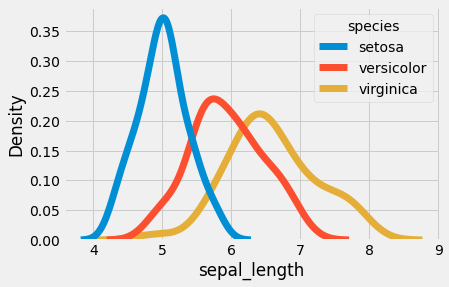

In [13]:
import seaborn as sns

iris = sns.load_dataset('iris')

sns.kdeplot(
	x='sepal_length', data=iris, hue='species', 
	lw=7
)

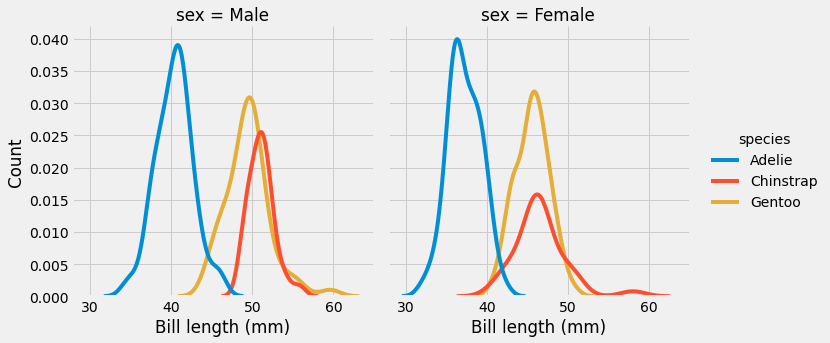

In [14]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

df = sns.load_dataset('penguins')
df

graph = sns.displot(
	data=df, x='bill_length_mm', 
	hue='species', col='sex',
	# binwidth=0.6, 
	kind='kde'
)

graph.set_axis_labels('Bill length (mm)', 'Count')


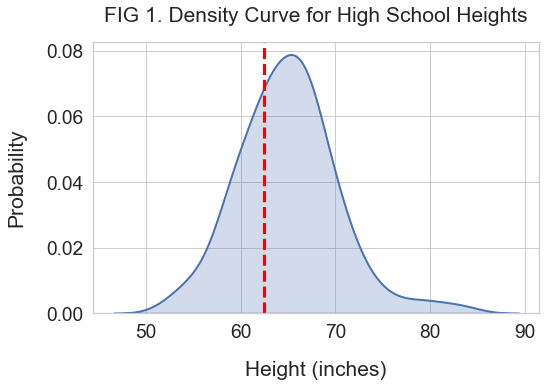

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

heights = np.random.normal(65, 5, 100)

# Set style and font scale using Seaborn 
sns.set_theme(style='whitegrid', font_scale = 1.75)
# set figure size
plt.figure(figsize=(8,5)) 

# Draw Density Curve
# fill=True shades the area under the curve  
sns.kdeplot(heights, linewidth=2, fill=True)

# Vertical line at the peak value - for reference 
plt.axvline(x=62.5, linewidth=3, color='red', linestyle='--')

# title & labels
plt.title("FIG 1. Density Curve for High School Heights", pad=20)
plt.xlabel("Height (inches)", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.show()

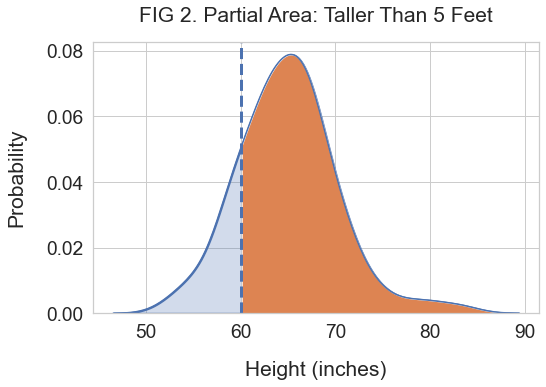

In [32]:
plt.figure(figsize=(8, 5))

# Draw the density curve with it's area shaded
sns.kdeplot(heights, linewidth=2, fill=True)
# Invoke kdeplot() again to get reference to axes 
ax = sns.kdeplot(heights)

# Below code to shade partial region is from 
# https://stackoverflow.com/a/49100655

# Get all the lines used to draw the density curve 
kde_lines = ax.get_lines()[-1]
kde_x, kde_y = kde_lines.get_data()

# Use Numpy mask to filter the lines for region 
# reresenting height greater than 60 inches 
mask = kde_x > 60
filled_x, filled_y = kde_x[mask], kde_y[mask]

# Shade the partial region 
ax.fill_between(filled_x, y1=filled_y)

# vertical line at x = 60 for reference
plt.axvline(x=60, linewidth=3, linestyle='--')

plt.title("FIG 2. Partial Area: Taller Than 5 Feet", pad=20)
plt.xlabel("Height (inches)", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.show()

In [33]:
import numpy as np 

# Area of the orange region (66 inches & above)
area = np.trapz(filled_y, filled_x)

print(f"Probability of heights higher than 60 inches: {area.round(4)}")

Probability of heights higher than 60 inches: 0.8167


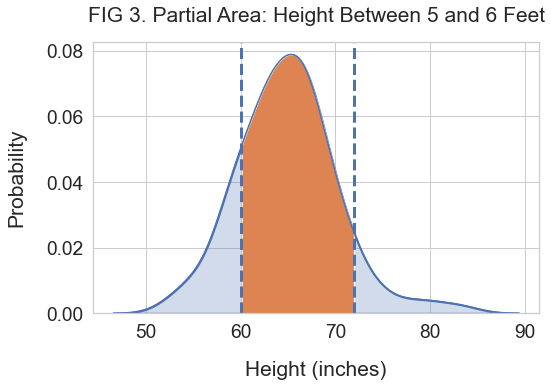

In [34]:
plt.figure(figsize=(8, 5))

# Plot density curve 
sns.kdeplot(heights, linewidth=2, fill=True)
ax = sns.kdeplot(heights)

# Get all the lines used to draw density curve 
kde_lines = ax.get_lines()[-1]
kde_x, kde_y = kde_lines.get_data()

# Filter for height between 5 feet (60 inches) & 6 feet (72 inches)
mask = (kde_x > 60) & (kde_x < 72) 
filled_x, filled_y = kde_x[mask], kde_y[mask]

# Shade the partial region 
ax.fill_between(filled_x, y1=filled_y)

# Vertical lines at 5 and 6 feet for reference
plt.axvline(x=60, linewidth=3, linestyle='--')
plt.axvline(x=72, linewidth=3, linestyle='--')

plt.title("FIG 3. Partial Area: Height Between 5 and 6 Feet", pad=20)
plt.xlabel("Height (inches)", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.show()

In [35]:
area = np.trapz(filled_y, filled_x)
print(f"Fraction of heights between 5 and 6 feet: {area.round(4)}")

Fraction of heights between 5 and 6 feet: 0.7272


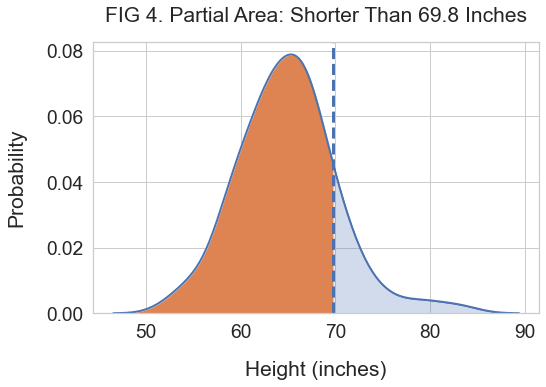

In [37]:
plt.figure(figsize=(8, 5))

# Plot density curve 
sns.kdeplot(heights, linewidth=1, fill=True)
ax = sns.kdeplot(heights, linewidth=2)

# Get lines used to draw density curve 
kde_lines = ax.get_lines()[-1]
kde_x, kde_y = kde_lines.get_data()

monica_height = 69.8

# Filter and shade the region with for heights
#  less than monica's 
mask = kde_x < monica_height
filled_x, filled_y = kde_x[mask], kde_y[mask]
ax.fill_between(filled_x, y1=filled_y)

# vertical line for reference
plt.axvline(x=monica_height, linewidth=3, linestyle='--')

plt.title("FIG 4. Partial Area: Shorter Than 69.8 Inches", pad=20)
plt.xlabel("Height (inches)", labelpad=20)
plt.ylabel("Probability", labelpad=20)
plt.show()

In [38]:
# area of the orange region 
area = np.trapz(filled_y, filled_x)
# convert to percentage
pct = (area*100).round(2)
print(f"Percent of heights below {monica_height} inches: {pct}%")

Percent of heights below 69.8 inches: 83.67%


## Line plot

plt.plot arguments: 
- ```color, c```: set the color of the line 
- ```linestyle, ls```: 	choose between a solid or dashed line
- ```linewidth, lw```:	set the width of a line
- ```markersize, ms```:	set the size of markers
- ```markeredgecolor, mec```:	set the edge color for markers
- ```markeredgewidth, mew```:	set the edge width for markers
- ```markerfacecolor, mfc```: set the fill color for markers
- ```alpha```: opacity of the plot
- ```fmt = '[marker][line][color]'```: e.g. fmt=[s--b]; this argument provides a shorthand for specifying the line style, marker, and line colour

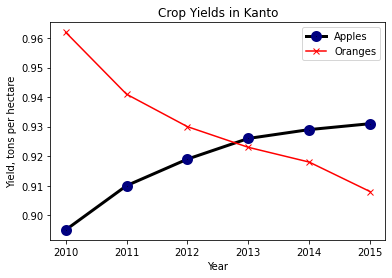

In [16]:
# MATPLOTLIB

import pandas as pd
import matplotlib.pyplot as plt
# to ensure that plots are embedded within notebook cells, not as pop-ups
%matplotlib inline


df = pd.DataFrame({
	'yield_apples': [0.895, 0.91, 0.919, 0.926, 0.929, 0.931], 
	'yield_oranges': [0.962, 0.941, 0.930, 0.923, 0.918, 0.908],
	'years': [2010, 2011, 2012, 2013, 2014, 2015],
})


plt.plot(df['years'], df['yield_apples'], marker='o', color='black', ls='-', lw=3, mew=5, mec='navy') # plot line 1
plt.plot(df['years'], df['yield_oranges'], marker='x', color='red') # plot line 2
plt.xlabel('Year'); plt.ylabel('Yield, tons per hectare') # print axis labels
plt.title('Crop Yields in Kanto') # print title
plt.legend(['Apples', 'Oranges'])

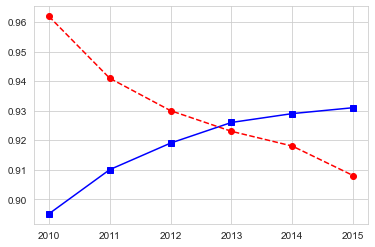

In [17]:
# MATPLOTLIB + SEABORN STYLE

import pandas as pd
import seaborn as sns
import numpy as np

df = pd.DataFrame({
	'yield_apples': [0.895, 0.91, 0.919, 0.926, 0.929, 0.931], 
	'yield_oranges': [0.962, 0.941, 0.930, 0.923, 0.918, 0.908],
	'yield_cucumbers': np.random.uniform(0.7, 1, 6), 
	'years': [2010, 2011, 2012, 2013, 2014, 2015],
})



sns.set_style('whitegrid') # 'darkgrid'
plt.plot(df['years'], df['yield_apples'], 's-b')
plt.plot(df['years'], df['yield_oranges'], 'o--r') # 'or' = dot plot 
# plt.plot(df['years'], df['yield_cucumbers'], 'or')

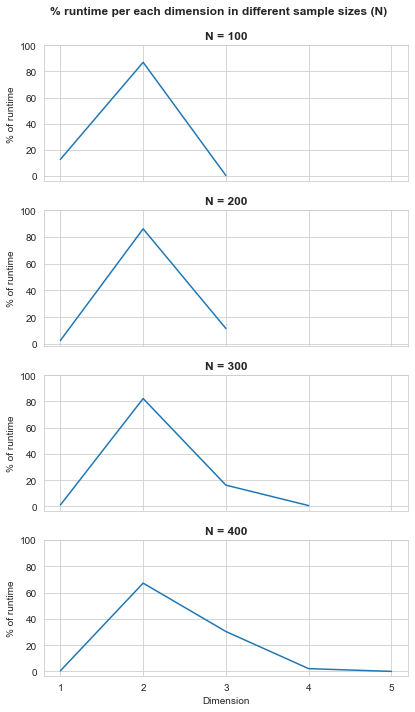

In [18]:
# SEABORN
# Multi-subplot line plots

import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

#############################################################################################
#####   Data processing   ###################################################################
#############################################################################################
df = pd.read_csv('example_datasets/IPDS7_hyperrectangles_2.tsv', skiprows=1, sep='\t')

# Filter data
df = df[(df['Dimension'] != 'Total') & (df['IPDS7 sample size'] <= 400)]
# Print a new column with sum of 'Runtime (s)' for each group in 'IPDS7 sample size'
df['runtime_sum'] = df.groupby(['IPDS7 sample size'])['Runtime (s)'].transform('sum')
df['runtime_percent'] = (df['Runtime (s)'] / df['runtime_sum']) * 100

df

#############################################################################################
#####   Visualisation   #####################################################################
#############################################################################################
fig, axes = plt.subplots(
	4, 1, 
	figsize = (6,10), 
	sharex=True,
)

# Common varialbes
Samples = [100, 200, 300, 400]
ylabel="% of runtime"
yticks = [0, 20, 40, 60, 80, 100]
scatter_size = 90

plt.suptitle("% runtime per each dimension in different sample sizes (N)", weight = 'bold') # Common title for all figures
sns.set_style('darkgrid')
plt.tight_layout(pad=2)

sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 100], ax = axes[0] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 200], ax = axes[1] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 300], ax = axes[2] )
sns.lineplot( x='Dimension', y='runtime_percent', data=df[df['IPDS7 sample size'] == 400], ax = axes[3] )

for i in range(0, len(Samples)):
	axes[i].set_ylabel(ylabel)
	axes[i].set_yticks(ticks=yticks)
	axes[i].set_title(f"N = {Samples[i]}", weight='bold')



<AxesSubplot:xlabel='years', ylabel='yield'>

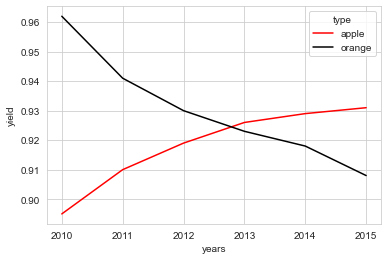

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
	'yield': [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.962, 0.941, 0.930, 0.923, 0.918, 0.908], 
	'type': ['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange'],
	'years': [2010, 2011, 2012, 2013, 2014, 2015, 2010, 2011, 2012, 2013, 2014, 2015],
})

sns.lineplot(
	x=df['years'], y=df['yield'], 
	hue=df['type'], palette=['red', 'black'])


[[<matplotlib.axis.XTick at 0x2017f279c90>,

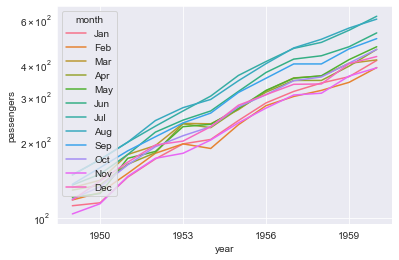

In [19]:
df = sns.load_dataset('flights')

graph = sns.lineplot(x='year', y='passengers', data=df, hue='month')
graph.set(yscale='log')
graph.set(xticks=range(1950, 1960, 3))


<AxesSubplot:xlabel='Time', ylabel='Value'>

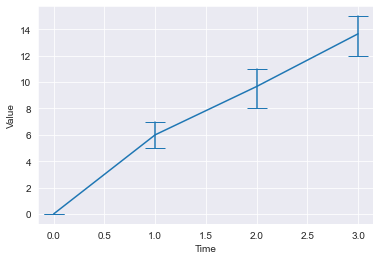

In [20]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

df = pd.DataFrame({
	'Time': [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3], 
	'Value': [0, 0, 0, 5, 6, 7, 10, 11, 8, 15, 14, 12]
})

sns.lineplot(
	x='Time', y='Value', data=df, 
	err_style='bars', 
	err_kws={'capsize':10}
)


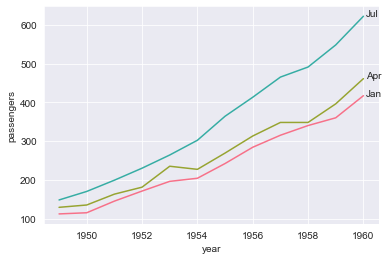

In [21]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd

def TimeSeriesPerMonth(months: list):
	df = sns.load_dataset('flights')
	df2 = df[df['month'].isin(months)]
	sns.lineplot(x='year', y='passengers', data=df2, hue='month', legend=False)
	sns.set_style('whitegrid')
	for i in months:
		df3 = df2[(df2['month'] == i) & (df2['year'] == 1960)]
		plt.text(x=1960+0.1, y=df3['passengers'].iloc[0], s=i)

TimeSeriesPerMonth(['Jan', 'Apr', 'Jul'])

## Regplot

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


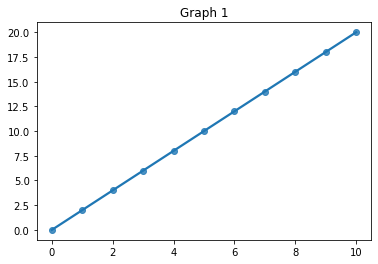

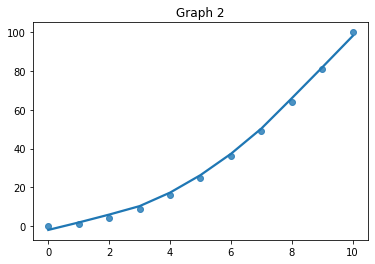

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

x = np.arange(0, 10+1, 1)
graph1 = sns.regplot(x, x*2)
graph1.set_title('Graph 1')
plt.show()

graph2 = sns.regplot(x, x**2, lowess=True)
graph2.set_title('Graph 2')
plt.show()

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# Linear correlation
## The two variables change at the same rate

x = np.arange(0, 10+1, 1)
y = x + np.random.uniform(0, 1, np.shape(x))
graph1 = sns.regplot(x, y)
graph1.set_title('Linear correlation')
plt.show()

# Non-linear correlation
## Two variables change at different rates
x = np.arange(0, 10+1, 1)
y = (x**2) * np.random.uniform(0.5, 1, np.shape(x))
graph2 = sns.regplot(x, y, lowess=True)
graph2.set_title('Non-linear correlation')
plt.show()

# Monotonic 
## A relationship where two variables have the same sign of change, i.e. move in the same direction
## E.g. monotonic non-linear

## Jointplot

In [ ]:
import seaborn as sns

df = sns.load_dataset('penguins')
df

sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df)

In [ ]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='kde', shade=True)

## Pairplot

In [ ]:
titanic = sns.load_dataset('titanic')
titanic

sns.pairplot(titanic.select_dtypes(['number']), hue='pclass')

## Cluster map

In [ ]:
iris = sns.load_dataset('iris')

sns.clustermap(iris.drop('species', axis=1))

## Pie chart

Each slide = category. 

Size of slice = frequency. 

<AxesSubplot:ylabel='Species'>

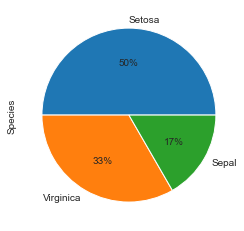

In [13]:
# Quick visualisation
import pandas as pd


df = pd.DataFrame({
	'Species': ['Setosa', 'Setosa', 'Virginica', 'Setosa', 'Sepal', 'Virginica'], 
	'Sepal_length': [10, 11, 50, 70, 12, 51], 
	'Sepal_width': [100, 101, 50, 40, 99, 52]
})

# Quick pie chart - count of entries
df['Species'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.0f%%')

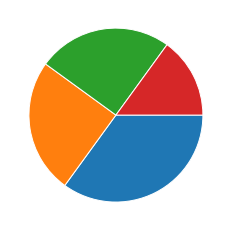

In [22]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])

plt.pie(y, counterclock=False)
plt.show() 

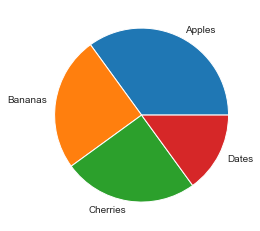

In [15]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels = mylabels)
plt.show() 

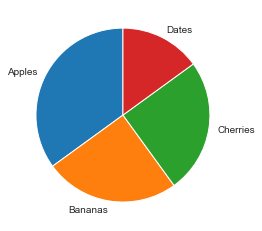

In [16]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels = mylabels, startangle = 90)
plt.show() 

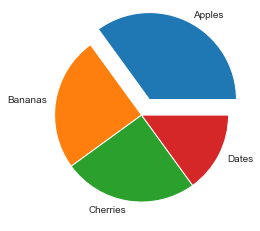

In [23]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
myexplode = [0.2, 0, 0, 0]

plt.pie(y, labels = mylabels, explode = myexplode, labeldistance=1.1)
plt.show() 

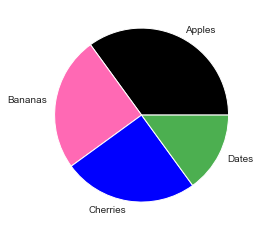

In [18]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
mycolors = ["black", "hotpink", "b", "#4CAF50"]

plt.pie(y, labels = mylabels, colors = mycolors)
plt.show() 

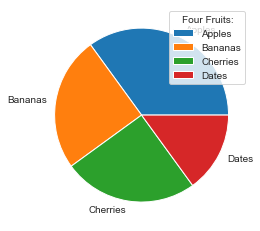

In [19]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]

plt.pie(y, labels = mylabels)
plt.legend(title = "Four Fruits:")
plt.show() 

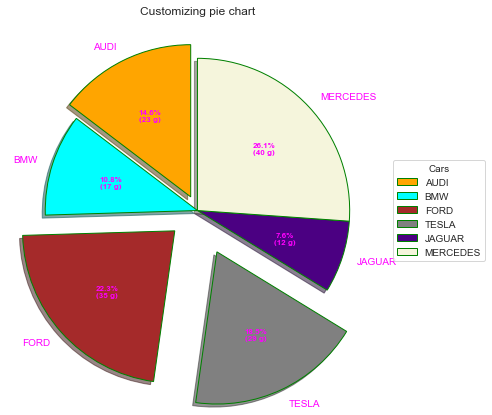

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
cars = ['AUDI', 'BMW', 'FORD',
        'TESLA', 'JAGUAR', 'MERCEDES']
 
data = [23, 17, 35, 29, 12, 41]
 
 
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
 
# Creating color parameters
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
# Adding legend
ax.legend(wedges, cars,
          title ="Cars",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

## Heatmap

In [8]:
import matplotlib.pyplot as plt, seaborn as sns, numpy as np, pandas as pd

flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Text(0.5, 1.0, 'No. of passengers (1000s)')

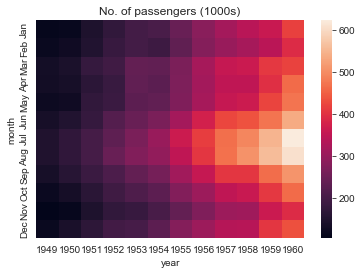

In [9]:
# Heatmap

flights = sns.load_dataset('flights')


sns.heatmap(
	flights.pivot('month', 'year', 'passengers')
)
# heatmap arguments: 
## annot = True: displays the actual values
## cmap='Blues': changes the color palette
plt.title('No. of passengers (1000s)')


<AxesSubplot:xlabel='year', ylabel='month'>

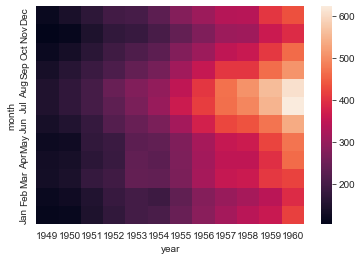

In [10]:
flights = sns.load_dataset('flights')
flights['month'] = flights['month'].astype(
	str
) 

flights = flights.pivot('month', 'year', 'passengers')
flights 

a = [i for i in range(1949, 1961)]
b = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan']

flights = flights.reindex(index=b, columns=a)
sns.heatmap(flights)

<AxesSubplot:xlabel='year', ylabel='month'>

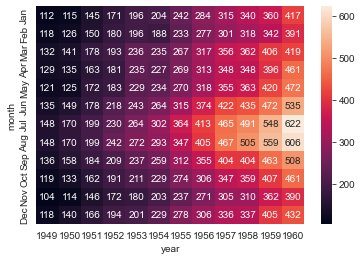

In [11]:
import seaborn as sns
import numpy as np

example_four = sns.load_dataset('flights')
example_four = example_four.pivot('month', 'year', 'passengers')
# display_four = sns.heatmap(example_four)

sns.heatmap(
	example_four, 
	annot=True, 
	fmt='d'
)

['X1', 'X2', 'X10', 'S1']
['Y1', 'Y2', 'Y10']


C:\Users\evgen\AppData\Local\Temp\ipykernel_4124\4050538891.py:24: FutureWarning: Interpreting call
	'.reindex(a, b)' as 
	'.reindex(index=a, columns=b)'.
Use named arguments to remove any ambiguity. In the future, using positional arguments for 'index' or 'columns' will raise a 'TypeError'.
  pivot = pivot.reindex(y_axis, ['Y1','Y2','Y10'])


<AxesSubplot:xlabel='var2', ylabel='var1'>

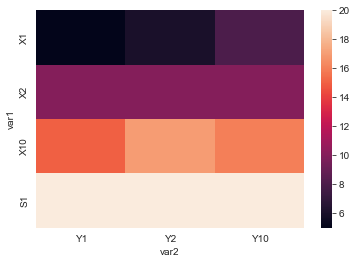

In [12]:
# A more complex heatmap, 
# where we perform alphanumerical sorting of the columns

df = pd.DataFrame({
	'var1': ['X1','X1','X1', 'X2','X2','X2', 'X10','X10','X10', 'S1','S1','S1' ],
	'var2': ['Y1','Y2','Y10', 'Y1','Y2','Y10', 'Y1','Y2','Y10', 'Y1','Y2','Y10'], 
	'value': [5,6,8, 10,10,10, 15,17,16, 20,20,20]
})
df

def sorted_nicely( l ): 
	import re
	""" Sort the given iterable in the way that humans expect.""" 
	convert = lambda i: int(i) if i.isdigit() else i 
	alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
	print(alphanum_key)
	return sorted(l, key = alphanum_key)

pivot = df.pivot('var1', 'var2', 'value')

y_axis = list(df['var1'].unique()); print(y_axis)
x_axis = list(df['var2'].unique()); print(x_axis)

pivot = pivot.reindex(y_axis, ['Y1','Y2','Y10'])

sns.heatmap(
	pivot
)


In [ ]:
# Fitness landscape with one fitness peak

import numpy as np
import matplotlib.pyplot as plt

# number of data points
N = 1000000

x = np.random.randn(N)
y = np.random.randn(N)
plt.hist2d(x,y,bins=100)
plt.show()



In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# number of data points
N = 100000
peak1 = -1
peak2 = 3


y = np.random.normal(peak1, 1, N)
y2 = np.random.normal(peak2, 1, N)
Y = np.concatenate([y, y2])

x = np.random.normal(peak1, 1, N)
x2 = np.random.normal(peak2, 1, N)
X = np.concatenate([x, x2])

plt.hist2d(X, Y, bins=100)

plt.show()



In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# number of data points
N1 =  4000000
N2 = 10000000
peak1 = -1
peak2 = 2

parameter = 1

y = np.random.normal(  peak1, parameter, N1)
y2 = np.random.normal( peak2, parameter, N2)
Y = np.concatenate([y, y2])

x = np.random.normal(  peak1, parameter, N1)
x2 = np.random.normal( peak2, parameter, N2)
X = np.concatenate([x, x2])

# plt.figure(figsize=(14, 14))
plt.hist2d(X, Y, bins=100, cmap='viridis')
matplotlib.cm.get_cmap(name='viridis')


# plt.show()
# plt.savefig(
# 	f'Figure name.jpg', format='jpg', 
# 	dpi=1000, 
# 	bbox_inches='tight', # Prevents axis labels in saved image from getting cut off
# )

In [ ]:
# Fitness landscape with two multiple peaks

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 1000000
peak1 = 0
peak2 = 3
peak3 = [-2, 2]
peak4 = [3, -1]


x1 = np.random.normal(peak1, 1, N)
x2 = np.random.normal(peak2, 1, N)
x3 = np.random.normal(peak3[0], 1, N)
x4 = np.random.normal(peak4[0], 1, N)
X = np.concatenate((x1, x2, x3, x4))


y1 = np.random.normal(peak1, 1, N)
y2 = np.random.normal(peak2, 1, N)
y3 = np.random.normal(peak3[1], 1, N)
y4 = np.random.normal(peak4[1], 1, N)
Y = np.concatenate((y1, y2, y3, y4))


plt.hist2d(X, Y, bins=100)
plt.show()


In [ ]:
# Fitness landscape with multiple peaks and lots of noise

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 10000
N2 = int(10000/2)
peak1 = 0
peak2 = 3
peak3 = [-2, 2]
peak4 = [3, -1]


x1 = np.random.normal(peak1, 1, N2)
x2 = np.random.normal(peak2, 1.5, N)
x3 = np.random.normal(peak3[0], 1, N)
x4 = np.random.normal(peak4[0], 1, N)
# x5 = np.random.uniform(-4, 4, 100000)
X = np.concatenate((x1, x2, x3, x4))


y1 = np.random.normal(peak1, 1, N2)
y2 = np.random.normal(peak2, 1.5, N)
y3 = np.random.normal(peak3[1], 1.2, N)
y4 = np.random.normal(peak4[1], 1.3, N)
# y5 = np.random.uniform(-4, 4, 100000)
Y = np.concatenate((y1, y2, y3, y4))


plt.hist2d(X, Y, bins=100)
plt.show()

## Catplot

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


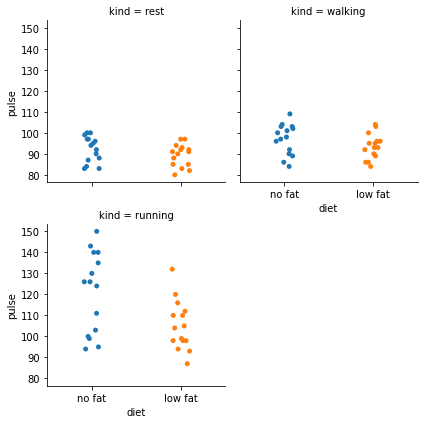

In [4]:
import matplotlib.pyplot as plt, pandas as pd, seaborn as sns

df = sns.load_dataset('exercise')

df

graph = sns.catplot(
	x='diet', y='pulse', 
	col='kind', col_wrap=2, 
	height=3, data=df)
df

Text(0.5, 1.05, 'Title')

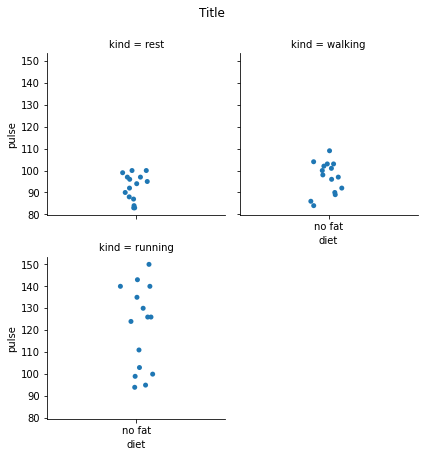

In [5]:
# only plot selected fragments

import matplotlib.pyplot as plt, pandas as pd, seaborn as sns

df = sns.load_dataset('exercise')
df

graph = sns.catplot(x='diet', y='pulse', col='kind', col_wrap=2, height=3, data=df, order=['no fat'])
graph.fig.suptitle('Title', y=1.05)

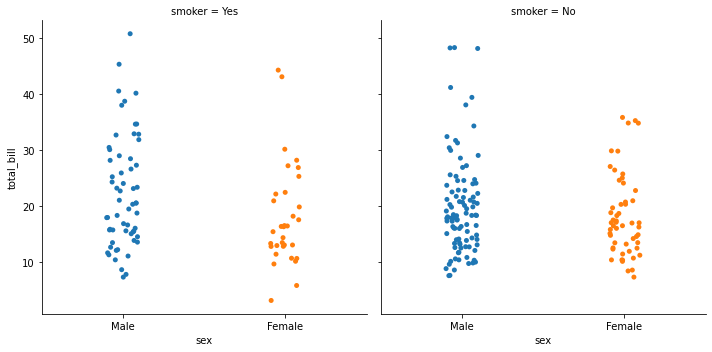

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='strip' ) # kind='strip' is default

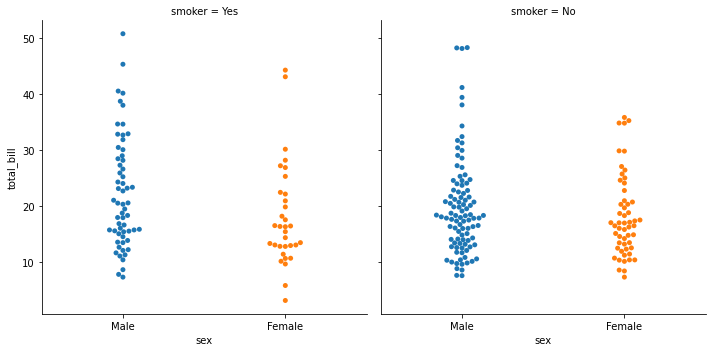

In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(
	x='sex', y='total_bill', col='smoker', 
	data=df_test, kind='swarm' ) 

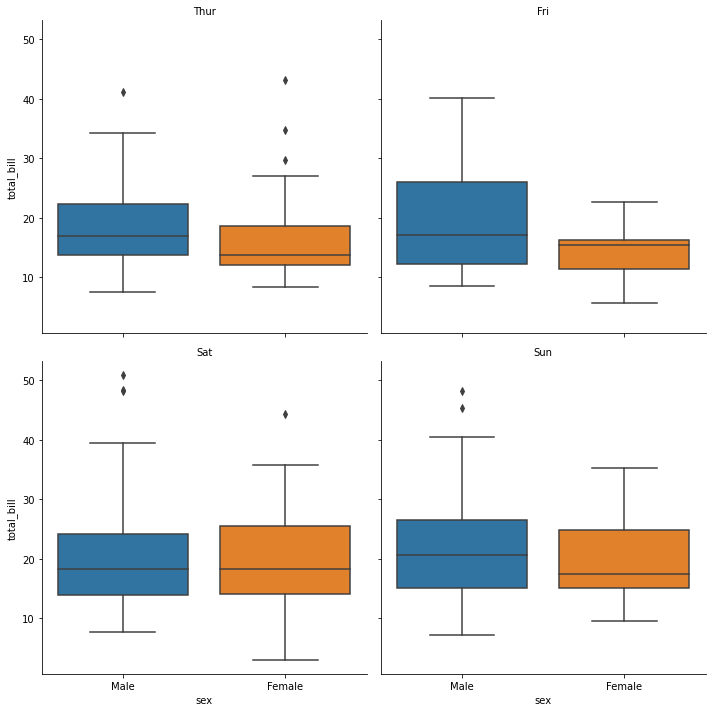

In [8]:
g = sns.catplot(
	x='sex', y='total_bill', col='day', data=df_test, 
	kind='box', col_wrap=2
)

g.set_titles(template='{col_name}')

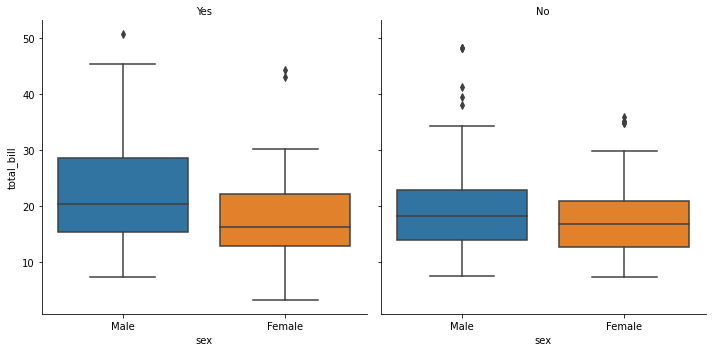

In [9]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

g = sns.catplot(
	x='sex', y='total_bill', col='smoker', data=df_test, kind='box' ) # boxplot / box-and-whiskers plot


g.set_titles(template='{col_name}')

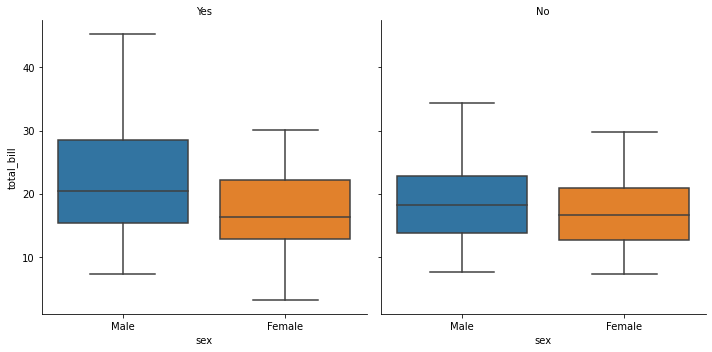

In [10]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

g = sns.catplot(
	x='sex', y='total_bill', col='smoker', data=df_test, 
	kind='box',
	showfliers=False ) # boxplot / box-and-whiskers plot

g.set_titles(template='{col_name}')

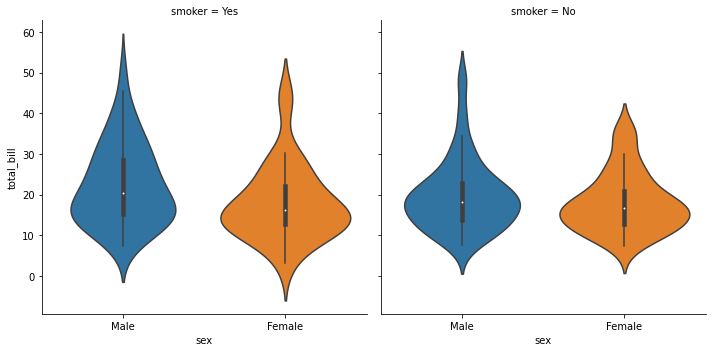

In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='violin' ) 

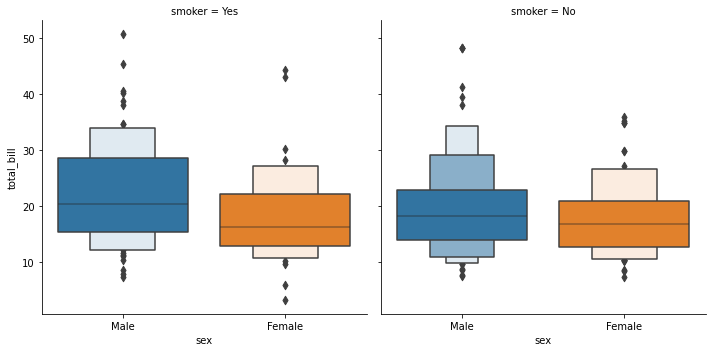

In [12]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='boxen' ) 

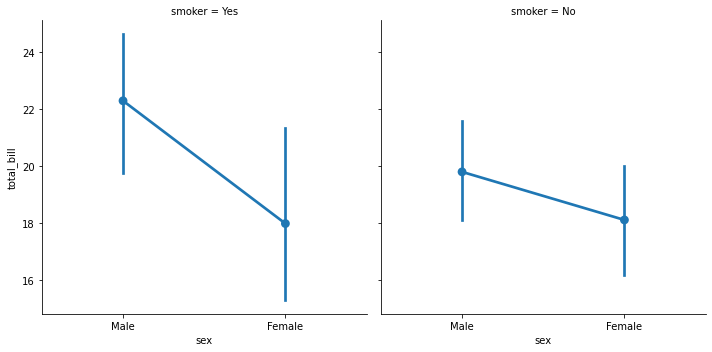

In [13]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='point' ) 

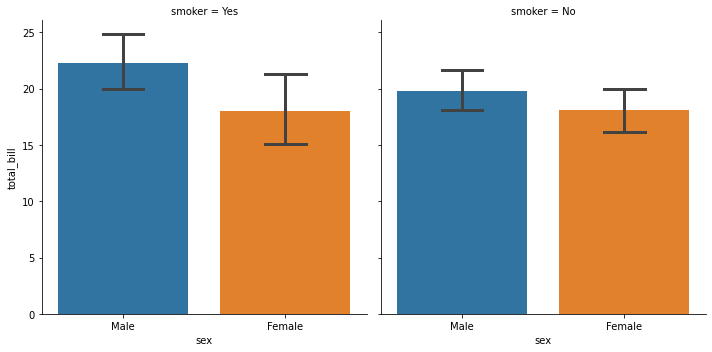

In [14]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', y='total_bill', col='smoker', data=df_test, kind='bar', errwidth=3, capsize=0.25) 

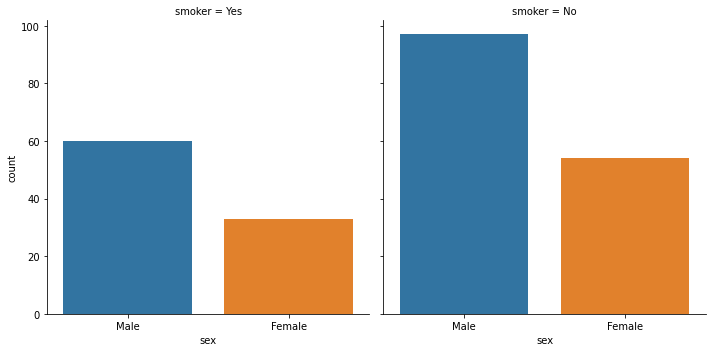

In [15]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
df_test = sns.load_dataset('tips')
df_test

sns.catplot(x='sex', col='smoker', data=df_test, kind='count' ) 

## Multiple plots

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


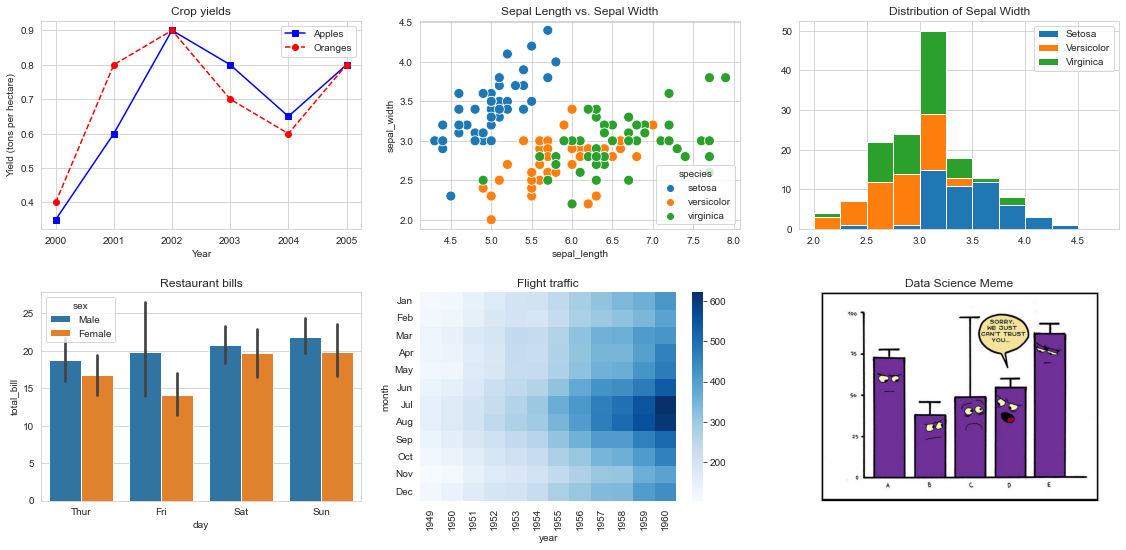

In [21]:
# Plotting multiple charts in a grid

import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

flowers_df = sns.load_dataset('iris')
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]
yield_oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908]
years = [2010, 2011, 2012, 2013, 2014, 2015]
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]
tips_df = sns.load_dataset('tips')
img = Image.open('example_datasets/chart.jpg'); 

# plt.style.use('fivethirtyeight')

setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

flights_df = sns.load_dataset('flights')


# fig, axes = plt.subplots(2, 3, figsize=(16,8));
fig, axes = plt.subplots(
	2, 3, 
	figsize = (16,8), 
	# sharex=True
)


# Linegraph
axes[0,0].plot(years, apples, 's-b')
axes[0,0].plot(years, oranges, 'o--r')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Yield (tons per hectare)')
axes[0,0].set_title('Crop yields')
axes[0,0].legend(['Apples', 'Oranges'])

# Scatterplot
axes[0,1].set_title('Sepal Length vs. Sepal Width')
sns.scatterplot(flowers_df.sepal_length, 
				flowers_df.sepal_width, 
				hue=flowers_df.species, 
				s=100, 
				ax = axes[0,1])

# Histogram
axes[0,2].set_title('Distribution of Sepal Width')
axes[0,2].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width], 
				bins = np.arange(2, 5, 0.25), 
				stacked=True); 
axes[0,2].legend(['Setosa', 'Versicolor', 'Virginica']); 

# Barplot
axes[1,0].set_title('Restaurant bills')
sns.barplot('day', 'total_bill', hue='sex', data=tips_df, ax=axes[1,0]);

# Heatmap
axes[1,1].set_title('Flight traffic')
sns.heatmap(
	flights_df.pivot('month', 'year', 'passengers'), ax=axes[1,1], cmap='Blues'
)

# Plot an image
axes[1,2].set_title('Data Science Meme')
axes[1,2].imshow(img)
axes[1,2].grid(False)
axes[1,2].set_xticks([])
axes[1,2].set_yticks([])

plt.tight_layout(pad=2)



# For further references go here - cheatsheet:
# https://jovian.ai/aakashns/dataviz-cheatsheet


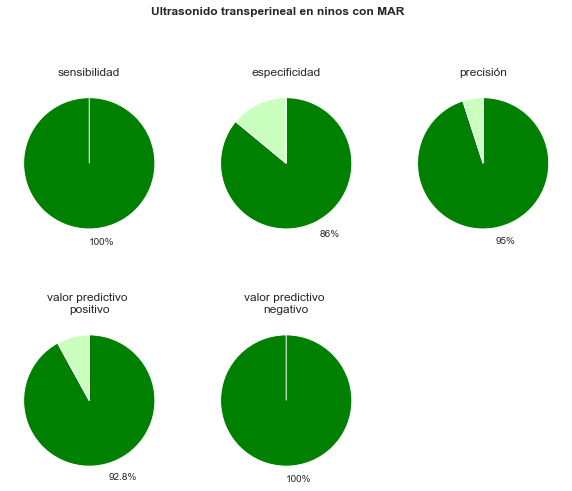

In [25]:
fig, axes = plt.subplots(
	2,3, 
	figsize=(10,8)
)

dict1 = {
	'title': ['sensibilidad', 'especificidad', 'precisión', 'valor predictivo \npositivo', 'valor predictivo \nnegativo'],
	'value': [[100,0], [86,14], [95,5], [92,8], [100,0]],
	'empty': [0, 14, 5, 8, 0],
	'labels': [['100%', ''], ['86%',''], ['95%',''], ['92.8%',''], ['100%','']]
}

fig.suptitle('Ultrasonido transperineal en ninos con MAR', weight='bold')

counter = 0
for i in range(2):
	for j in range(3):
		if counter > 4:
			break
		axes[i,j].set_title(dict1['title'][counter])
		axes[i,j].pie(
			dict1['value'][counter], 
			startangle=90, counterclock=False, 
			colors=['green', '#CAFFBF'],
			labels=dict1['labels'][counter],
			labeldistance=1.2
			)
		counter += 1

# axes[1,2].grid(False)
# axes[1,2].set_xticks([])
# axes[1,2].set_yticks([])
fig.delaxes(axes[1,2])

# plt.tight_layout(pad=2)


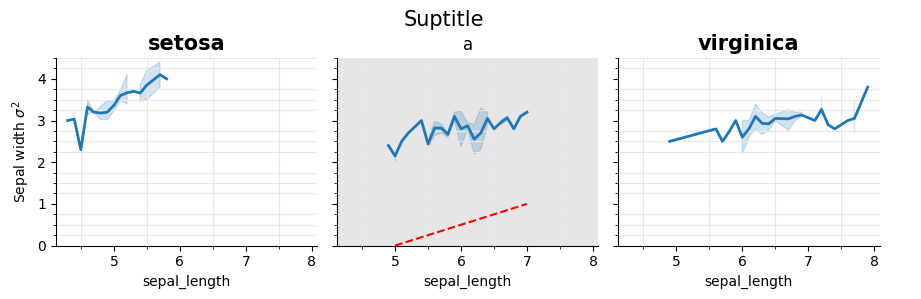

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

df = sns.load_dataset('iris')
df

g = sns.FacetGrid(
	df, col='species', 
	# hue='Type',
	col_wrap=3, 
	palette='rocket'
	)
g.map_dataframe(
	sns.lineplot, 
	x='sepal_length', y='sepal_width',
	linewidth=2
)

for subplot, ax in g.axes_dict.items():
	# MinorTicks X
	ax.grid(True, which="minor", axis='x', ls="-", color='#E7E7E7');
	locmin = mticker.MultipleLocator(0.5);
	ax.xaxis.set_minor_locator(locmin);
	# MinorTicks Y
	ax.grid(True, which="minor", axis='y', ls="-", color='#E7E7E7');
	locmin = mticker.MultipleLocator(0.25);
	ax.yaxis.set_minor_locator(locmin);
	#
	ax.set_ylim([0, 4.5])
	# ax.set_xlim(0)
	if subplot == 'versicolor':
		ax.set_facecolor('0.9') # Make a subplot a little darker
		ax.plot((5,7),(0,1), color='red', linestyle='dashed')
	ax.set_title(f"{subplot}", fontweight='bold', fontsize=15)

g.axes[1].set_title('a')

g.set_ylabels(r"Sepal width $\sigma^{2}$");

g.fig.subplots_adjust(top=0.82)
g.fig.suptitle('Suptitle', size=15)

g.add_legend(bbox_to_anchor=(1.02, 0.15))
# plt.legend(bbox_to_anchor=(1.02, 0.15))

## 3D

In [ ]:
# Empty grid
# If you run this in separate .py file, it will be interactive

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (3, 3)
# plt.rcParams['figure.dpi'] = 150


# Create 3D axes
# Way 1 - without specifying size
ax = plt.axes(projection='3d')
# Way 2 - specifying size
# fig = plt.figure(figsize=(50, 5))
# ax = fig.add_subplot(projection='3d')

# Rotation
ax.view_init(azim=30, elev=40)

# label axes:
ax.set_title('Figure title')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# To make sure that comments before plot don't show
plt.show()

In [ ]:
# 3D scatterplot 

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (6, 4)
# plt.rcParams['figure.dpi'] = 150

ax = plt.axes(projection='3d')

# Normal distribution: 
x = np.random.normal(size = 500)
y = np.random.normal(size = 500)
z = np.random.normal(size = 500)
# Can Use random data points: 
# x = np.random.randint(0, 100, (500,))
# y = np.random.randint(0, 100, (500,))
# z = np.random.randint(0, 100, (500,))


# Two ways to plot: 
ax.scatter(
	x, y, z, 
	# color items by their position from the center:
	c = np.linalg.norm([x, y, z], axis=0), 
	# change dots' size:
	s = 13, 
	marker = 'v', # Use marker figure
	alpha = 0.9 # Transparency
)
# ax.scatter3D(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Rotate the figure statically
ax.view_init(45, 15); # (elevation[deg], rotation_horison[deg])

In [ ]:
# Pseudo-scatter plot = line plot without connecting each data point
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

x_data = np.arange(0, 50, 5)
y_data = np.arange(0, 50, 5)
z_data = x_data * y_data

# Two options
ax.scatter(x_data, y_data, z_data)
# ax.plot(x_data, y_data, z_data)

plt.show()

In [ ]:
# spring

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



ax = plt.axes(projection='3d')

z = np.linspace(0, 30, 100) # (start, stop, N)
x = np.sin(z)
y = np.cos(z)
# or create expandable figure:
# omega = 2
# x = np.cos(omega*z)
# y = np.sin(omega*z)

ax.plot3D(
	x, y, z, 
	lw=4, # line thickness
)

plt.show()

In [ ]:
# Line in 3D

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
# alternative:
# fig = plt.figure(figsize=(50, 5))
# ax = fig.add_subplot(projection='3d')

x = np.linspace(0, 10, 50)
z = np.cos(x)

# Two options: 
ax.plot(x, x, z)


plt.show()

In [ ]:
# Line in 3D

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

x = np.arange(0, 50, 0.1)
y = np.arange(0, 50, 0.1)
z = np.sin(x) * np.cos(y)

ax.plot(x, y, z)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3D wireframe

N = 10

ax = plt.axes(projection='3d'); 

def function_z(x, y):
	return 50 - (x**2 + y**2)

x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)
Z = function_z(X, Y)

ax.plot_wireframe(
	X, Y, Z, 
	color='black', 
	lw=1
)

In [ ]:
# 3D surface plot

import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

def function_z(x, y):
	return 50 - (x**2 + y**2)

N = 50

x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)
# print(X)
Z = function_z(X, Y)
print(Z.shape)

ax.plot_surface(X, Y, Z)

plt.show()

In [ ]:
# cone

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


ax = plt.axes(projection='3d')

def z_function(x, y):
	return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

# Convert vectors into matrices
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

ax.plot_surface(X, Y, Z)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')

x = np.arange(-5, 5, 0.1)
y = x

X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y)

ax.plot_surface(
	X, Y, Z, 
	cmap = 'plasma', # Add colour map
)
# Rotation
ax.view_init(azim=30, elev=40)

plt.show()

In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

ID = 'PY431702'

def f(x, y):
    return 1/ (1 + x*x + y*y)

x = np.linspace(-2.5, 2.5, 30)
y = np.linspace(-2.5, 2.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')


ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title(f'Fitness landscape with one peak \nID {ID}');

plt.xlabel('x')
plt.ylabel('y')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
ax.set_zlabel('z');

# To remove all axes
# ax.set_axis_off()

# plt.savefig('figure name.jpg', format='jpg', dpi=1200)


In [ ]:
from mpl_toolkits import mplot3d

%matplotlib inline
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x, y):
    # return np.sin(np.sqrt(x ** 2 + y ** 2))
    # return 1/ (1 + x*x + y*y)
	# return (np.sin(5*x) * np.cos(5*y))/5
    return (np.sin(x) * np.cos(y/1.9))
    
    # return 2.71828**(-0.9*(x**2 + 0.5*(x-y)**2))

# x = np.linspace(-6, 6, 30)
# y = np.linspace(-6, 6, 30)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')

ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                # cmap='viridis', edgecolor='none')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
ax.set_title('surface');

plt.xlabel('x')
plt.ylabel('y')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
ax.set_zlabel('z');


In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
# Create figure. 
fig = plt.figure() 
ax = fig.gca(projection = '3d') 
# Generate example data. 
R, Y = np.meshgrid(np.arange(0, 500, 0.5), np.arange(0, 40, 0.5)) 
z = 0.1 * np.abs(np.sin(R/40) * np.sin(Y/6)) 
# Plot the data. 
surf = ax.plot_surface(R, Y, z, cmap='jet', linewidth=0) 
fig.colorbar(surf) 
# Set viewpoint. 
ax.azim = -160 
ax.elev = 30 
# Label axes. 
ax.set_xlabel('Along track (m)') 
ax.set_ylabel('Range (m)') 
ax.set_zlabel('Height (m)') 




## Radar plot

In [42]:
import pandas as pd
import plotly.express as px

df = pd.DataFrame({
	'characteristic': ['strength', 'agility', 'intelligence'],
	'value': [1,5,2]
})

fig = px.line_polar(
	df, 
	r='value', theta='characteristic', 
	line_close=True # Connect the start and end of the line,
	)

fig.update_traces(
	fill='toself', # Fill up to the the line with color
	)
fig.update_layout(
	polar = {
		'radialaxis_angle': 45,
		# radialaxis_range = [1,4]
		'radialaxis': {
			'dtick': 2,
			'range': [0,6],
			'color': 'red'
		}
	},
	font = {
		'size': 20
	}
	)
fig.show()


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [11]:
import pandas as pd
import plotly.express as px

### Dataframe v1: ready
# df = pd.DataFrame({
# 	'characteristic': ['strength', 'agility', 'intelligence', 'strength', 'agility', 'intelligence',],
# 	'value': [1,5,2, 2,6,1],
# 	'category': ['A', 'A', 'A', 'B', 'B', 'B']
# })

### Dataframe v2: requires concatenating
df1 = pd.DataFrame({
	'characteristic': ['strength','agility','intelligence'],
	'value': [8,4,2]
})
df1['category'] = 'A'
df2 = pd.DataFrame({
	'characteristic': ['strength','agility','intelligence'],
	'value': [5,5,5]
})
df2['category'] = 'B'
df = pd.concat([df1,df2], ignore_index=True)
print(df)


fig = px.line_polar(
	df, 
	r='value', theta='characteristic', 
	line_close=True, # Connect the start and end of the line
	color='category',
	width=500, height=500
	)
fig.update_layout(
	showlegend=True
)

fig.update_traces(
	fill='toself', # Fill up to the the line with color
	# line_color='red'
	)

fig.show()


  characteristic  value category
0       strength      8        A
1        agility      4        A
2   intelligence      2        A
3       strength      5        B
4        agility      5        B
5   intelligence      5        B


c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\evgen\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Famous statistical blunders

### Albert Kinsey's *Sexual Behavior in the Human Male*

Albert Kinsey's scientific report, *Sexual Behavior in the Human Male*, aimed at providing some novel facts about sex. One of the claims was that "10% of adult men were homosexuals, and an additional 11% were bisexual. 37% had had at least one homosexual experience" (statistics.com). 

However, these results were challenged by reputable statisticians at the time (such as John Tukey, W.G. Cochran, and others); they stated that the results were not representative of the general population. The reasons for this were lack of random sampling (convenienve sampling), where most data was collected from easily-accessible yet unrepresentative groups such as students and prisoners, leading to **sampling bias**. Additionally, the study was prone to **volunteer bias**, where people who volunteer to provide their data are biased towards a unrepresentative proportion of the population.

Sources:
- https://www.statistics.com/famous-errors-in-statistics/
- https://en.wikipedia.org/wiki/Kinsey_Reports#Criticism

### The Landon vs Roosevelt "Literary Digest" poll disaster

In 1936, *Literary Digest* set out to make a poll on who would win in the upcoming presidential election - 	Alfred Landon or Franklin Roosevelt. They mailed over 10 million postcards to their subscribers, people on automobile registration lists, and names in the telephone directories. The results showed that 57% of the people would be in favour of Landon, thus predicting his victory. In reality, Franklin Roosevelt won with a 61% vote. 

The problem arose in the bias of sampling methodology. Although sample size was an impressive 10 million people with 2.4 million responses, the sample was biased towards people who could afford to pay a subscription, own a car, and afford a telephone service; these people, at the time, tended to be well-off Republicans, which biased the poll results towards Landon. 

Sources:
- https://www.historyofinformation.com/detail.php?entryid=1652
- https://open.ocolearnok.org/reach-higher-data-analysis/chapter/sample-surveys/

### Benford's Law of Number Frequency

https://en.wikipedia.org/wiki/Benford%27s_law

### Regression to the mean

https://en.wikipedia.org/wiki/Regression_toward_the_mean

### Abraham Wald and the missing bullet holes

War planes holes. 

https://medium.com/@penguinpress/an-excerpt-from-how-not-to-be-wrong-by-jordan-ellenberg-664e708cfc3d




The failure to show the association between launch temperature, and the effect of launch temperature, on the space shuttle o-rings, leading to the catastrophic failure of the Columbia soon after launch

https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster#O-ring_concerns

https://www.datavis.ca/gallery/missed.php



